
https://github.com/mbeyeler/opencv-machine-learning/blob/master/notebooks/03.01-Measuring-Model-Performance-with-Scoring-Functions.ipynb

# Start

## Regression and classification  by scikit learn

### 1.1 Linear Models


#### 1.1.1 Ordinary least squares

linear_model.LinearRegression().fit() sử dụng OLS để tinh chỉnh mô hình

Sơ lược về OLS hay còn gọi là (Bình phương nhỏ nhất) 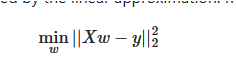

hệ w được tinh chỉnh sao cho biểu thức min

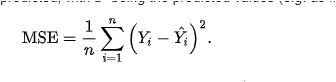

Mean trung bình

Square Bình phương

Error lỗi

Trung bình bình phương sai số




Nó được sử dụng để sai lệch giữa actual và prediction

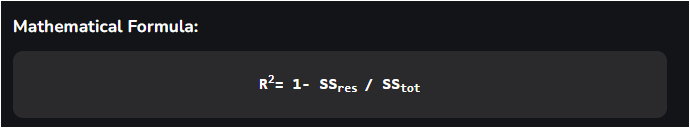

Trong đó,

SS res là tổng bình phương của các sai số dư.

SS tot là tổng số lỗi.

Nó được sử dụng để quan sát mô hình như thế nào có đạt yêu cầu không
Điểm tốt nhất có thể là 1, đạt được khi giá trị dự đoán giống với giá trị thực tế.
Điểm R 2 của mô hình cơ sở là 0.
Trong những trường hợp xấu hơn, điểm R 2 thậm chí có thể âm.

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

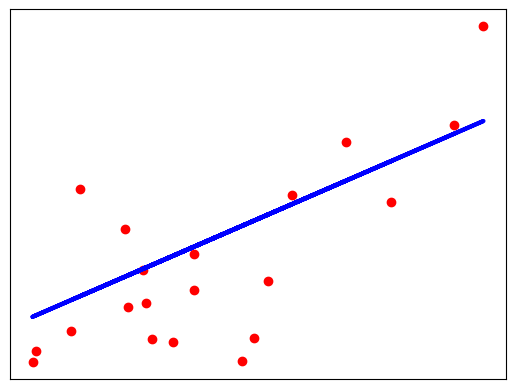

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# data blow là data đã được xử lý về bệnh tiểu đường
X, y = datasets.load_diabetes(return_X_y = True)
X = X[:,np.newaxis,2]

X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]
print(y_train)
# load model linearRegression từ sklearn
lgr = linear_model.LinearRegression()

lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)
# load hệ số .coef_
a = lgr.coef_
print("Coefficients : ", lgr.coef_)
# mse bình phương trung bình
print("Mean square erroe : ", mean_squared_error(y_test,y_pred))
print('R score : ', r2_score(y_test,y_pred))

plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test,y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())

plt.show()

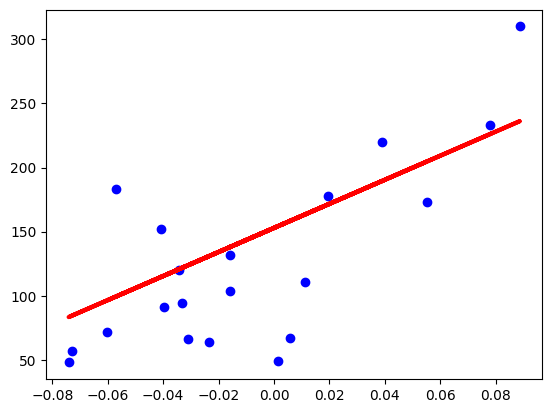

In [ ]:
b = lgr.intercept_
y_pred1 = a*X_test + b
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred1,color = 'red',linewidth = 3)
label_x = ['X']
label_y = ['Y']
plt.xticks(label = label_x)
plt.yticks(label = label_y)
plt.show()

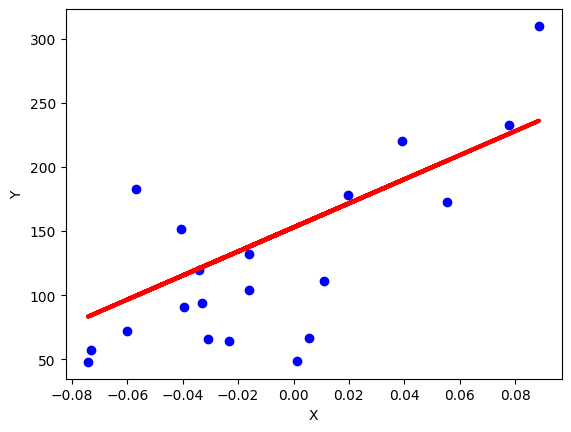

In [ ]:
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred1,color = 'red',linewidth = 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

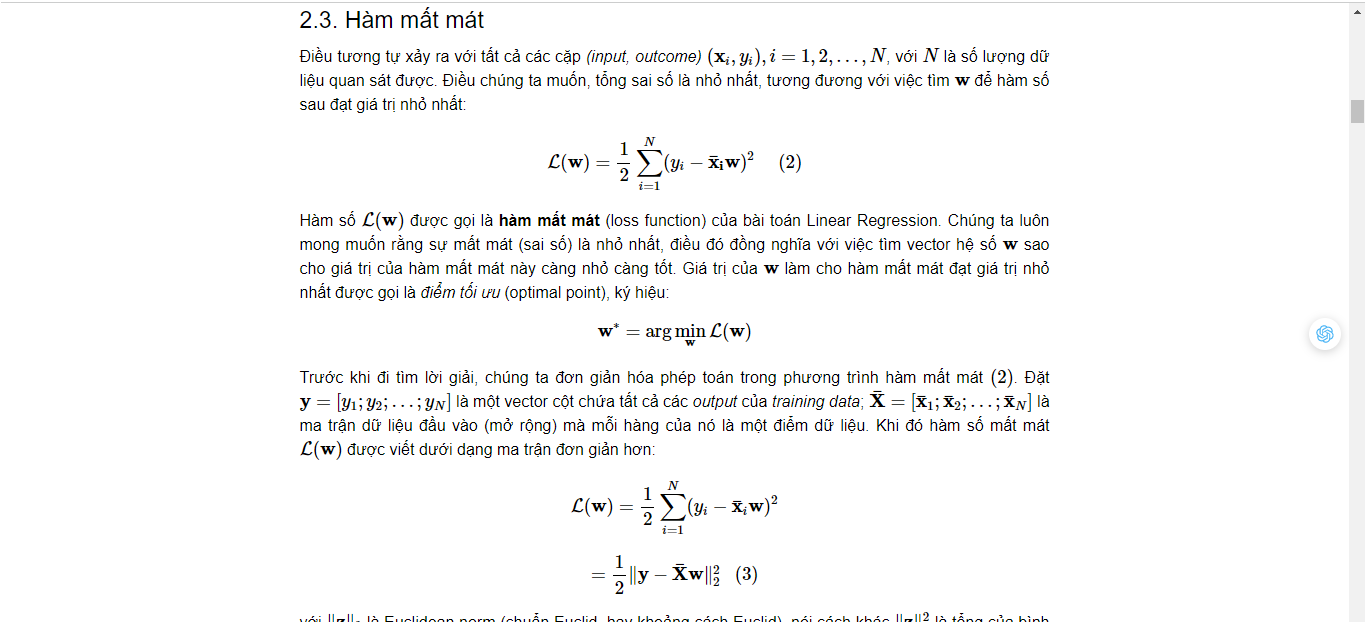

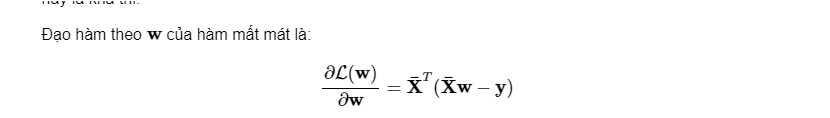

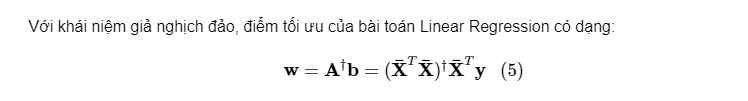

In [ ]:
one = np.ones(X_train.shape)
# chồng chức 2 ma trận theo cột
Xbar = np.concatenate((one, X_train), axis = 1)
print(X_train.shape)
print(one.shape)
print(Xbar.shape)

(422, 1)
(422, 1)
(422, 2)


w =  [152.91886183 938.23786125]
938.237861251352 152.91886182616108


Text(0, 0.5, 'y')

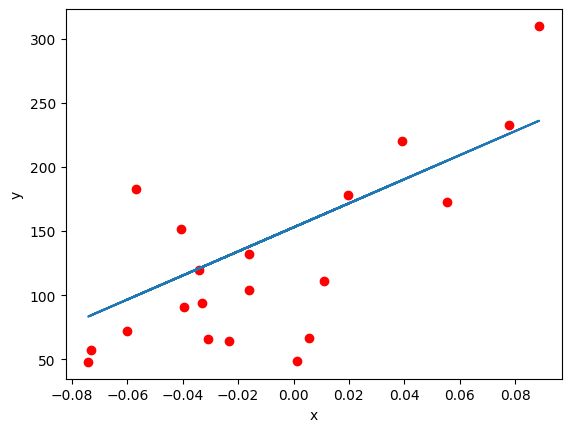

In [ ]:
# Create ma trận chuyển vị
one = np.ones((X_train.shape[0], 1))
Xbar = np.concatenate((one, X_train), axis = 1)
# print(Xbar)
#Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y_train)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0]
w_1 = w[1]
print(w_1,w_0)
x0 = X[-20:]
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.scatter(X_test,y_test, color = 'red')     # data
plt.plot(x0, y0)               # the fitting line

plt.xlabel('x')
plt.ylabel('y')
# plt.show()


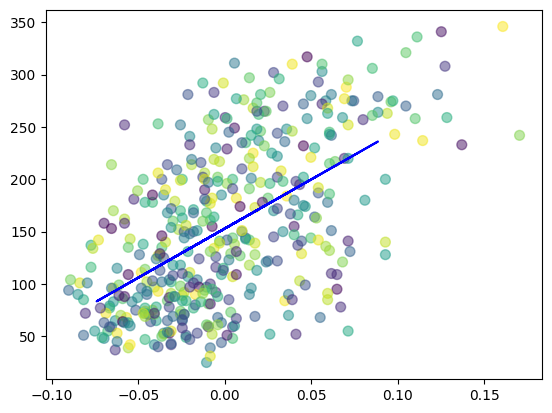

In [ ]:
color = np.random.rand(X_train.shape[0])

plt.scatter(X_train,y_train, c = color,cmap = 'viridis',s = 50, alpha = 0.5)
plt.plot(x0, y0,color = 'blue')


#### 1.1.2 Ridge Classification and regression

Ridge là một trường hợp cụ thể của regulazation nó được gọi là L2 regulazation

biểu thức của L2 regulazation
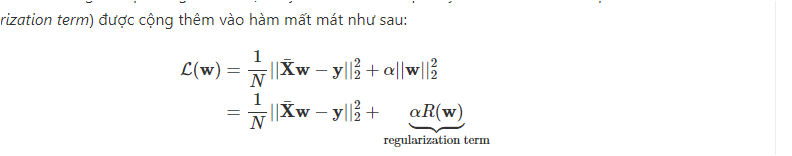

với aphla > 0 là hyperparamater

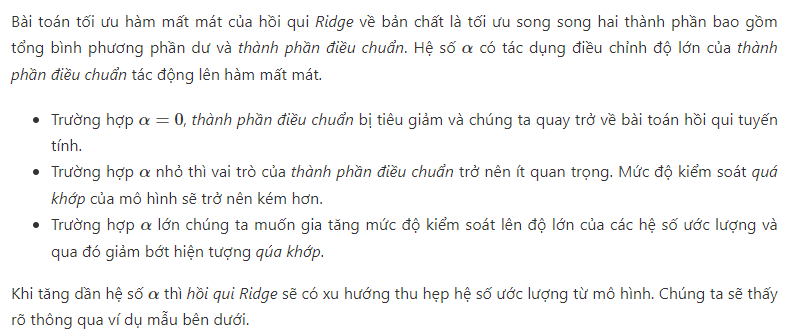



Đoạn code sơ lược về Rige Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
X, y = datasets.load_diabetes(return_X_y = True)
features = datasets.load_diabetes()['feature_names']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state= 42)
print(X_train.shape)
print(y_train.shape)

print(X_train)

(265, 10)
(265,)
[[-0.01277963 -0.04464164  0.06061839 ...  0.03430886  0.07020738
   0.00720652]
 [ 0.06713621 -0.04464164  0.05630715 ... -0.00259226  0.07574055
   0.03620126]
 [ 0.06350368  0.05068012 -0.02560657 ... -0.00259226  0.03839393
   0.01963284]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


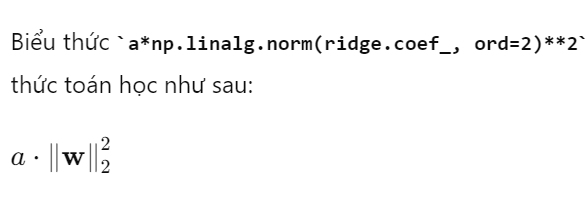

In [ ]:
n_alphas = 20
# numpy.logspace(start, stop, num=50, base=10.0, dtype=None, endpoint=True, axis=0)
alphas = 1/np.logspace(2, -2, n_alphas)

coefs = []
coefs_001 = []
losses = []
scores = []
for a in alphas:
  ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
  ridge.fit(X_train,y_train)
  coefs.append(ridge.coef_)
  y_pred = ridge.predict(X_test)
  loss = mean_squared_error(y_test,y_pred) + a*np.linalg.norm(ridge.coef_, ord = 2)**2
  losses.append(loss)
  scores.append(r2_score(y_test, y_pred)) # Use y_test and y_pred to calculate R^2 score
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

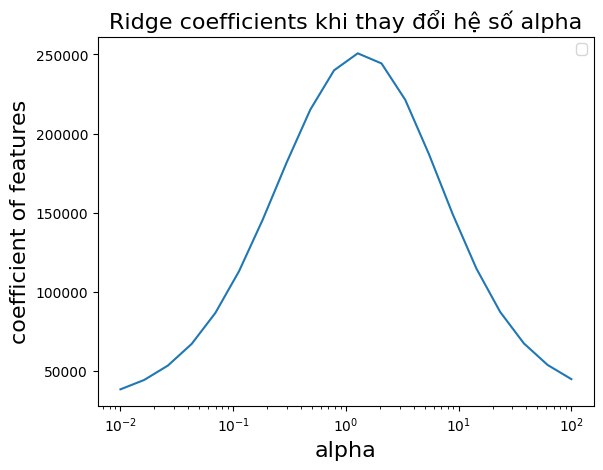

In [ ]:
ax = plt.gca()
ax.plot(alphas, losses)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend()
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

đi sau vào toán để tối ưu w

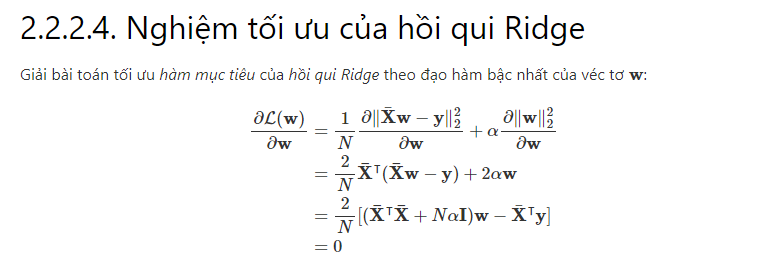

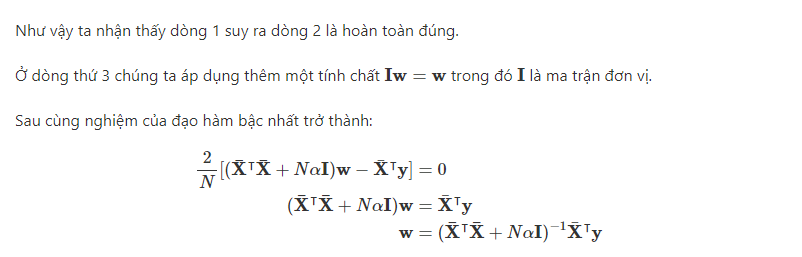

Build thuật toán bằng cách tối ưu tham số trên ở việc tối ưu trên chưa có tham số chặn do phức tạp khi tối ưu nên chưa nói đến

đoạn code

In [ ]:
import numpy as np
print(X.shape)
print(np.identity(X.shape[1]))

(442, 1)
[[1.]]


[ 37.70090772 -20.41682176 174.97311132 101.89874449  27.87299545
   7.40888062 -70.44988215  73.2711754  124.33800295  91.90126551]


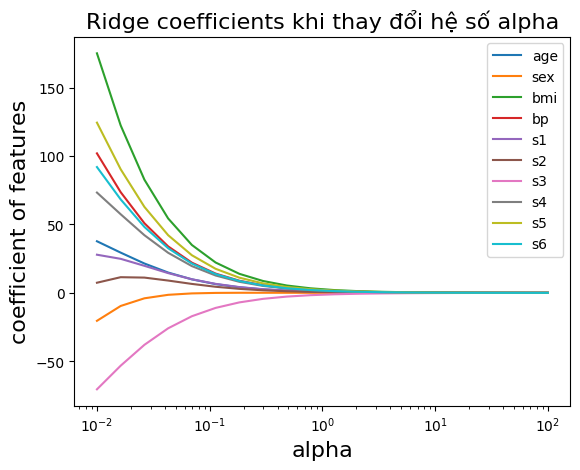

In [ ]:
N = Xbar.shape[0]
coefs_002 = []
coefs = []
#
def Ridge1(X,y,a):
  N, D = X.shape # (m,n)
  I = np.identity(D)  # (n,n)
  return np.dot(np.linalg.inv(np.dot(X.T, X) + a * N * I), np.dot(X.T, y))
for a in alphas:
  coef = Ridge1(X_train,y_train,a)
  coefs.append(coef)
print(coefs[0])
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

[ 0.00787217  0.0004155   0.02630812  0.01688751  0.00836489  0.0059372
 -0.01336148  0.01565649  0.02117541  0.01662693]
[1.00000000e-02 1.62377674e-02 2.63665090e-02 4.28133240e-02
 6.95192796e-02 1.12883789e-01 1.83298071e-01 2.97635144e-01
 4.83293024e-01 7.84759970e-01 1.27427499e+00 2.06913808e+00
 3.35981829e+00 5.45559478e+00 8.85866790e+00 1.43844989e+01
 2.33572147e+01 3.79269019e+01 6.15848211e+01 1.00000000e+02]


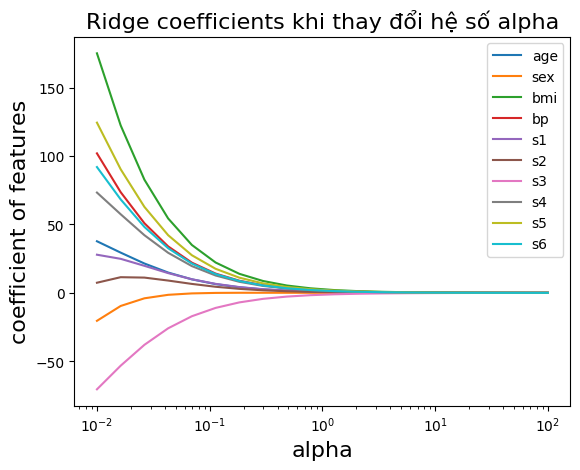

In [ ]:
import numpy as np

class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None

    def fit(self, X, y):
        N, D = X.shape
        I = np.identity(D)
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X) + self.alpha * N * I), np.dot(X.T, y))

    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Model has not been trained. Use fit() before predict().")
        return np.dot(X, self.coef_)




n_alphas = 20
# numpy.logspace(start, stop, num=50, base=10.0, dtype=None, endpoint=True, axis=0)
alphas = 1/np.logspace(2, -2, n_alphas)

coefs = []
for a in alphas:
  ridge = RidgeRegression(alpha = a)
  ridge.fit(X_train,y_train)
  coefs.append(ridge.coef_)
ax = plt.gca()
print(ridge.coef_)
print(alphas)
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
X, y = datasets.load_diabetes(return_X_y = True)
features = datasets.load_diabetes()['feature_names']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state= 42)
print(X_train.shape)
print(y_train.shape)

print(X_train)

(265, 10)
(265,)
[[-0.01277963 -0.04464164  0.06061839 ...  0.03430886  0.07020738
   0.00720652]
 [ 0.06713621 -0.04464164  0.05630715 ... -0.00259226  0.07574055
   0.03620126]
 [ 0.06350368  0.05068012 -0.02560657 ... -0.00259226  0.03839393
   0.01963284]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


In [ ]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha = 0.01)
reg_ridge.fit(X_train, y_train)

# Sai số huấn luyện của mô hình trên tập train
# sử dụng R2_Score
print(reg_ridge.score(X_train, y_train))
y_12 = reg_ridge.predict(X_test)
print("R2 score", r2_score(y_true,y_test))
# Hệ số hồi qui và hệ số chặn
print(reg_ridge.coef_)
print(reg_ridge.intercept_)
print("R2 score", r2_score(y_12,y_test))
print("MSE : ",mean_squared_error(y_test,y_12))

0.5061125253586802
R2 score 0.007557127442845646
[  25.14354034 -219.6049126   591.58561278  353.80290251 -278.18829239
   57.06003388 -144.89708818  102.38894422  439.41346619   38.04550854]
148.91883898495598
R2 score 0.007557127442845646
MSE :  2854.291165155376


code có hệ số chặn


Trong mô hình hồi quy tuyến tính, thuật ngữ chặn (intercept term) là hệ số tương ứng với biến độc lập có giá trị là 1. Trong mô hình hồi quy tuyến tính truyền thống, bạn thường sẽ thêm một cột chứa giá trị 1 vào ma trận các biến độc lập để có được thuật ngữ chặn trong mô hình.

Với Ridge Regression, hệ số chặn thường không được tính toán riêng lẻ nhưng được tính toán kèm theo các hệ số khác. Điều này thường được thực hiện bằng cách thêm một cột của giá trị 1 vào ma trận đầu vào.

In [ ]:
import numpy as np
class RidgeRegressionother:
    def __init__(self, alpha = 1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    def fit(self,X,y):
        N, D = X.shape
        I = np.identity(D + 1)
        # Xbar = np.c_[np.ones(N), X]
        # other way
        one = np.ones((X.shape[0], 1))
        Xbar = np.concatenate((one, X), axis = 1)
        A = np.dot(Xbar.T, Xbar) + N*I*self.alpha
        b = np.dot(Xbar.T,y)
        w = np.dot(np.linalg.pinv(A), b)

        self.intercept_ = w[0]
        self.coef_ = w[1:]
    def predict(self,X):
        if self.coef_ is None:
            raise ValueError("Model has not been trained. Use fit() before predict().")
        N, D = X.shape
        Xbar = np.c_[np.ones(N),X]
        return np.dot(Xbar, np.concatenate(([self.intercept_], self.coef_)))

ridge_model = RidgeRegressionother(alpha=0.01)
ridge_model.fit(X_train, y_train)

y_pe = ridge_model.predict(X_test)
# Access the intercept and coefficients
intercept = ridge_model.intercept_
coefficients = ridge_model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)
print("R2 score", r2_score(y_test,y_pe))
print("MSE : ",mean_squared_error(y_test,y_pe))

Intercept: 148.85101328287007
Coefficients: [ 32.70141359 -10.52941777 145.99054497 100.15154781  17.80687184
   9.87465734 -85.70053289  75.68474036 111.16661428  71.46227698]
R2 score 0.2967171897791817
MSE :  4114.344562084277


In [ ]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        N, D = X.shape
        I = np.identity(D)

        # Thêm một cột của giá trị 1 vào ma trận X
        Xbar = np.c_[np.ones(N), X]

        A = np.dot(Xbar.T, Xbar) + N * np.identity(D + 1) * self.alpha

        # Tính b
        b = np.dot(Xbar.T, y)

        # Tính w sử dụng ma trận nghịch đảo (pseudo-inverse)
        w = np.dot(np.linalg.pinv(A), b)

        # Lưu hệ số chặn và các hệ số khác
        self.intercept_ = w[0]
        self.coef_ = w[1:]

    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Model has not been trained. Use fit() before predict().")
        N, D = X.shape
        Xbar = np.c_[np.ones(N), X]
        return np.dot(Xbar, np.concatenate(([self.intercept_], self.coef_)))

# Example Usage:
# Assuming X_train, y_train, X_test, y_test are defined

# Train the Ridge Regression model
ridge_model = RidgeRegression(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Access the intercept and coefficients
intercept = ridge_model.intercept_
coefficients = ridge_model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 148.85101328287007
Coefficients: [ 32.70141359 -10.52941777 145.99054497 100.15154781  17.80687184
   9.87465734 -85.70053289  75.68474036 111.16661428  71.46227698]


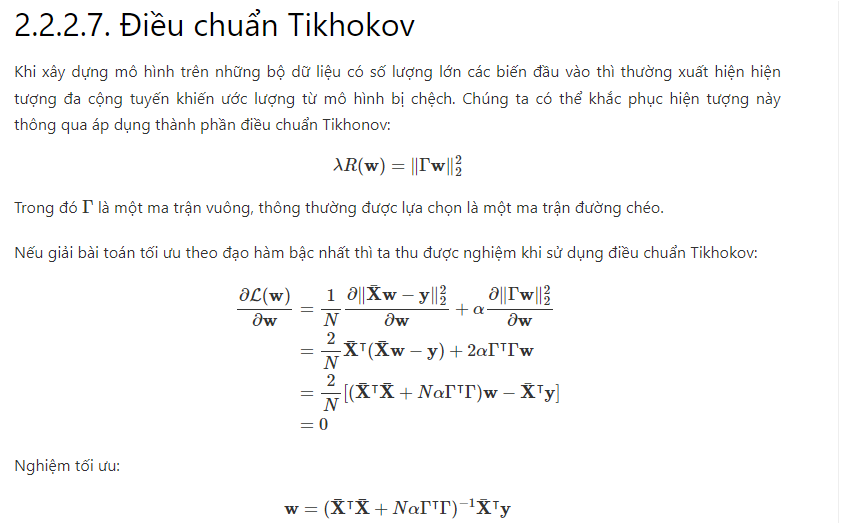

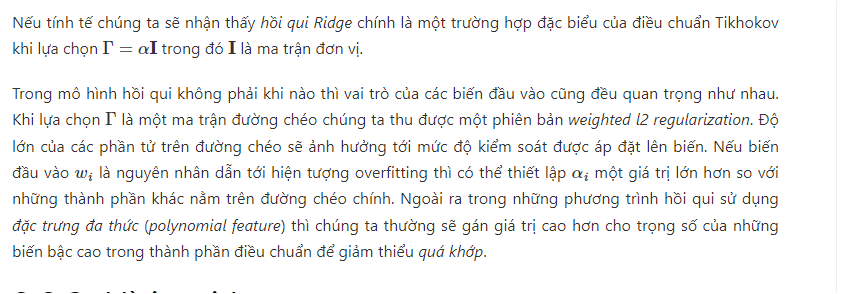

####1.1.3 Lasso

đoạn code minh hoa bằng sklean

In [ ]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha= 00.01).fit(X_train,y_train)

y_pre = lasso.predict(X_test)

print("R2 score", r2_score(y_test,y_pre))
print("MSE : ",mean_squared_error(y_test,y_pre))
print(lasso.coef_)

R2 score 0.5109465246174847
MSE :  2861.0602701588773
[  20.27982584 -215.10814942  602.60184652  354.01241882 -226.94429365
   17.18373588 -164.87081987   86.57525056  428.57551194   30.72130582]


Sơ lược qua về Lasso cũng giống như RIDGE sử dụng hàm L2 thì lasso chỉ sử dụng hàm l1

Ưu điểm của L1 là có thể trả về kết quả là một vecto hình bên dưới có thể giảm thích rõ đều này



Bây giờ chúng ta sẽ tìm cách giải thích tại sao hồi qui Lasso có thể trả về kết quả là một véc tơ thưa trong khi hồi qui Ridge chỉ tìm cách giảm các hệ số của mô hình chứ không hoàn toàn tiến về 0. Một mô tả được thể hiện thông qua hình bên dưới sẽ giúp ta hiểu rõ hơn.
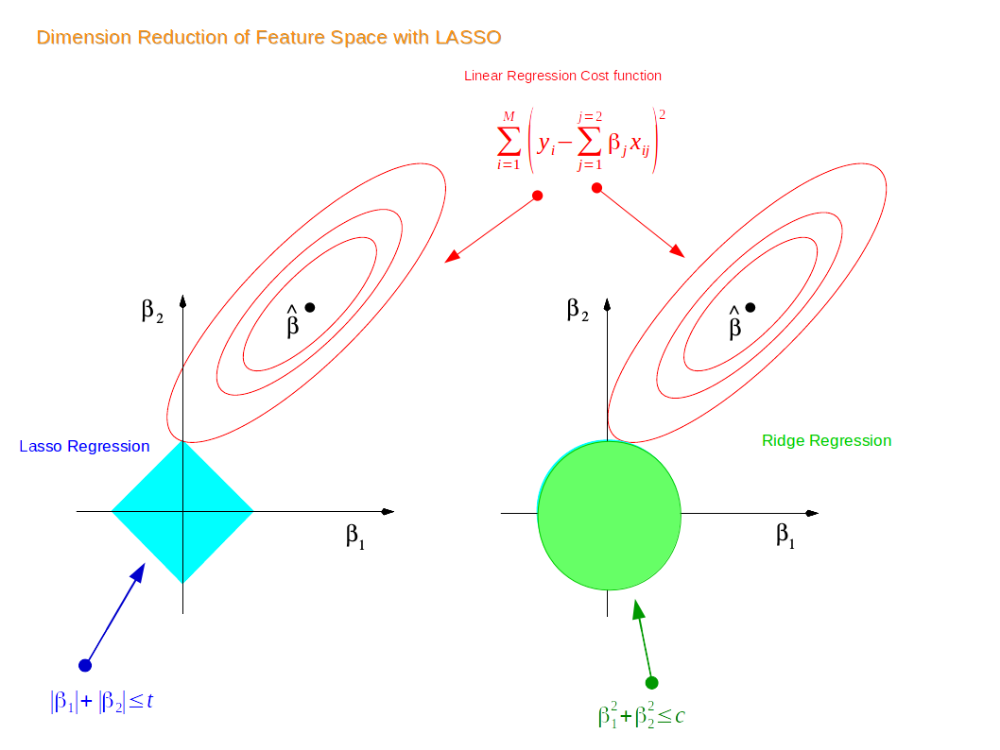

Đối với hồi qui Lasso thì thông thường điểm tiếp xúc giữa đường đồng mức của hàm mục tiêu và tập nghiệm thường chạm đỉnh của hình thoi. Đây là những điểm tương ứng với một chiều bằng 0. Trong khi đó, trong hồi qui Ridge thì miền xác định là một hình tròn nên tiểm tiếp xúc sẽ thường có toạ độ khác 0.

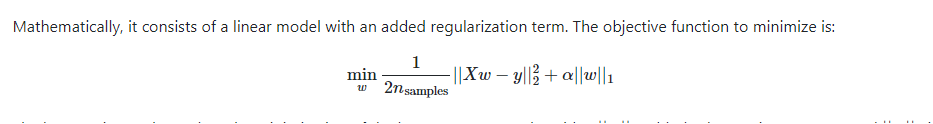

sử dụng GD

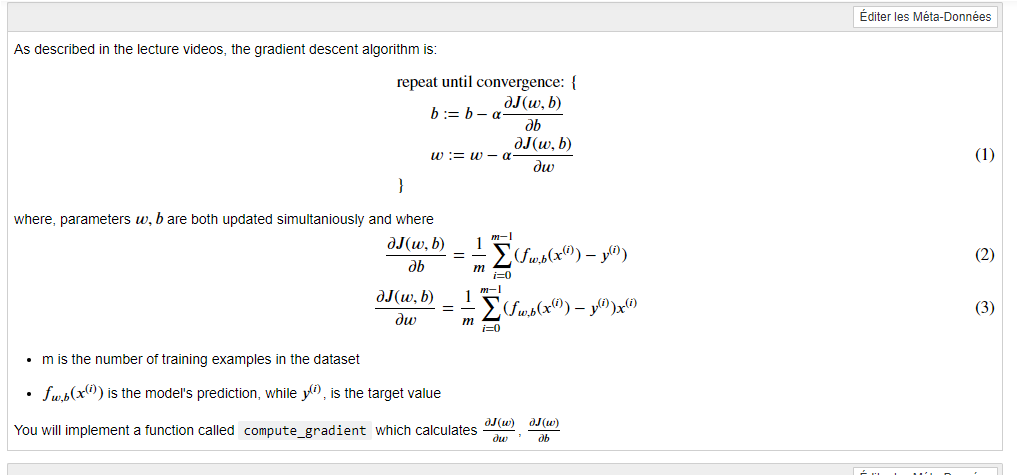

In [ ]:
import numpy as np
theta = np.zeros((X_train.shape[1],1))
print((X_train.dot(theta)).shape)
m = X_train.shape[0]
X_b = np.c_[np.ones((m, 1)), X_train]
print(X_b.shape)
class Lasso():
  def __init__(self, alpha=0.01, learning_rate=0.01, iterations=10000,tol=1e-4):
    self.alpha = alpha
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.tol = tol
    self.weights = None
    self.bias = None

  def fit(self, X,y):
    m,n = X.shape
    # việc có thêm 1 cột vào trước x vì có hệ số intercept vào đầu
    # y = w*x + b
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for _ in range(self.iterations):
        y_predicted = np.dot(X, self.weights) + self.bias

        # Tính toán gradient
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * np.sign(self.weights)
        db = (1 / n_samples) * np.sum(y_predicted - y)

        if np.linalg.norm(dw, ord=np.inf) < self.tol and np.linalg.norm(db, ord = np.inf):
            break
        # Cập nhật trọng số và bias
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db


  def predict(self, X):
    return np.dot(X,self.weights) + self.bias

lasso_model = Lasso(alpha=0.01, learning_rate=0.01,iterations=10000)
lasso_model.fit(X_train, y_train)
print(lasso_model.weights)
y_pre_1 = lasso_model.predict(X_test)
print("R2 score", r2_score(y_test,y_pre_1))
print("MSE : ",mean_squared_error(y_test,y_pre_1))

(265, 1)
(265, 11)
[  41.87511899   -4.70356809  169.98011856  118.13772873   28.56646257
   19.91551337 -103.78329868   96.69924173  133.7894293    89.84047643]
R2 score 0.34235898088595174
MSE :  3847.330990424585


In [ ]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha= 00.01).fit(X_train,y_train)

y_pre = lasso.predict(X_test)

print("R2 score", r2_score(y_test,y_pre))
print("MSE : ",mean_squared_error(y_test,y_pre))
print(lasso.coef_)

R2 score 0.5109465246174847
MSE :  2861.0602701588773
[  20.27982584 -215.10814942  602.60184652  354.01241882 -226.94429365
   17.18373588 -164.87081987   86.57525056  428.57551194   30.72130582]


Sử dụng kỹ thuật Adam

In [ ]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha= 0.01).fit(X_train,y_train)

y_pre = lasso.predict(X_test)

print("R2 score", r2_score(y_pre,y_test))
print("MSE : ",mean_squared_error(y_test,y_pre))
print(lasso.coef_)
print(lasso.intercept_)

R2 score 0.010738062886114896
MSE :  2861.0602701588773
[  20.27982584 -215.10814942  602.60184652  354.01241882 -226.94429365
   17.18373588 -164.87081987   86.57525056  428.57551194   30.72130582]
148.896153935263


#### 1.1.4. Multi-task Lasso


Được sử dụng trong các tình huống bài toán đa nhiệm vụ, thực hiện nhiều nhiệm vụ cùng một lúc

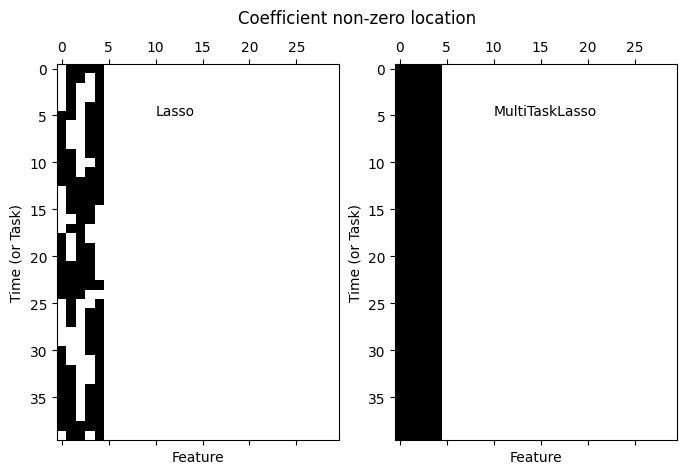

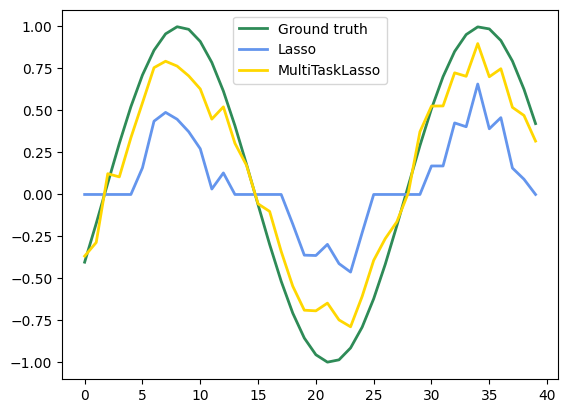

In [ ]:
"""
=============================================
Joint feature selection with multi-task Lasso
=============================================

The multi-task lasso allows to fit multiple regression problems
jointly enforcing the selected features to be the same across
tasks. This example simulates sequential measurements, each task
is a time instant, and the relevant features vary in amplitude
over time while being the same. The multi-task lasso imposes that
features that are selected at one time point are select for all time
point. This makes feature selection by the Lasso more stable.

"""

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

# %%
# Generate data
# -------------

import numpy as np

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

# %%
# Fit models
# ----------

from sklearn.linear_model import Lasso, MultiTaskLasso

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_

# %%
# Plot support and time series
# ----------------------------

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()


Như đã được trực quan bởi hình trên thì multi-task Lasso có thể thực hiện các feature cùng một lúc tốt hơn lasso hầu như là không bị mất coef trong quá trình thực hiện

Nó được ứng dụng trong các bài toán nhận dạng cùng lúc các đặc trưng :
như trong cv thì trong một khung ảnh có có thể thực hiện cùng lúc nhận dạng vị trí đối tượng và phân loại

Trong hệ thống gợi ý, Multi-task Lasso có thể giúp dự đoán nhiều loại hành vi của người dùng từ các đặc trưng chung của họ, chẳng hạn như thói quen mua sắm và sở thích nội dung.

#### 1.1.5 Elastic Net

Algorithms Elastic Net là sự kết hợp giữa Lasso and Ridge với 2 thành phần cơ bản đó là L1 và L2
Biểu thức như sau

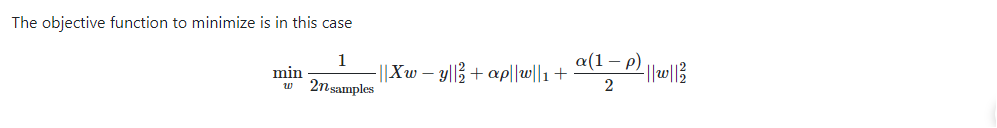

từ hàm chi phí trên ta có thể xác định như sau khi p = 1 thì chỉ còn L1
với p = 0 thì còn L2, và p chạy từ 0 đến 1


với Các hệ số  a và p lần lượt tương ứng với alpha và l1_ratio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
data = dataframe.values
X,y = data[:,:-1], data[:,-1]

# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 1, l1_ratio = 0.5)
cv = RepeatedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

scores = cross_val_score(model, X,y)
print(scores)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


[0.57022044 0.6626767  0.40322405 0.45880379 0.26833761]
Mean MAE: 0.473 (0.136)


In [ ]:
X.shape

(506, 13)

In [ ]:
print(X_scaled)

[[0.00000000e+00 2.35294118e-01 7.50000000e-01 ... 5.00000000e-01
  1.00000000e+00 8.00000000e-01]
 [6.85400960e-04 0.00000000e+00 7.50000000e-01 ... 2.50000000e-01
  1.00000000e+00 8.00000000e-01]
 [1.37080192e-03 2.35294118e-01 7.50000000e-01 ... 5.00000000e-01
  1.00000000e+00 8.00000000e-01]
 ...
 [9.98629198e-01 2.94117647e-01 7.50000000e-01 ... 1.00000000e+00
  1.00000000e+00 8.00000000e-01]
 [9.99314599e-01 0.00000000e+00 7.50000000e-01 ... 1.00000000e+00
  1.00000000e+00 8.00000000e-01]
 [1.00000000e+00 0.00000000e+00 7.50000000e-01 ... 5.00000000e-01
  1.00000000e+00 8.00000000e-01]]


In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
print(type(X_scaled))

<class 'numpy.ndarray'>


In [ ]:
print(type(Y),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.378
Config: {'alpha': 0.01, 'l1_ratio': 0.97}


#### Build model from Zeros to Hero

Tung parameter

In [ ]:

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
data = dataframe.values
# X feature y target
X,y = data[:,:-1], data[:,-1]

In [ ]:
dataframe.head()

0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2

Library necessary

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
idx = np.arange(X.shape[0])
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Split Data

In [ ]:
X_train, X_test, y_train,y_test, idx_train, idx_test = train_test_split(X,y, idx, test_size = 0.33, random_state = 42)

Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0


In [ ]:
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)
ps

PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1]))

Khỏi tạo Pipeline gồm 2 bước chuẩn hóa và huấn luyện

In [ ]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Lasso())
])

GridSearch mô hình trên không gian tham số alpha

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0, 1, 0.1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
idx = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X,y, idx, test_size=0.33, random_state=42)

# Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

# Khởi tạo pipeline gồm 2 bước, 'scaler' để chuẩn hoá đầu vào và 'model' là bước huấn luyện
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Lasso())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0, 1, 0.1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV 1/1] END ................model__alpha=0.0;, score=-20.724 total time=   0.0s
[CV 1/1] END ................model__alpha=0.1;, score=-21.853 total time=   0.0s
[CV 1/1] END ................model__alpha=0.2;, score=-22.738 total time=   0.0s
[CV 1/1] END model__alpha=0.30000000000000004;, score=-23.548 total time=   0.0s
[CV 1/1] END ................model__alpha=0.4;, score=-24.314 total time=   0.0s
[CV 1/1] END ................model__alpha=0.5;, score=-24.632 total time=   0.0s
[CV 1/1] END .model__alpha=0.6000000000000001;, score=-25.085 total time=   0.0s
[CV 1/1] END .model__alpha=0.7000000000000001;, score=-25.328 total time=   0.0s
[CV 1/1] END ................model__alpha=0.8;, score=-25.568 total time=   0.0s
[CV 1/1] END ................model__alpha=0.9;, score=-25.843 total time=   0.0s
Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.0))])
Best core:  -20.7240234373398


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.896e+03, tolerance: 2.988e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [ ]:
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.0))])
Best core:  -20.7240234373398


In [ ]:
search.best_params_


{'model__alpha': 0.0}

In [ ]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Ridge())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0, 1, 0.1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV 1/1] END ................model__alpha=0.0;, score=-20.724 total time=   0.0s
[CV 1/1] END ................model__alpha=0.1;, score=-20.727 total time=   0.0s
[CV 1/1] END ................model__alpha=0.2;, score=-20.730 total time=   0.0s
[CV 1/1] END model__alpha=0.30000000000000004;, score=-20.733 total time=   0.0s
[CV 1/1] END ................model__alpha=0.4;, score=-20.735 total time=   0.0s
[CV 1/1] END ................model__alpha=0.5;, score=-20.738 total time=   0.0s
[CV 1/1] END .model__alpha=0.6000000000000001;, score=-20.741 total time=   0.0s
[CV 1/1] END .model__alpha=0.7000000000000001;, score=-20.744 total time=   0.0s
[CV 1/1] END ................model__alpha=0.8;, score=-20.747 total time=   0.0s
[CV 1/1] END ................model__alpha=0.9;, score=-20.750 total time=   0.0s
Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=0.0))])
Best core:  -20.72402343733985


In [ ]:
best = search.best_estimator_

Save model

In [ ]:
import pickle
# create an iterator object with write permission - model.pickle
with open('dtr_pkl', 'wb') as files:
    pickle.dump(best, files)

# load saved model
with open('dtr_pkl' , 'rb') as f:
    dtr2 = pickle.load(f)



load model and predict

In [ ]:
y_pre = dtr2.predict(X_test)

print(mean_squared_error(y_pre,y_test))

19.038544860675046


In [ ]:
r2_score(y_test,y_pre)


0.7484286454620563

In [ ]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', ElasticNet())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {
                          'model__alpha': np.arange(0, 1, 0.1), # Tham số alpha
                          'model__l1_ratio': [0.2, 0.5, 0.8] # Tham số l1_ratio
                      }, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
[CV 1/1] END model__alpha=0.0, model__l1_ratio=0.2;, score=-20.724 total time=   0.0s
[CV 1/1] END model__alpha=0.0, model__l1_ratio=0.5;, score=-20.724 total time=   0.0s
[CV 1/1] END model__alpha=0.0, model__l1_ratio=0.8;, score=-20.724 total time=   0.0s
[CV 1/1] END model__alpha=0.1, model__l1_ratio=0.2;, score=-21.581 total time=   0.0s
[CV 1/1] END model__alpha=0.1, model__l1_ratio=0.5;, score=-21.615 total time=   0.0s
[CV 1/1] END model__alpha=0.1, model__l1_ratio=0.8;, score=-21.726 total time=   0.0s
[CV 1/1] END model__alpha=0.2, model__l1_ratio=0.2;, score=-22.337 total time=   0.0s
[CV 1/1] END model__alpha=0.2, model__l1_ratio=0.5;, score=-22.570 total time=   0.0s
[CV 1/1] END model__alpha=0.2, model__l1_ratio=0.8;, score=-22.700 total time=   0.0s
[CV 1/1] END model__alpha=0.30000000000000004, model__l1_ratio=0.2;, score=-23.054 total time=   0.0s
[CV 1/1] END model__alpha=0.30000000000000004, model__l1_ratio=

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.896e+03, tolerance: 2.988e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

In [ ]:

print(search.best_estimator_)
print('Best core: ', search.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.0, l1_ratio=0.2))])
Best core:  -20.7240234373398


Tiêu chuẩn tikhonov

https://phamdinhkhanh.github.io/deepai-book/ch_ml/RidgedRegression.html#dieu-chuan-tikhokov

#### 1.1.6 Build full Model Machine  Learning by sklearn

library need neccesery

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import sklearn.model_selection as skl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso


In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

od.download('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data')

Skipping, found downloaded files in "./house-prices-advanced-regression-techniques" (use force=True to force download)


In [ ]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Preprocessing data

In [ ]:
label_encoder = LabelEncoder()

label = {}

for i in df.columns:
  if df[i].dtype == 'object':
    label_encoder.fit(df[i])
    df[i] = label_encoder.fit_transform(df[i])
    label[i] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
label


{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'Pave': 1, nan: 2},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'Blmngtn': 0,
  'Blueste': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'ClearCr': 4,
  'CollgCr': 5,
  'Crawfor': 6,
  'Edwards': 7,
  'Gilbert': 8,
  'IDOTRR': 9,
  'MeadowV': 10,
  'Mitchel': 11,
  'NAmes': 12,
  'NPkVill': 13,
  'NWAmes': 14,
  'NoRidge': 15,
  'NridgHt': 16,
  'OldTown': 17,
  'SWISU': 18,
  'Sawyer': 19,
  'SawyerW': 20,
  'Somerst': 21,
  'StoneBr': 22,
  'Timber': 23,
  'Veenker': 24},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'PosA': 3,
  'PosN': 4,
  'RRAe': 5,
  'RRAn': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Artery

In [ ]:
df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       3      4   
1            3            3          0  ...         0       3      4   
2            0            3          0  ...         0       3      4   
3            0            3          0  ...         0       3      4   
4            0            3          0  ...         0       3      4   
...        ...          ...        ...  ...       ...     ...    ...   
1455         3            3          0  ...         0       3      4   
1456         3            3          0  ...         0       3      2   
1457         3            3          0  ...         0       3      0   
1458         3            3          0  ...         0       3      4   
1459         3            3          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               4        0       2    2008         8              4     208500  
1               4        0       5    2007         8              4     181500  
2               4        0       9    2008         8              4     223500  
3               4        0       2    2006         8              0     140000  
4               4        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            4        0       8    2007         8              4     175000  
1456            4        0       2    2010         8              4     210000  
1457            2     2500       5    2010         8              4     266500  
1458            4        0       4    2010         8              4     142125  
1459            4        0       6    2008         8              4     147500  

[1460 rows x 81 columns]

In [ ]:
df = df.drop(columns = ['MasVnrArea','GarageYrBlt'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

scaling data

In [ ]:
X = df.drop(['SalePrice'], axis = 1)
Y = df['SalePrice'].values.reshape(-1,)

In [ ]:
Y.shape

(1460,)

In [ ]:
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
X

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0            3            3          0  ...            0         0       3   
1            3            3          0  ...            0         0       3   
2            0            3          0  ...            0         0       3   
3            0            3          0  ...            0         0       3   
4            0            3          0  ...            0         0       3   
...        ...          ...        ...  ...          ...       ...     ...   
1455         3            3          0  ...            0         0       3   
1456         3            3          0  ...            0         0       3   
1457         3            3          0  ...            0         0       3   
1458         3            3          0  ...            0         0       3   
1459         3            3          0  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         4            4        0       2    2008         8              4  
1         4            4        0       5    2007         8              4  
2         4            4        0       9    2008         8              4  
3         4            4        0       2    2006         8              0  
4         4            4        0      12    2008         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1455      4            4        0       8    2007         8              4  
1456      2            4        0       2    2010         8              4  
1457      0            2     2500       5    2010         8              4  
1458      4            4        0       4    2010         8              4  
1459      4            4        0       6    2008         8              4  

[1460 rows x 80 columns]

Chuẩn hóa X

In [ ]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

In [ ]:
X_scaled.shape

(1460, 80)

In [ ]:
# create train and test part
X_train , X_test , Y_train , Y_test =train_test_split(X,Y, test_size= 0.2 ,random_state=0 , shuffle=True)

In [ ]:
# Base model
from sklearn.metrics import r2_score ,mean_absolute_percentage_error
from catboost import CatBoostRegressor
model = CatBoostRegressor(silent=True)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

print(f"r2: {r2}")
print(f"mean absolute percentage error: {mape}")

r2: 0.8829905979147268
mean absolute percentage error: 0.08692146989684707


In [ ]:
idx = np.arange(X.shape[0])
# Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

In [ ]:
from sklearn.linear_model  import Lasso, Ridge, ElasticNet

In [ ]:
X_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
618    619          20         3         90.0    11694       1      2   
870    871          20         3         60.0     6600       1      2   
92      93          30         3         80.0    13360       1      0   
817    818          20         3          NaN    13265       1      2   
302    303          20         3        118.0    13704       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
763    764          60         3         82.0     9430       1      2   
835    836          20         3         60.0     9600       1      2   
1216  1217          90         4         68.0     8930       1      2   
559    560         120         3          NaN     3196       1      2   
684    685          60         3         58.0    16770       1      2   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
618          3            3          0  ...          260         0       3   
870          3            3          0  ...            0         0       3   
92           0            1          0  ...            0         0       3   
817          0            3          0  ...            0         0       3   
302          0            3          0  ...            0         0       3   
...        ...          ...        ...  ...          ...       ...     ...   
763          3            3          0  ...          180         0       3   
835          3            3          0  ...            0         0       3   
1216         3            3          0  ...            0         0       3   
559          3            3          0  ...            0         0       3   
684          1            3          0  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
618       4            4        0       7    2007         6              5  
870       4            4        0       8    2009         8              4  
92        4            4        0       8    2009         8              4  
817       4            4        0       7    2008         8              4  
302       4            4        0       1    2006         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
763       4            4        0       7    2009         8              4  
835       4            4        0       2    2010         8              4  
1216      4            4        0       4    2010         8              4  
559       4            4        0      10    2006         8              4  
684       4            4        0       6    2010         8              4  

[1168 rows x 78 columns]

In [ ]:
reg_ridge = Ridge(alpha = 0.01)
reg_ridge.fit(X_train, Y_train)

# Sai số huấn luyện của mô hình trên tập train
# sử dụng R2_Score
print(reg_ridge.score(X_train, y_train))
y_true = reg_ridge.predict(X_test)
print("R2 score", r2_score(y_true,y_test))

ValueError: ignored

In [ ]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Ridge())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0, 1, 0.1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV 1/1] END ................model__alpha=0.0;, score=-20.724 total time=   0.0s
[CV 1/1] END ................model__alpha=0.1;, score=-20.727 total time=   0.0s
[CV 1/1] END ................model__alpha=0.2;, score=-20.730 total time=   0.0s
[CV 1/1] END model__alpha=0.30000000000000004;, score=-20.733 total time=   0.0s
[CV 1/1] END ................model__alpha=0.4;, score=-20.735 total time=   0.0s
[CV 1/1] END ................model__alpha=0.5;, score=-20.738 total time=   0.0s
[CV 1/1] END .model__alpha=0.6000000000000001;, score=-20.741 total time=   0.0s
[CV 1/1] END .model__alpha=0.7000000000000001;, score=-20.744 total time=   0.0s
[CV 1/1] END ................model__alpha=0.8;, score=-20.747 total time=   0.0s
[CV 1/1] END ................model__alpha=0.9;, score=-20.750 total time=   0.0s
Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=0.0))])
Best core:  -20.72402343733985


#### 1.7 Baysian Regression

link : https://www.geeksforgeeks.org/implementation-of-bayesian-regression/

In [ ]:
!pip install opendatasets

###### Load data from kaggle

In [ ]:
import pandas as pd

import opendatasets as od

od.download('https://www.kaggle.com/datasets/camnugent/california-housing-prices')

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


###### Preparation Data

In [ ]:
df = pd.read_csv('california-housing-prices/housing.csv')

In [ ]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
# information data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# see value null
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

###### Handle miss values

handle missing values with kNN Unsupervised Learning Imputation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
# function that imputes a dataframe
def impute_knn(df):

    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan

    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()] # data test for KNN y_test
        imp_train = ldf.dropna() # data train for KNN y_train all no missing data
        model = KNeighborsRegressor(n_neighbors=5)
        # imp_train[cols_no_nan] is x , imp_train is y
        knr = model.fit(imp_train[cols_no_nan],imp_train[col])
        ldf.loc[df[col].isna(),col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ldf,ldf_putaside],axis=1)


df_after_handle =  impute_knn(df)

###### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
trdata, tedata = train_test_split(df_after_handle, test_size=0.2, random_state=42)

###### Exploratory Data Analysis

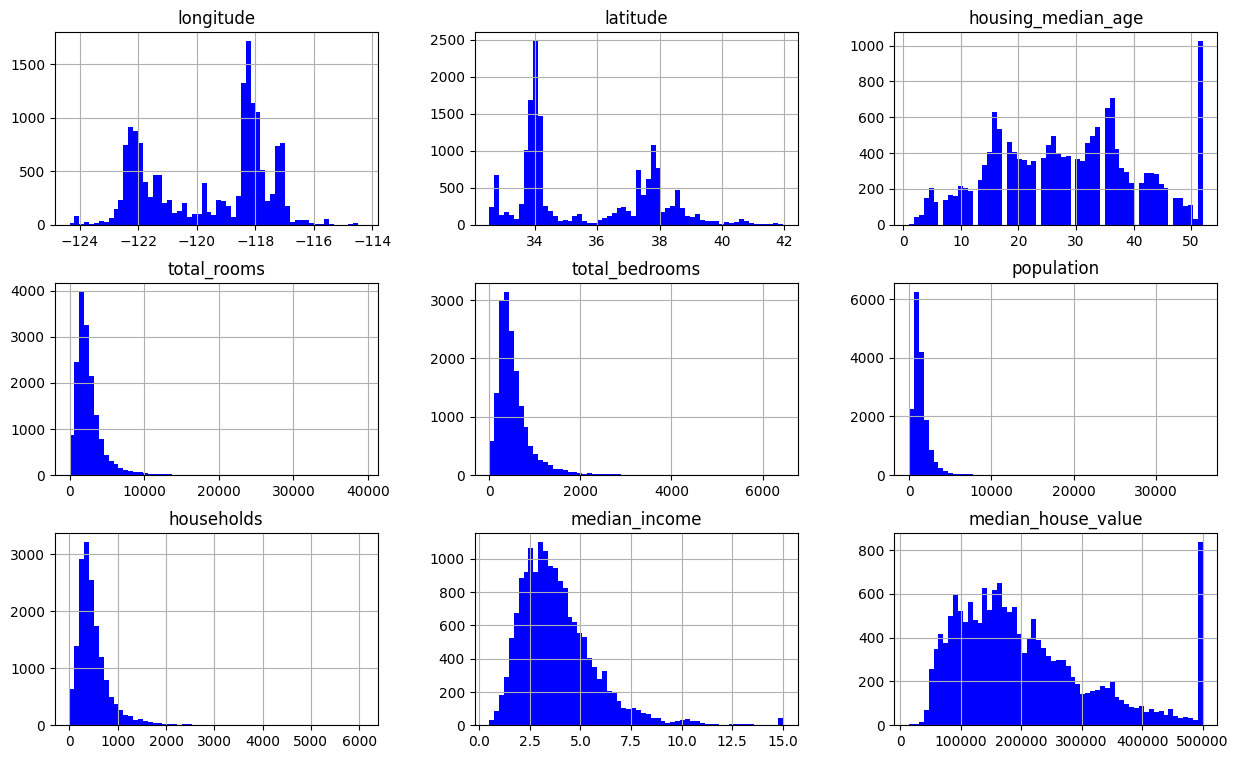

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
trdata.hist(bins = 60, figsize = (15,9), color = 'blue')
plt.show()

In [ ]:
!pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 44.0 MB/s eta 0:00:00


In [ ]:
!pip install mllibs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
import os,sys,warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

import numpy as np
from numpy.linalg import pinv,inv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
%matplotlib inline

import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, RegressorMixin,ClassifierMixin
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from mllibs.bl_regressor import BR
pi = 4.0*np.arctan(1.0)

color1 = 'darkviolet'
color2 = 'indigo'

ModuleNotFoundError: No module named 'mllibs.bl_regressor'

In [ ]:
def corrMat(df,id=False):

    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()

corrMat(trdata) # plot masked numpy correlation matrix


ValueError: could not convert string to float: 'NEAR OCEAN'

https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction#3-|-EXPLORATORY-DATA-ANALYSIS

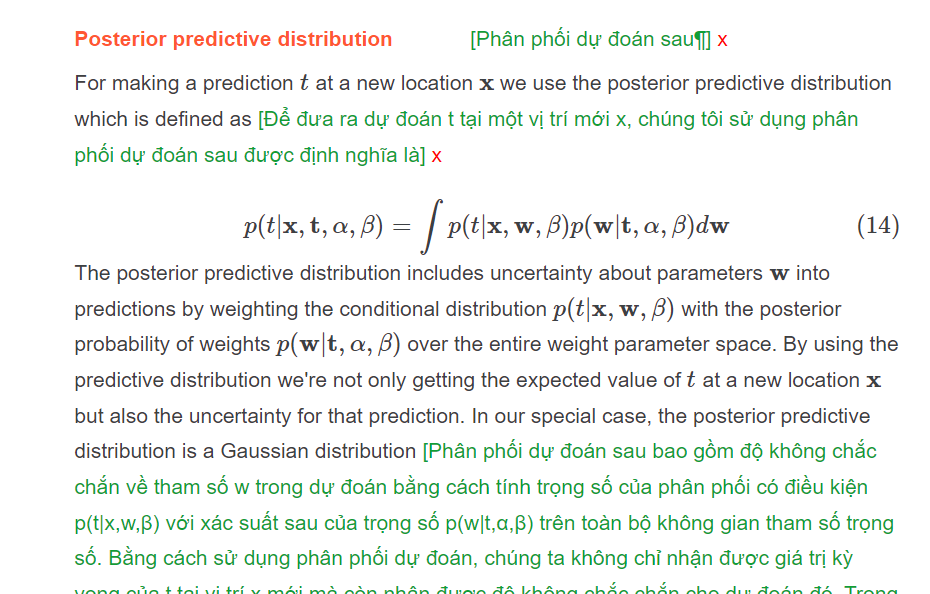
Biểu thức này biểu diễn việc tính toán phân phối dự đoán của một giá trị mục tiêu mới dựa trên dữ liệu đã quan sát và sự không chắc chắn về các tham số mô hình. Phân phối dự đoán hậu nghiệm này tích hợp toàn bộ thông tin từ dữ liệu đã quan sát và sự không chắc chắn của mô hình, mang lại một cách tiếp cận toàn diện và mạnh mẽ trong dự đoán.



#### 1.8  Bayesian Ridge Regression

https://buildingblock.ai/bayesian-ridge-regression

Khó hiểu chỉ áp dụng



#### 1.9 Logistic Regression

https://buildingblock.ai/logistic-regression-guide

Build model Logistic ALO and LOOCV

ALO : Optimate Approximate Leave-one-out Cross-validation

LOOCV : leave-one-out cross-validation

#### 1.10 Generalized Linear Models

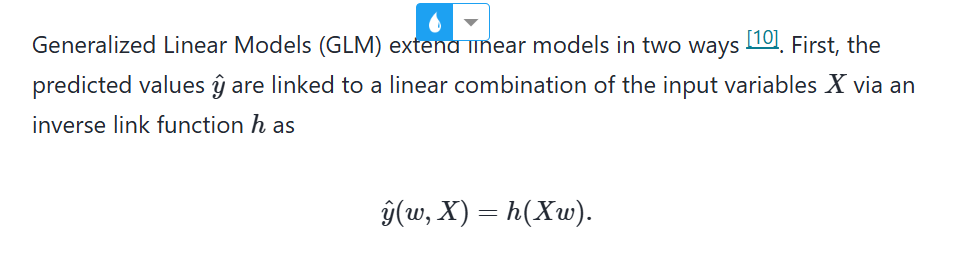

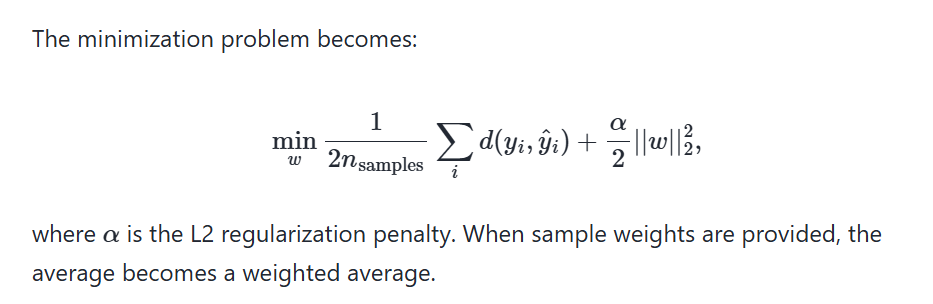

With function d (Unit Deviance)

d general for distribution table below

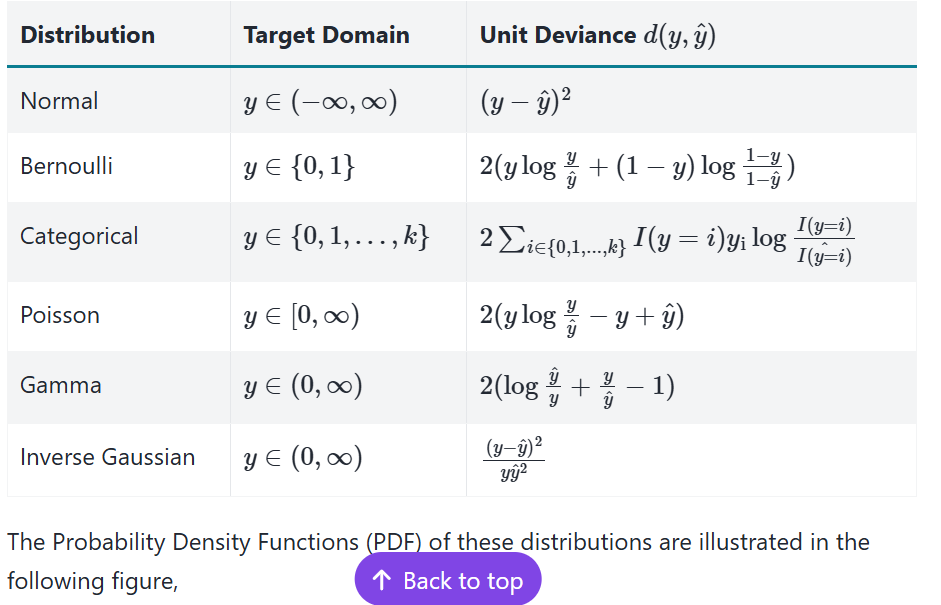



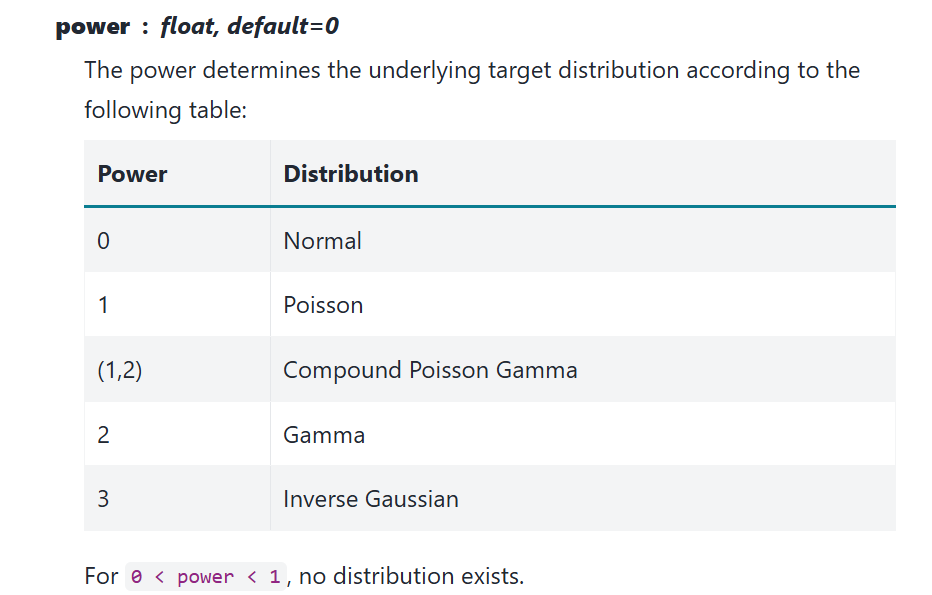

Việc lựa chọn phân phối phụ thuộc vào vấn đề trong tầm tay:

Nếu giá trị đích (y) là số đếm (giá trị số nguyên không âm) hoặc tần số tương đối (không âm), bạn có thể sử dụng phân phối Poisson với một liên kết nhật ký.

Nếu các giá trị mục tiêu (y) có giá trị dương và lệch, bạn có thể thử Gamma phân phối với một liên kết nhật ký.

Nếu các giá trị mục tiêu dường như nặng hơn phân phối Gamma, bạn có thể thử phân phối Gaussian nghịch đảo (hoặc thậm chí lũy thừa phương sai cao hơn của gia đình Tweedie).

Nếu các giá trị đích là xác suất, bạn có thể sử dụng Bernoulli Phân phối. Bản phân phối Bernoulli với một liên kết logit có thể được sử dụng cho phân loại nhị phân. Phân phối Categorical với một liên kết softmax có thể là được sử dụng để phân loại nhiều lớp y





#### Phần còn lại xem ở đây

Passive Aggressive Algorithms :
Các thuật toán tích cực thụ động là một nhóm các thuật toán dành cho việc học tập quy mô lớn. Chúng tương tự như Perceptron ở chỗ chúng không yêu cầu tốc độ học tập. Tuy nhiên, trái ngược với Perceptron, chúng bao gồm tham số chính quy C

Qualier Regression : https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html

compare LDA and PCA

PCA : Principal Component Analysis Phân tích thành phần chính : kết hợp giữa các thuộc tính (các thành phân chính), có nghĩa là phân tích ở một class phân tích các label có sẵn của class rồi tách biệt chúng ra

LDA xác định các thuộc tính có sự khác biệt giữa các lớp ,

túc PCA SẼ phân tích phân chính của các lớp dựa vào label có sẵn như chọn một thuộc tính có ảnh hưởng đến data và thuật toán kiểu phải biết label có sẵn mới có thể biết được thành phần chính của data
LDA sẽ phân tích các thuộc tính có khác biệt lớn nhát giữa các lớp như sự khác biệt như chiều hoa in data Iris

pca
https://viblo.asia/p/ml-from-scratch-thuat-toan-giam-chieu-du-lieu-pca-7ymJXKMa4kq

article : https://jstf.huit.edu.vn/uploads/files/so-tap-chi/nam-2022/Tap-22-So-3/4_202202CNHH09R3_Thanh%20An%26Tue%20Anh_%2012P_34-45.pdf


https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [ ]:
import openpyxl
import pandas as pd
with open('a.txt', 'r') as file:
    lines = file.readlines()
    # Print the first 5 lines

data = []
for i in lines[0:]:
	parts = i.split()

	# Formatting the parts as required
	formatted_string = f"{parts[0]}, {' '.join(parts[1:-4])}, {parts[-4]}, {parts[-3]}, {parts[-2]}, {parts[-1]}"
	data.append(formatted_string)

# print(data)

split_data = [item.split(", ") for item in data]

# Tạo DataFrame từ danh sách đã tách
df = pd.DataFrame(split_data[1:], columns=split_data[0])
# columns = ['D','P','H','Solubility']





In [ ]:
df['H'].iloc[34] = 4
df['Solubility'].iloc[34] = 1
df.iloc[34]

<ipython-input-26-36c86442e294>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['H'].iloc[34] = 4
<ipython-input-26-36c86442e294>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Solubility'].iloc[34] = 1


HSP                     531
No. Solvent    Nitrobenzene
D                      20.0
P                       8.6
H                         4
Solubility                1
Name: 34, dtype: object

In [ ]:
df

HSP                              No. Solvent     D     P     H Solubility
0     56                             Benzophenone  19.6   8.6   5.7          1
1     93                                2-Butanol  15.8   5.7  14.5          0
2    717                          2-Butyl octanol  16.1   3.6   9.3          0
3   1060                            Butyraldehyde  15.6  10.1   6.2          0
4    118                   Caprolactone (epsilon)  19.7  15.0   7.4          0
5    955                         1-Chloro pentane  16.0   6.9   1.9          1
6    156                               Chloroform  17.8   3.1   5.7          1
7    182                             Cyclohexanol  17.4   4.1  13.5          0
8    183                            Cyclohexanone  17.8   6.3   5.1          1
9    184                          Cyclohexylamine  17.2   3.1   6.5          1
10   188                           Cyclopentanone  17.9  11.9   5.2          0
11   194                 cis-Decahydronaphthalene  18.8   0.0     0          1
12  1019                       1.4-Dichlorobutane  18.3   7.7   2.8          1
13   791            1.1-Diethoxy ethanol (acetal)  15.2   5.4   5.3          0
14   269  Ethylene glycol monoethyl ether acetate  16.2   5.1   9.2          0
15  1084                         Diisopropylamine  14.8   1.7   3.5          0
16   889                     1.2-Dimethoxybenzene  19.2   4.4   9.4          0
17   328                            Ethyl acetate  15.8   5.3   7.2          0
18   333                            Ethyl benzene  17.8   0.6   1.4          1
19   353                            Ethyl lactate  16.0   7.6  12.5          0
20   345                          2-Ethyl-hexanol  15.9   3.3  11.8          0
21   758            Ethylene glycol dibutyl ether  15.7   4.5   4.2          0
22   412                               Hexadecane  16.3   0.0     0          0
23   419                            Hexyl acetate  15.8   2.9   5.9          1
24   440                        Isopropyl acetate  14.9   4.5   8.2          0
25  1063                            Laurylalcohol  17.2   3.8   9.3          0
26   450                            Mesityl oxide  16.4   6.1   6.1          0
27   464                           Methyl acetate  15.5   7.2   7.6          0
28   472                          Methyl benzoate  17.0   8.2   4.7          1
29   481                      Methyl ethyl ketone  16.0   9.0   5.1          0
30   500                     1-Methyl naphthalene  20.6   0.8   4.7          1
31   502                            Methyl oleate  14.5   3.9   3.7          0
32  1029                       3-Methyl-2-butanol  15.6   5.2  13.4          0
33   524                     Methylene dichloride  18.2   6.3   6.1          1
34   531                             Nitrobenzene  20.0   8.6   4,1          0
35   546                            Oleyl alcohol  14.3   2.6   8.0          0
36  1051                              Pyrrolidine  17.9   6.5   7.4          1
37   704                          Salicylaldehyde  19.4  10.7  14.7          0
38   617                          Tetrahydrofuran  16.8   5.7   8.0          1
39   618                    Tetrahydronaphthalene  19.6   2.0   2.9          1
40   885               1.2.3.5-Tetramethylbenzene  18.6   0.5   0.5          1
41   637                                  Toluene  18.0   1.4   2.0          1
42   953                              2-Toluidine  19.4   5.8   9.4          0

In [ ]:
df['D'] = df['D'].astype(float)
df['P'] = df['P'].astype(float)
df['H'] = df['H'].astype(float)
df['Solubility'] = df['Solubility'].astype(float)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

class PCA:
  def __init__(self, n_dimention: int):
    self.n_dimention = n_dimention

  def fit_transform(self, X):
    mean = np.mean(X, axis=0)
    X = X - mean
    cov = X.T.dot(X) / X.shape[0]
    eigen_values, eigen_vectors, = np.linalg.eig(cov)
    select_index = np.argsort(eigen_values)[::-1][:self.n_dimention]
    U = eigen_vectors[:, select_index]
    X_new = X.dot(U)
    return X_new

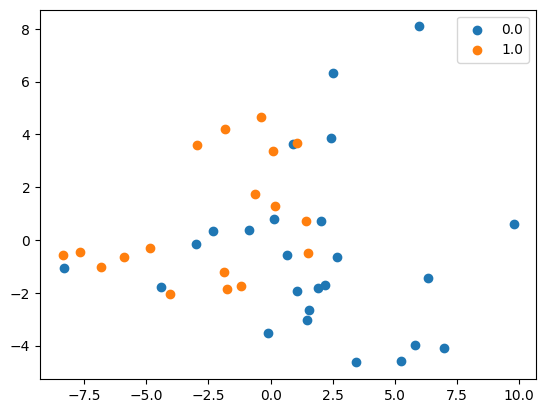

In [ ]:
if __name__ == "__main__":

  X = df[['D','P','H']].to_numpy()
  Y = df.Solubility.to_numpy()

  pca = PCA(n_dimention=2)
  new_X = pca.fit_transform(X)

  for label in set(Y):
    X_class = new_X[Y == label]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=label)

  plt.legend()

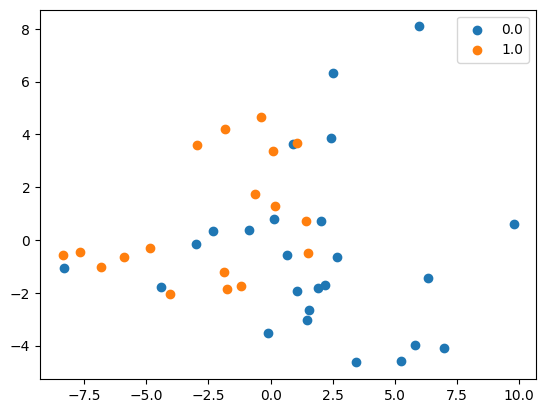

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
if __name__ == "__main__":

  X = df[['D','P','H']].to_numpy()
  Y = df.Solubility.to_numpy()

  lda = LinearDiscriminantAnalysis(n_components=1)
  X_r2 = lda.fit(X, Y).transform(X)

  for label in set(Y):
    X_class = new_X[Y == label]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=label)

  plt.legend()

Document of Kernel Ridge Regression : https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf

#### Bài tập tìm một data rồi sau đó train và đáng giá bằng các algorithms regression vừa học trên

Bulid model predict price car by algorithms

1. ##### Data Preprocessing

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/toramky/automobile-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phctuynl
Your Kaggle Key: ··········


100%|██████████| 4.87k/4.87k [00:00<00:00, 6.46MB/s]

In [ ]:
import pandas as pd

data = pd.read_csv('automobile-dataset/Automobile_data.csv')

In [ ]:
data.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [ ]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])
print('\nFeatures :\n     :',data.columns.tolist())
print('\nMissing values    :',data.isnull().values.sum())
print('\nUnique values :  \n',data.nunique())

Rows     : 205
Columns  : 26

Features :
     : ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing values    : 0

Unique values :  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60


In [ ]:
total = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys =['Total','Percent'], sort = False).sort_values('Total', ascending = False)
missing_data.head(40)

Total  Percent
symboling              0      0.0
normalized-losses      0      0.0
make                   0      0.0
fuel-type              0      0.0
aspiration             0      0.0
num-of-doors           0      0.0
body-style             0      0.0
drive-wheels           0      0.0
engine-location        0      0.0
wheel-base             0      0.0
length                 0      0.0
width                  0      0.0
height                 0      0.0
curb-weight            0      0.0
engine-type            0      0.0
num-of-cylinders       0      0.0
engine-size            0      0.0
fuel-system            0      0.0
bore                   0      0.0
stroke                 0      0.0
compression-ratio      0      0.0
horsepower             0      0.0
peak-rpm               0      0.0
city-mpg               0      0.0
highway-mpg            0      0.0
price                  0      0.0

In [ ]:
# data.info

##### Handling Missing Value

Loại bỏ các symbol

In [ ]:
a = data[data['normalized-losses']!= '?']
b = (a['normalized-losses'].astype(int)).mean()
data['normalized-losses']=data['normalized-losses'].replace('?',b).astype(int)

In [ ]:
a=data[data['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

Hầu hết các xe sedan đều có 4 cửa nên 2 ? sẽ được thay bằng 4

In [ ]:
a=data['num-of-doors'].map({'two':2,'four':4,'?':4})
data['num-of-doors']=a

In [ ]:
columns = data.columns


In [ ]:
a = data.copy()
print(len(a))
for i in columns:
  for j in range(len(a)):
    if a[i][j] == '?':
      print(i)

205
bore
bore
bore
bore
stroke
stroke
stroke
stroke
horsepower
horsepower
peak-rpm
peak-rpm
price
price
price
price


In [ ]:
a = data[data['price']!= '?']
b = (a['price'].astype(int)).mean()
data['price'] = data['price'].replace('?',b).astype(int)

a=data[data['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
data['stroke']=data['stroke'].replace('?',b).astype(float)

a = data[data['horsepower']!= '?']
b = (a['horsepower'].astype(int)).mean()
data['horsepower'] = data['horsepower'].replace('?',b).astype(int)

a = data[data['price']!= '?']
b = (a['price'].astype(int)).mean()
data['price'] = data['price'].replace('?',b).astype(int)

a=data[data['bore']!='?']
b=(a['bore'].astype(float)).mean()
data['bore']=data['bore'].replace('?',b).astype(float)

a=data[data['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
data['peak-rpm']=data['peak-rpm'].replace('?',b).astype(float)

In [ ]:
a=data['num-of-cylinders'].map({'four':4,'five':5,'six':6,'?':4})
data['num-of-doors']=a

In [ ]:
data.head(10)

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   
5          2                122         audi       gas        std   
6          1                158         audi       gas        std   
7          1                122         audi       gas        std   
8          1                158         audi       gas      turbo   
9          0                122         audi       gas      turbo   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           4.0  convertible          rwd           front        88.6  ...   
1           4.0  convertible          rwd           front        88.6  ...   
2           6.0    hatchback          rwd           front        94.5  ...   
3           4.0        sedan          fwd           front        99.8  ...   
4           5.0        sedan          4wd           front        99.4  ...   
5           5.0        sedan          fwd           front        99.8  ...   
6           5.0        sedan          fwd           front       105.8  ...   
7           5.0        wagon          fwd           front       105.8  ...   
8           5.0        sedan          fwd           front       105.8  ...   
9           5.0    hatchback          4wd           front        99.5  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   
5          136         mpfi  3.19    3.40               8.5        110   
6          136         mpfi  3.19    3.40               8.5        110   
7          136         mpfi  3.19    3.40               8.5        110   
8          131         mpfi  3.13    3.40               8.3        140   
9          131         mpfi  3.13    3.40               7.0        160   

   peak-rpm city-mpg  highway-mpg  price  
0    5000.0       21           27  13495  
1    5000.0       21           27  16500  
2    5000.0       19           26  16500  
3    5500.0       24           30  13950  
4    5500.0       18           22  17450  
5    5500.0       19           25  15250  
6    5500.0       19           25  17710  
7    5500.0       19           25  18920  
8    5500.0       17           20  23875  
9    5500.0       16           22  13207  

[10 rows x 26 columns]

In [ ]:
data.describe().T

count          mean          std      min      25%  \
symboling          205.0      0.834146     1.245307    -2.00     0.00   
normalized-losses  205.0    122.000000    31.681008    65.00   101.00   
num-of-doors       194.0      4.304124     0.679289     4.00     4.00   
wheel-base         205.0     98.756585     6.021776    86.60    94.50   
length             205.0    174.049268    12.337289   141.10   166.30   
width              205.0     65.907805     2.145204    60.30    64.10   
height             205.0     53.724878     2.443522    47.80    52.00   
curb-weight        205.0   2555.565854   520.680204  1488.00  2145.00   
engine-size        205.0    126.907317    41.642693    61.00    97.00   
bore               205.0      3.329751     0.270844     2.54     3.15   
stroke             205.0      3.255423     0.313597     2.07     3.11   
compression-ratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower         205.0    104.253659    39.519219    48.00    70.00   
peak-rpm           205.0   5125.369458   476.979093  4150.00  4800.00   
city-mpg           205.0     25.219512     6.542142    13.00    19.00   
highway-mpg        205.0     30.751220     6.886443    16.00    25.00   
price              205.0  13207.126829  7868.768212  5118.00  7788.00   

                        50%       75%       max  
symboling              1.00      2.00      3.00  
normalized-losses    122.00    137.00    256.00  
num-of-doors           4.00      4.00      6.00  
wheel-base            97.00    102.40    120.90  
length               173.20    183.10    208.10  
width                 65.50     66.90     72.30  
height                54.10     55.50     59.80  
curb-weight         2414.00   2935.00   4066.00  
engine-size          120.00    141.00    326.00  
bore                   3.31      3.58      3.94  
stroke                 3.29      3.41      4.17  
compression-ratio      9.00      9.40     23.00  
horsepower            95.00    116.00    288.00  
peak-rpm            5200.00   5500.00   6600.00  
city-mpg              24.00     30.00     49.00  
highway-mpg           30.00     34.00     54.00  
price              10595.00  16500.00  45400.00

##### Exploratory Data Analysis

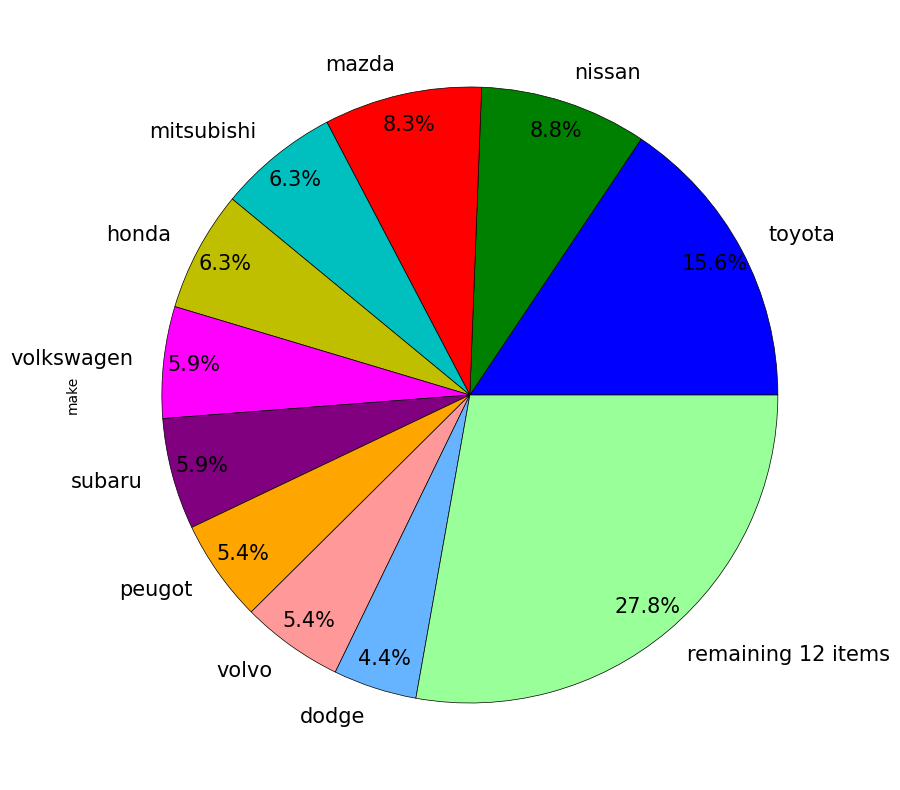

In [ ]:
colors = ['b','g','r','c','y','magenta','purple','orange','#ff9999','#66b3ff','#99ff99']
temp = data['make'].value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
   temp2['remaining {0} items'.format(len(temp)-10)] = sum(temp[10:])
temp2.plot(kind='pie',autopct="%1.1f%%",shadow=False,fontsize=15,pctdistance=0.9,colors=colors,wedgeprops={"edgecolor":"0","linewidth":0.5,"linestyle":"solid","antialiased":True},figsize=(15,10))

pass

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/code/binuthomasphilip/car-price-prediction-in-era-of-tesla-5#3.Exploratory-Data-Analysis

sử dụng heat map để chọn các feature quan trọng

<ipython-input-19-f962fa1db83f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='summer');


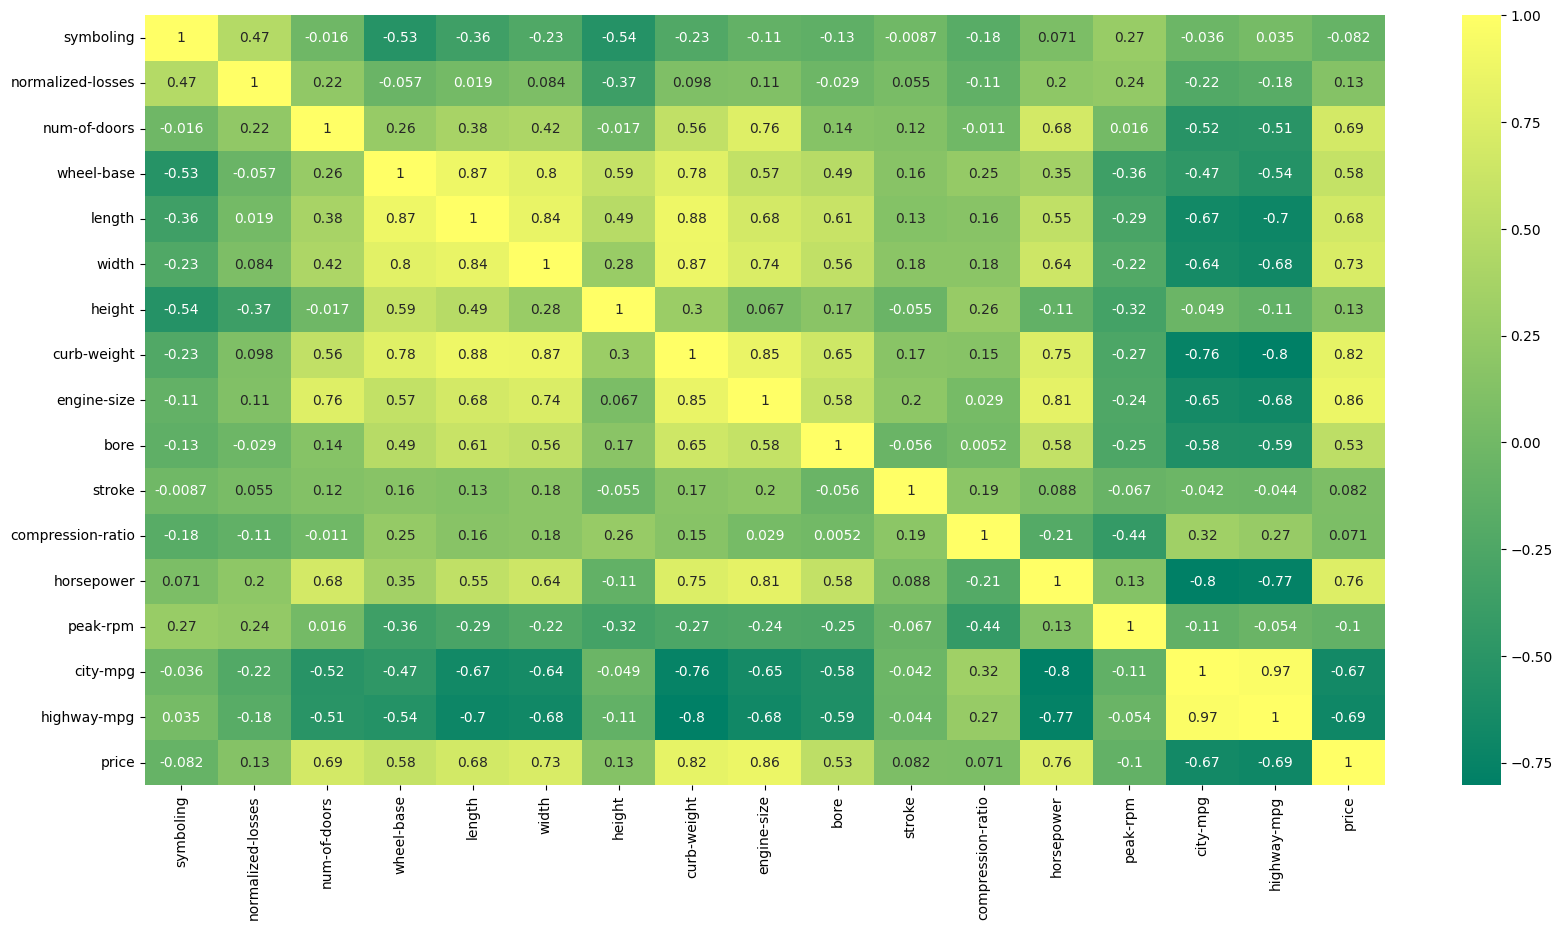

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='summer');

Biểu đồ heat map sử dụng hệ số tương quan : https://phamdinhkhanh.github.io/2019/09/16/VisualizationPython.html

Từ heat map ta thấy được features Width,Curb Weight,Engine Size and Horsepower có hệ số tương quan gần với price

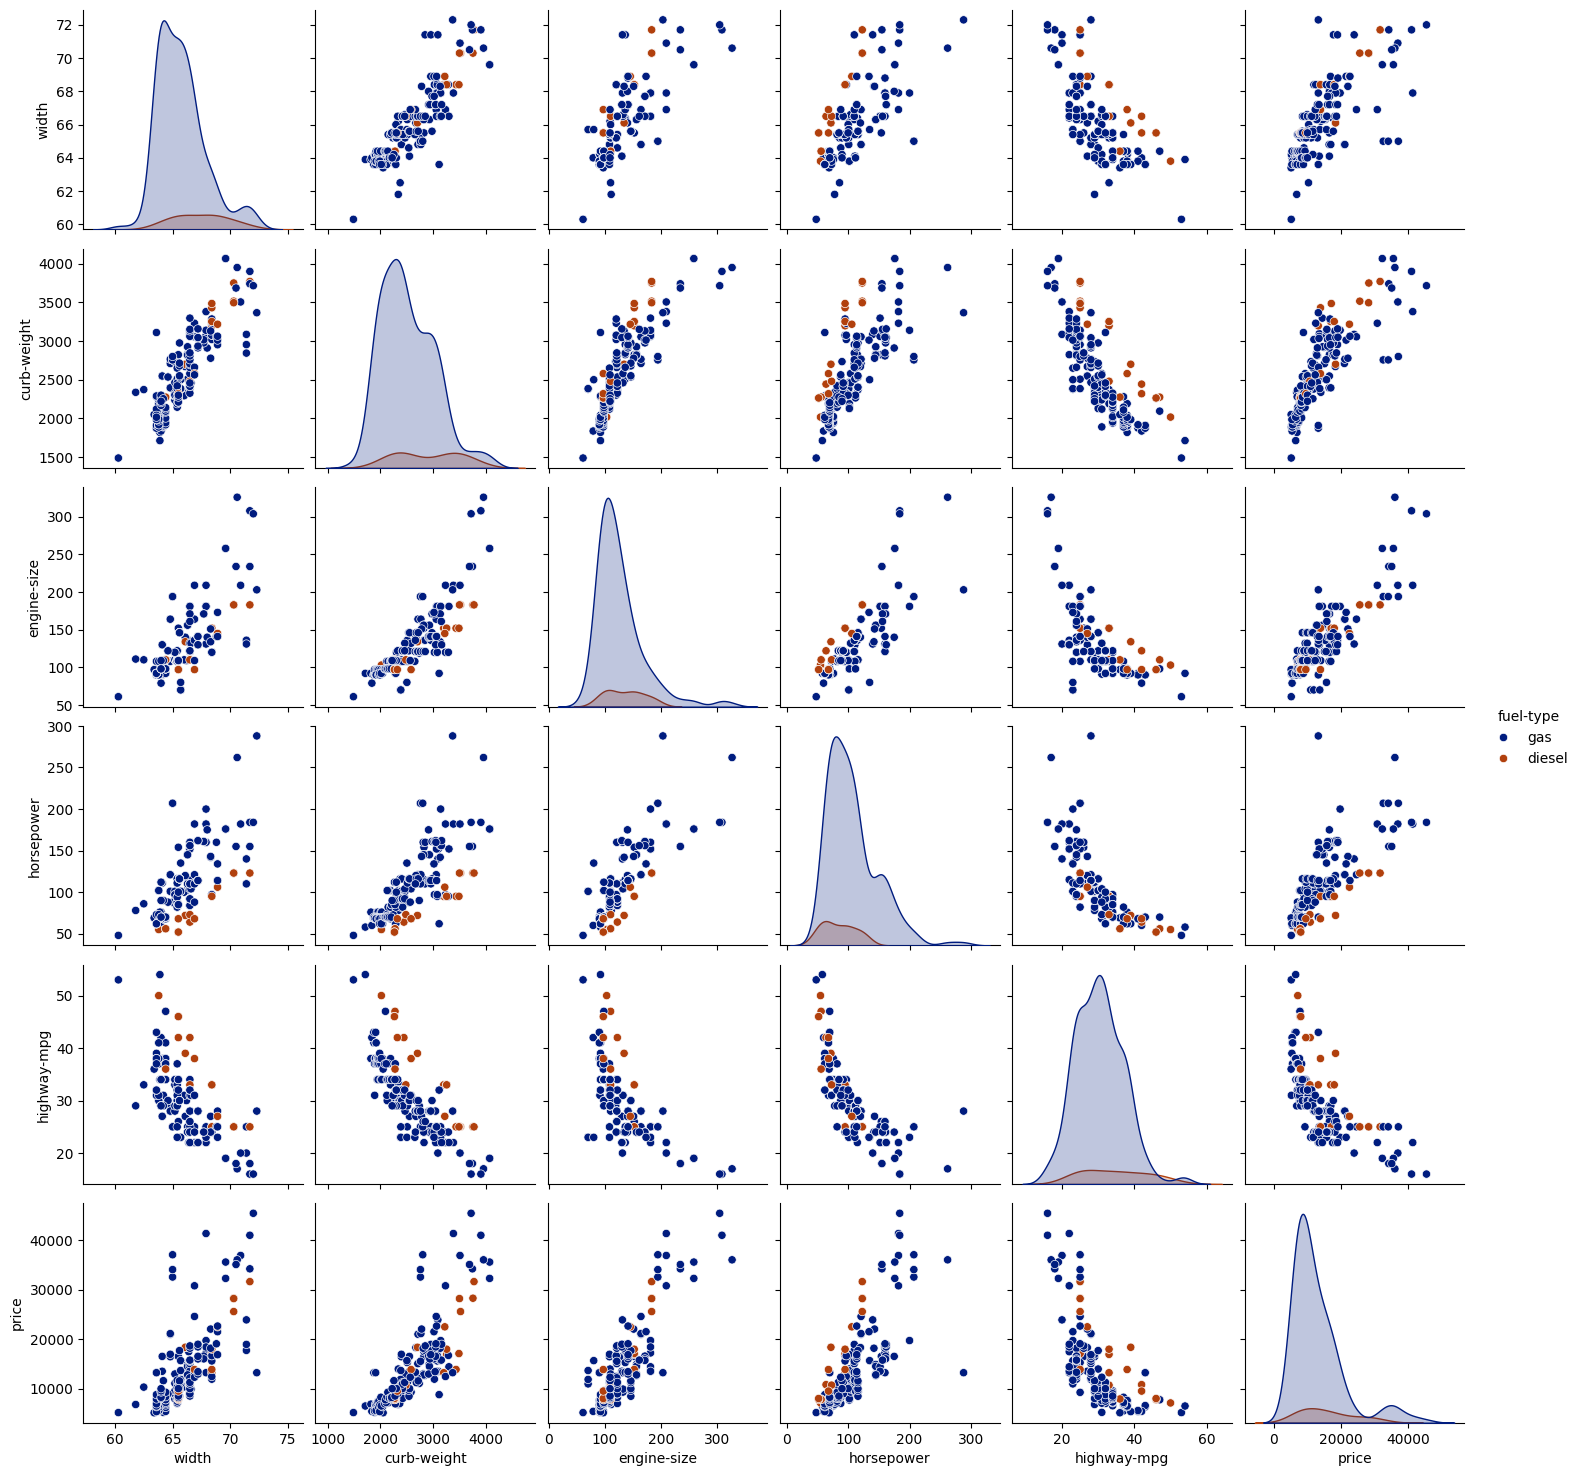

In [ ]:
ax = sns.pairplot(data[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price",]], hue="fuel-type",palette='dark') #diag_kind="hist"

qua biểu đồ ta thấy các feature có sự tương quan rõ rệt với giá bán, ở width và curb weight hầu như nó tuyển tính

##### Buil Model

Ở đây chúng ta sử dụng các model ở trên ta tìm hiểu để training chúng

Đầu tiên sẽ là linearn regression là một thuật toán được dụng rộng rãi

Giữ lại các feature quan trọng đã tìm được ở trên

In [ ]:
X=data.iloc[:,[11,13,16,21]].values
y=data.iloc[:,-1].values

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
for i in range(X.shape[1]):
  print(i)

0
1
2
3


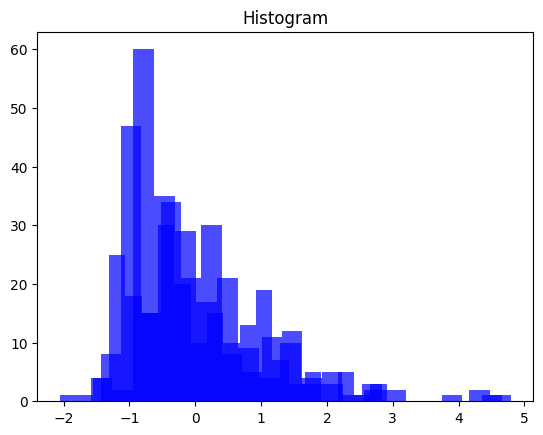

In [ ]:
plt.hist(X_scaled[:,1], bins=20, color='blue', alpha=0.7)
plt.title('Histogram')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 10)

print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))


Training Set: 184
Test Set: 21
Training labels: 184
Test labels: 21


In [ ]:
from sklearn.linear_model import LinearRegression
lgr = LinearRegression()
lgr.fit(X_train,y_train)
prediction1 = lr.predict(X_test)
prediction1

# print('Accuracy for Linear Regression is ',metrics.accuracy_score(prediction1,y_test))

array([14292.5639803 , 18096.27518106, 11097.1397795 ,  7108.33901433,
       46305.06489414, 12112.19739756,  5836.21517713, 15965.75382711,
        7159.59725504, 17798.27513187, 14874.21007395, 12458.04398092,
        8005.46529733, 17868.07293858, 35501.42815719, 22337.15886052,
       12090.9486462 , 17670.03457586, 12988.01254387, 18598.73943004,
        6717.43593193])

In [ ]:
y_pred = lgr.predict(X_test)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of the model:',rmse)

print("Coefficients : ", lgr.coef_)
print("Mean square error : ", mean_squared_error(y_test,y_pred))
print('R score : ', r2_score(y_test,y_pred))
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))

RMSE of the model: 6215.106661342069
Coefficients :  [615.11351155   0.84995005 103.3251759   52.15529849]
Mean square error :  38627550.81185856
R score :  0.0934079004201881
Mean absolute error :  3707.1991573497617


In [ ]:
y_pred

array([14292.5639803 , 18096.27518106, 11097.1397795 ,  7108.33901433,
       46305.06489414, 12112.19739756,  5836.21517713, 15965.75382711,
        7159.59725504, 17798.27513187, 14874.21007395, 12458.04398092,
        8005.46529733, 17868.07293858, 35501.42815719, 22337.15886052,
       12090.9486462 , 17670.03457586, 12988.01254387, 18598.73943004,
        6717.43593193])

In [ ]:
y_test

array([ 9895, 18150, 10795, 11845, 36000,  8495,  6295, 11549,  8058,
       22470, 15250,  8948,  7788, 17075, 13207, 13499, 10595, 17950,
       16500, 16500,  7295])

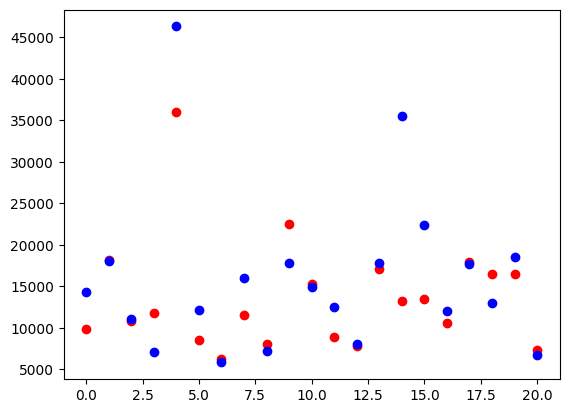

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='red', label='y_true')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='y_pred')

Sử dụng Ridge regression

In [ ]:
ridge = linear_model.Ridge(alpha = 0.01, fit_intercept = False)
ridge.fit(X_train,y_train)
y_pred1 = ridge.predict(X_test)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of the model:',rmse)

print("Coefficients : ", ridge.coef_)
print("Mean square error : ", mean_squared_error(y_test,y_pred1))
print('R score : ', r2_score(y_test,y_pred))
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred1))


RMSE of the model: 5672.634523372392
Coefficients :  [-220.49806163    3.7124934   106.69524234   47.33335989]
Mean square error :  32178782.435756333
R score :  0.24476107552233783
Mean absolute error :  3545.273095435144


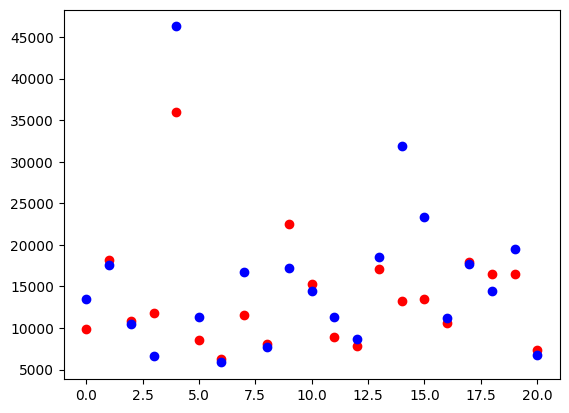

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='red', label='y_true')
plt.scatter(range(len(y_pred1)), y_pred, color='blue', label='y_pred')

In [ ]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha= 00.01).fit(X_train,y_train)
lasso.fit(X_train, y_train)
y_pred2 = lasso.predict(X_test)

print('RMSE of the model:',rmse)
print("Mean square error : ", mean_squared_error(y_test,y_pred2))
print('R score : ', r2_score(y_test,y_pred2))
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred2))

RMSE of the model: 6074.906477446116
Mean square error :  38627458.76188395
R score :  0.09341006084138981
Mean absolute error :  3707.196661417245


In [ ]:
from sklearn import linear_model

lgr = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
lgr.fit(X_train,y_train)
y_pred3 = lgr.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test,y_pred3))
print('RMSE of the model:',rmse)
print("Mean square error : ", mean_squared_error(y_test,y_pred3))
print('R score : ', r2_score(y_test,y_pred3))
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred3))

RMSE of the model: 6074.906477446116
Mean square error :  36904488.709716775
R score :  0.13384832328043217
Mean absolute error :  3660.2536329211157


## Kernel Ridge Regression

Refer : Machine Learning
 A Probabilistic Perspective
 Kevin P. Murphy
  

In [ ]:
import numpy as np
rng = np.random.RandomState(42)

In [ ]:
X = 5*rng.rand(10000,1)
y = np.sin(X).ravel()

In [ ]:
y[::5] += 3*(0.5 - rng.rand(X.shape[0]//5))

X_plot = np.linspace(0,5,100000)[:,None]


In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
train_size = 100

svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

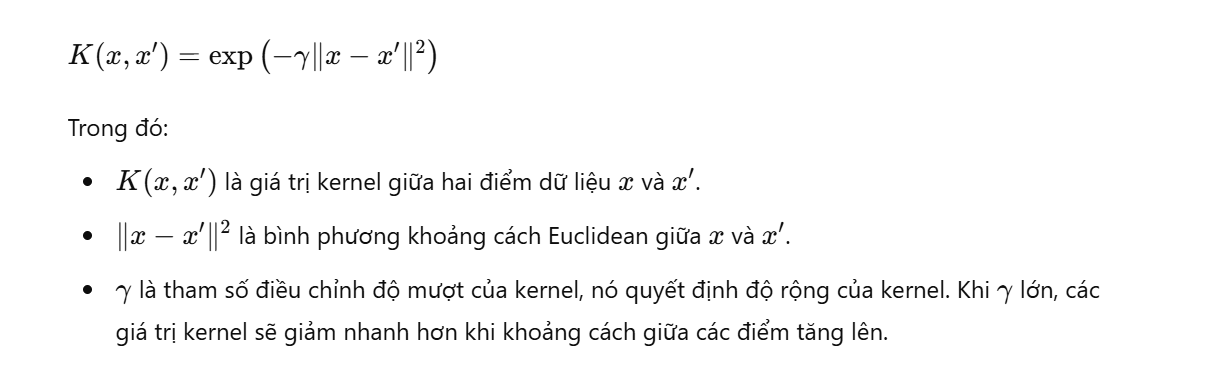

 Tham số
𝐶
C trong SVR điều chỉnh mức độ phạt cho các điểm dữ liệu bị phân loại sai (hoặc có dự đoán sai lệch).


. Tham số
𝛼
α trong KernelRidge điều chỉnh độ phạt cho các độ lệch trong quá trình khớp dữ liệu (tương tự như
𝜆
λ trong Ridge Regression).

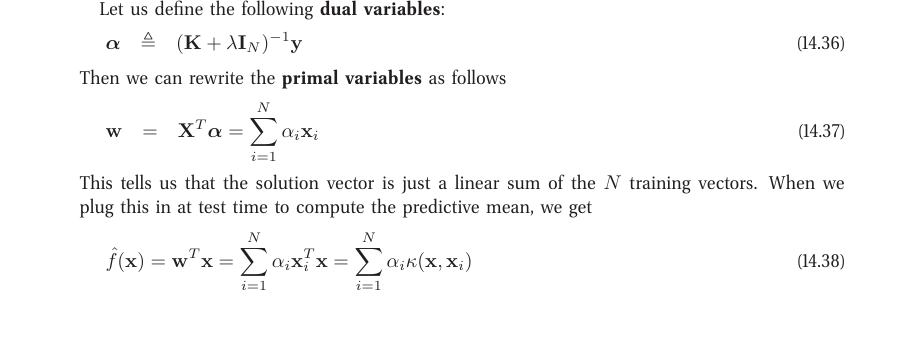

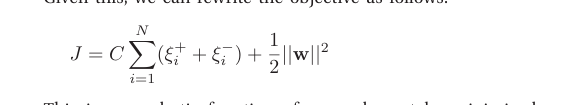

In [ ]:
import time

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s" % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s" % (X_plot.shape[0], kr_predict))

Best SVR with params: {'C': 10.0, 'gamma': 0.1} and R2 score: 0.704
SVR complexity and bandwidth selected and model fitted in 1.259 s
Best KRR with params: {'alpha': 0.1, 'gamma': 0.1} and R2 score: 0.692
KRR complexity and bandwidth selected and model fitted in 0.495 s
Support vector ratio: 0.380
SVR prediction for 100000 inputs in 0.376 s
KRR prediction for 100000 inputs in 0.653 s


In [ ]:
svr.best_estimator_

SVR(C=10.0, gamma=0.1)

In [ ]:
sv_ind = svr.best_estimator_.support_

sv_ind

array([ 0,  2,  5,  8, 10, 15, 19, 20, 24, 25, 26, 28, 30, 31, 35, 37, 40,
       44, 45, 49, 50, 51, 52, 53, 55, 57, 60, 65, 70, 75, 78, 80, 85, 89,
       90, 94, 95, 97], dtype=int32)

support_ là một thuộc tính của SVR chứa các chỉ số của các vector hỗ trợ trong tập huấn luyện. Vector hỗ trợ là những điểm dữ liệu nằm gần đường biên và đóng vai trò quyết định trong việc xác định mô hình hồi quy.


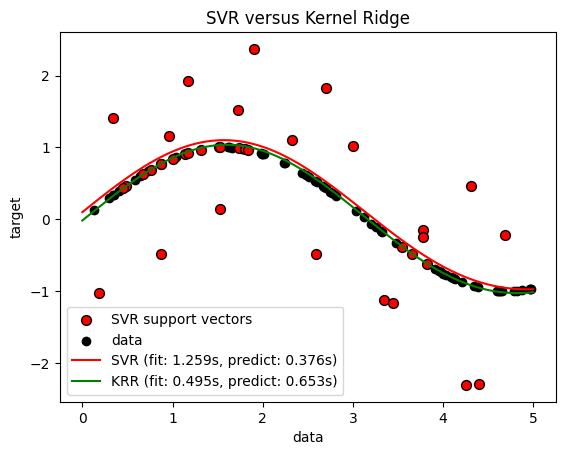

In [ ]:
import matplotlib.pyplot as plt

sv_ind = svr.best_estimator_.support_
plt.scatter(
    X[sv_ind],
    y[sv_ind],
    c="r",
    s=50,
    label="SVR support vectors",
    zorder=2,
    edgecolors=(0, 0, 0),
)
plt.scatter(X[:100], y[:100], c="k", label="data", zorder=1, edgecolors=(0, 0, 0))
plt.plot(
    X_plot,
    y_svr,
    c="r",
    label="SVR (fit: %.3fs, predict: %.3fs)" % (svr_fit, svr_predict),
)
plt.plot(
    X_plot, y_kr, c="g", label="KRR (fit: %.3fs, predict: %.3fs)" % (kr_fit, kr_predict)
)
plt.xlabel("data")
plt.ylabel("target")
plt.title("SVR versus Kernel Ridge")
_ = plt.legend()

Hình trước so sánh mô hình đã học của KRR và SVR khi cả hai độ phức tạp / chính quy hóa và băng thông của nhân RBF được tối ưu hóa bằng cách sử dụng tìm kiếm lưới. Các chức năng học được rất giống nhau; tuy nhiên, phù hợp với KRR là nhanh hơn khoảng 3-4 lần so với lắp SVR (cả hai đều có tìm kiếm lưới).

Dự đoán 100000 giá trị mục tiêu về lý thuyết có thể xấp xỉ ba nhanh hơn nhiều lần với SVR vì nó đã học được một mô hình thưa thớt chỉ sử dụng Khoảng 1/3 số điểm dữ liệu đào tạo làm vectơ hỗ trợ. Tuy nhiên, trong Thực tế, điều này không nhất thiết phải như vậy vì chi tiết thực hiện theo cách tính toán hàm kernel cho từng mô hình có thể tạo ra Mô hình KRR nhanh hoặc thậm chí nhanh hơn mặc dù tính toán nhiều số học hơn Hoạt động.

## Support Vector Machine  

### Hard Margin

khái niệm và tối ưu được định nghĩa : https://machinelearningcoban.com/2017/04/09/smv/

### Soft Margin

Vì soft Margin tối ưu Hard Margin nên phần code sẽ thực hiện là code đó
sourse : https://machinelearningcoban.com/2017/04/13/softmarginsmv/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(21)
from matplotlib.backends.backend_pdf import PdfPages


means = [[2,2],[4,1]]
cov = [[0.3,0.2],[0.2,0.3]]

N = 10
X0 = np.random.multivariate_normal(means[0],cov,N)
X1 = np.random.multivariate_normal(means[1],cov,N)
X1[-1, :] = [2.7, 2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

[]

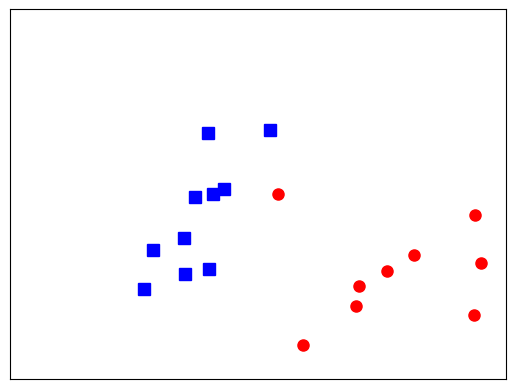

In [ ]:
  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
  plt.axis('equal')
  plt.ylim(0, 4)
  plt.xlim(0, 5)

  # hide tikcs
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])

In [ ]:
X = np.vstack((X0, X1))
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))

In [ ]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
from sklearn.svm import SVC
C = 100
clf = SVC(kernel = 'linear', C = C)
clf.fit(X, y)

w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]

#### By dual problems

HARD MARgin

In [ ]:

from cvxopt import matrix, solvers
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V))  #

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h
G = matrix(np.vstack((-np.eye(2*N), np.eye(2*N))))

h = np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1))))
h = matrix(np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1)))))
A = matrix(y.reshape((-1, 2*N)))
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

lambda = 
 [[1.26997770e-08 7.29907090e-09 6.75263620e+00 1.20067067e-08
  8.83482181e-09 1.00135373e-08 9.49241066e-09 1.10095260e-08
  1.09448265e-08 1.15277180e+01 3.06483278e-09 2.92217775e-09
  3.52341246e-09 5.49363383e-09 4.48478627e-09 7.55953464e-09
  2.73325320e-09 5.71296652e-09 5.02756847e-09 1.82803543e+01]]


In [ ]:
S = np.where(l > 1e-5)[0]
S2 = np.where(l < .99*C)[0]

M = [val for val in S if val in S2] # intersection of two lists

In [ ]:
XT = X.T # we need each col is one data point in this alg
VS = V[:, S]
# XS = XT[:, S]
# yS = y[ S]
lS = l[S]
# lM = l[M]
yM = y[M]
XM = XT[:, M]
w_dual = VS.dot(lS).reshape(-1, 1)
b_dual = np.mean(yM.T - w_dual.T.dot(XM))

#### Hinge loss


In [ ]:
X0_bar = np.vstack((X0.T, np.ones((1, N)))) # extended data
X1_bar = np.vstack((X1.T, np.ones((1, N)))) # extended data

Z = np.hstack((X0_bar, - X1_bar)) # as in (22)
lam = 1./C

def cost(w):
    u = w.T.dot(Z) # as in (23)
    return (np.sum(np.maximum(0, 1 - u)) + \
            .5*lam*np.sum(w*w)) - .5*lam*w[-1]*w[-1]

def grad(w):
    u = w.T.dot(Z) # as in (23)
    H = np.where(u < 1)[1]
    ZS = Z[:, H]
    g = (-np.sum(ZS, axis = 1, keepdims = True) + lam*w)
    g[-1] -= lam*w[-1]
    return g

eps = 1e-6
def num_grad(w):
    g = np.zeros_like(w)
    for i in range(len(w)):
        wp = w.copy()
        wm = w.copy()
        wp[i] += eps
        wm[i] -= eps
        g[i] = (cost(wp) - cost(wm))/(2*eps)
    return g

w0 = np.random.randn(X0_bar.shape[0], 1)
g1 = grad(w0)
g2 = num_grad(w0)
diff = np.linalg.norm(g1 - g2)
print('Gradient difference: %f' %diff)

Gradient difference: 0.000000


In [ ]:
def grad_descent(w0, eta):
    w = w0
    it = 0
    while it < 100000:
        it = it + 1
        g = grad(w)
        w -= eta*g
        if (it % 10000) == 1:
            print('iter %d' %it + ' cost: %f' %cost(w))
        if np.linalg.norm(g) < 1e-5:
            break
    return w
w0 = np.random.randn(X0_bar.shape[0], 1)
w = grad_descent(w0, 0.001)
w_hinge = w[:-1].reshape(-1, 1)
b_hinge = w[-1]


<ipython-input-14-790f5f660f09>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('iter %d' %it + ' cost: %f' %cost(w))


iter 1 cost: 47.818294
iter 10001 cost: 1.306777
iter 20001 cost: 0.979035
iter 30001 cost: 0.670496
iter 40001 cost: 0.389639
iter 50001 cost: 0.183199
iter 60001 cost: 0.183199
iter 70001 cost: 0.183198
iter 80001 cost: 0.183198
iter 90001 cost: 0.183197


In [ ]:
def myplot(X0, X1, w, b, filename, tit):
    with PdfPages(filename) as pdf:
        fig, ax = plt.subplots()

        w0 = w[0]
        w1 = w[1]
        x1 = np.arange(-10, 10, 0.1)
        y1 = -w0/w1*x1 - b/w1
        y2 = -w0/w1*x1 - (b-1)/w1
        y3 = -w0/w1*x1 - (b+1)/w1
        plt.plot(x1, y1, 'k', linewidth = 3)
        plt.plot(x1, y2, 'k')
        plt.plot(x1, y3, 'k')

        # equal axis and lim
        plt.axis('equal')
        plt.ylim(0, 3)
        plt.xlim(2, 4)

        # hide tikcs
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        # fill two regions
        y4 = 10*x1
        plt.plot(x1, y1, 'k')
        plt.fill_between(x1, y1, color='blue', alpha=0.1) # Change alpha to a numeric value
        plt.fill_between(x1, y1, y4, color = 'red', alpha = 0.1) # Change alpha to a numeric value

        plt.xlabel('$x_1$', fontsize = 20)
        plt.ylabel('$x_2$', fontsize = 20)
        plt.title('Solution found by ' + tit, fontsize = 20)

        plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
        plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
        plt.show()


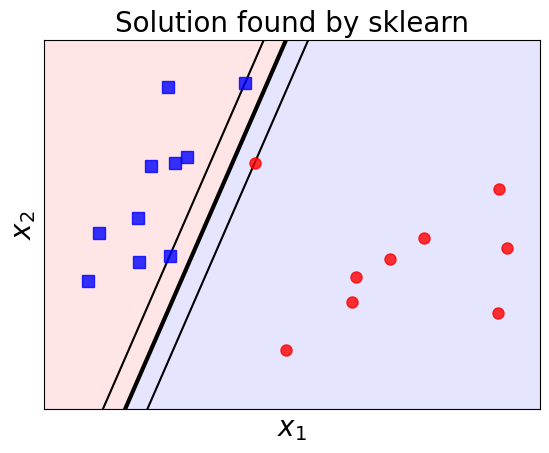

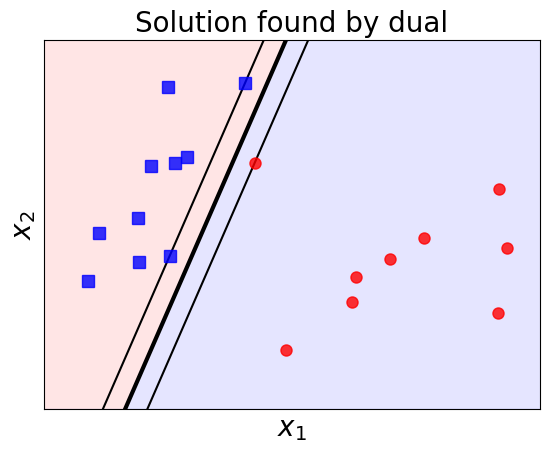

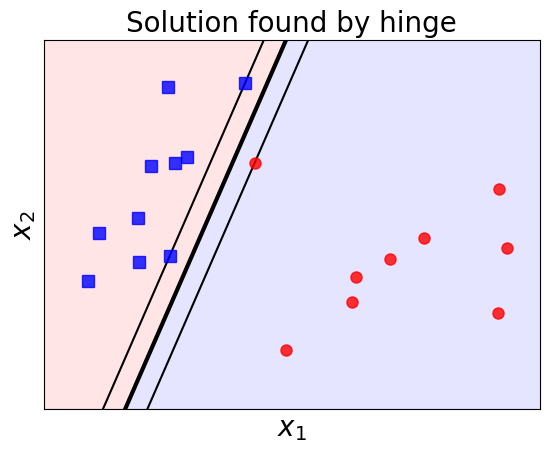

In [ ]:
myplot(X0, X1, w_sklearn, b_sklearn, 'svm_sklearn.pdf', 'sklearn')
myplot(X0, X1, w_dual, b_dual, 'svm_dual.pdf', 'dual')
myplot(X0, X1, w_hinge, b_hinge, 'svm_hinge.pdf', 'hinge')

### Kernel

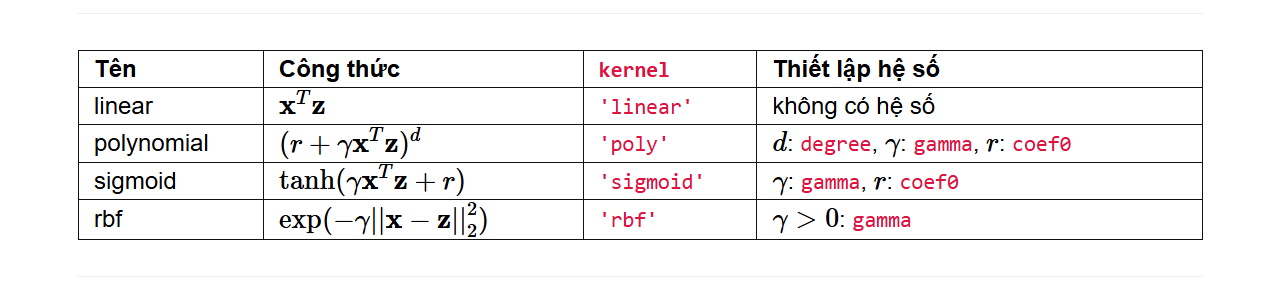

### Muliclass SVM

xem thêm tại : https://machinelearningcoban.com/2017/04/28/multiclasssmv/

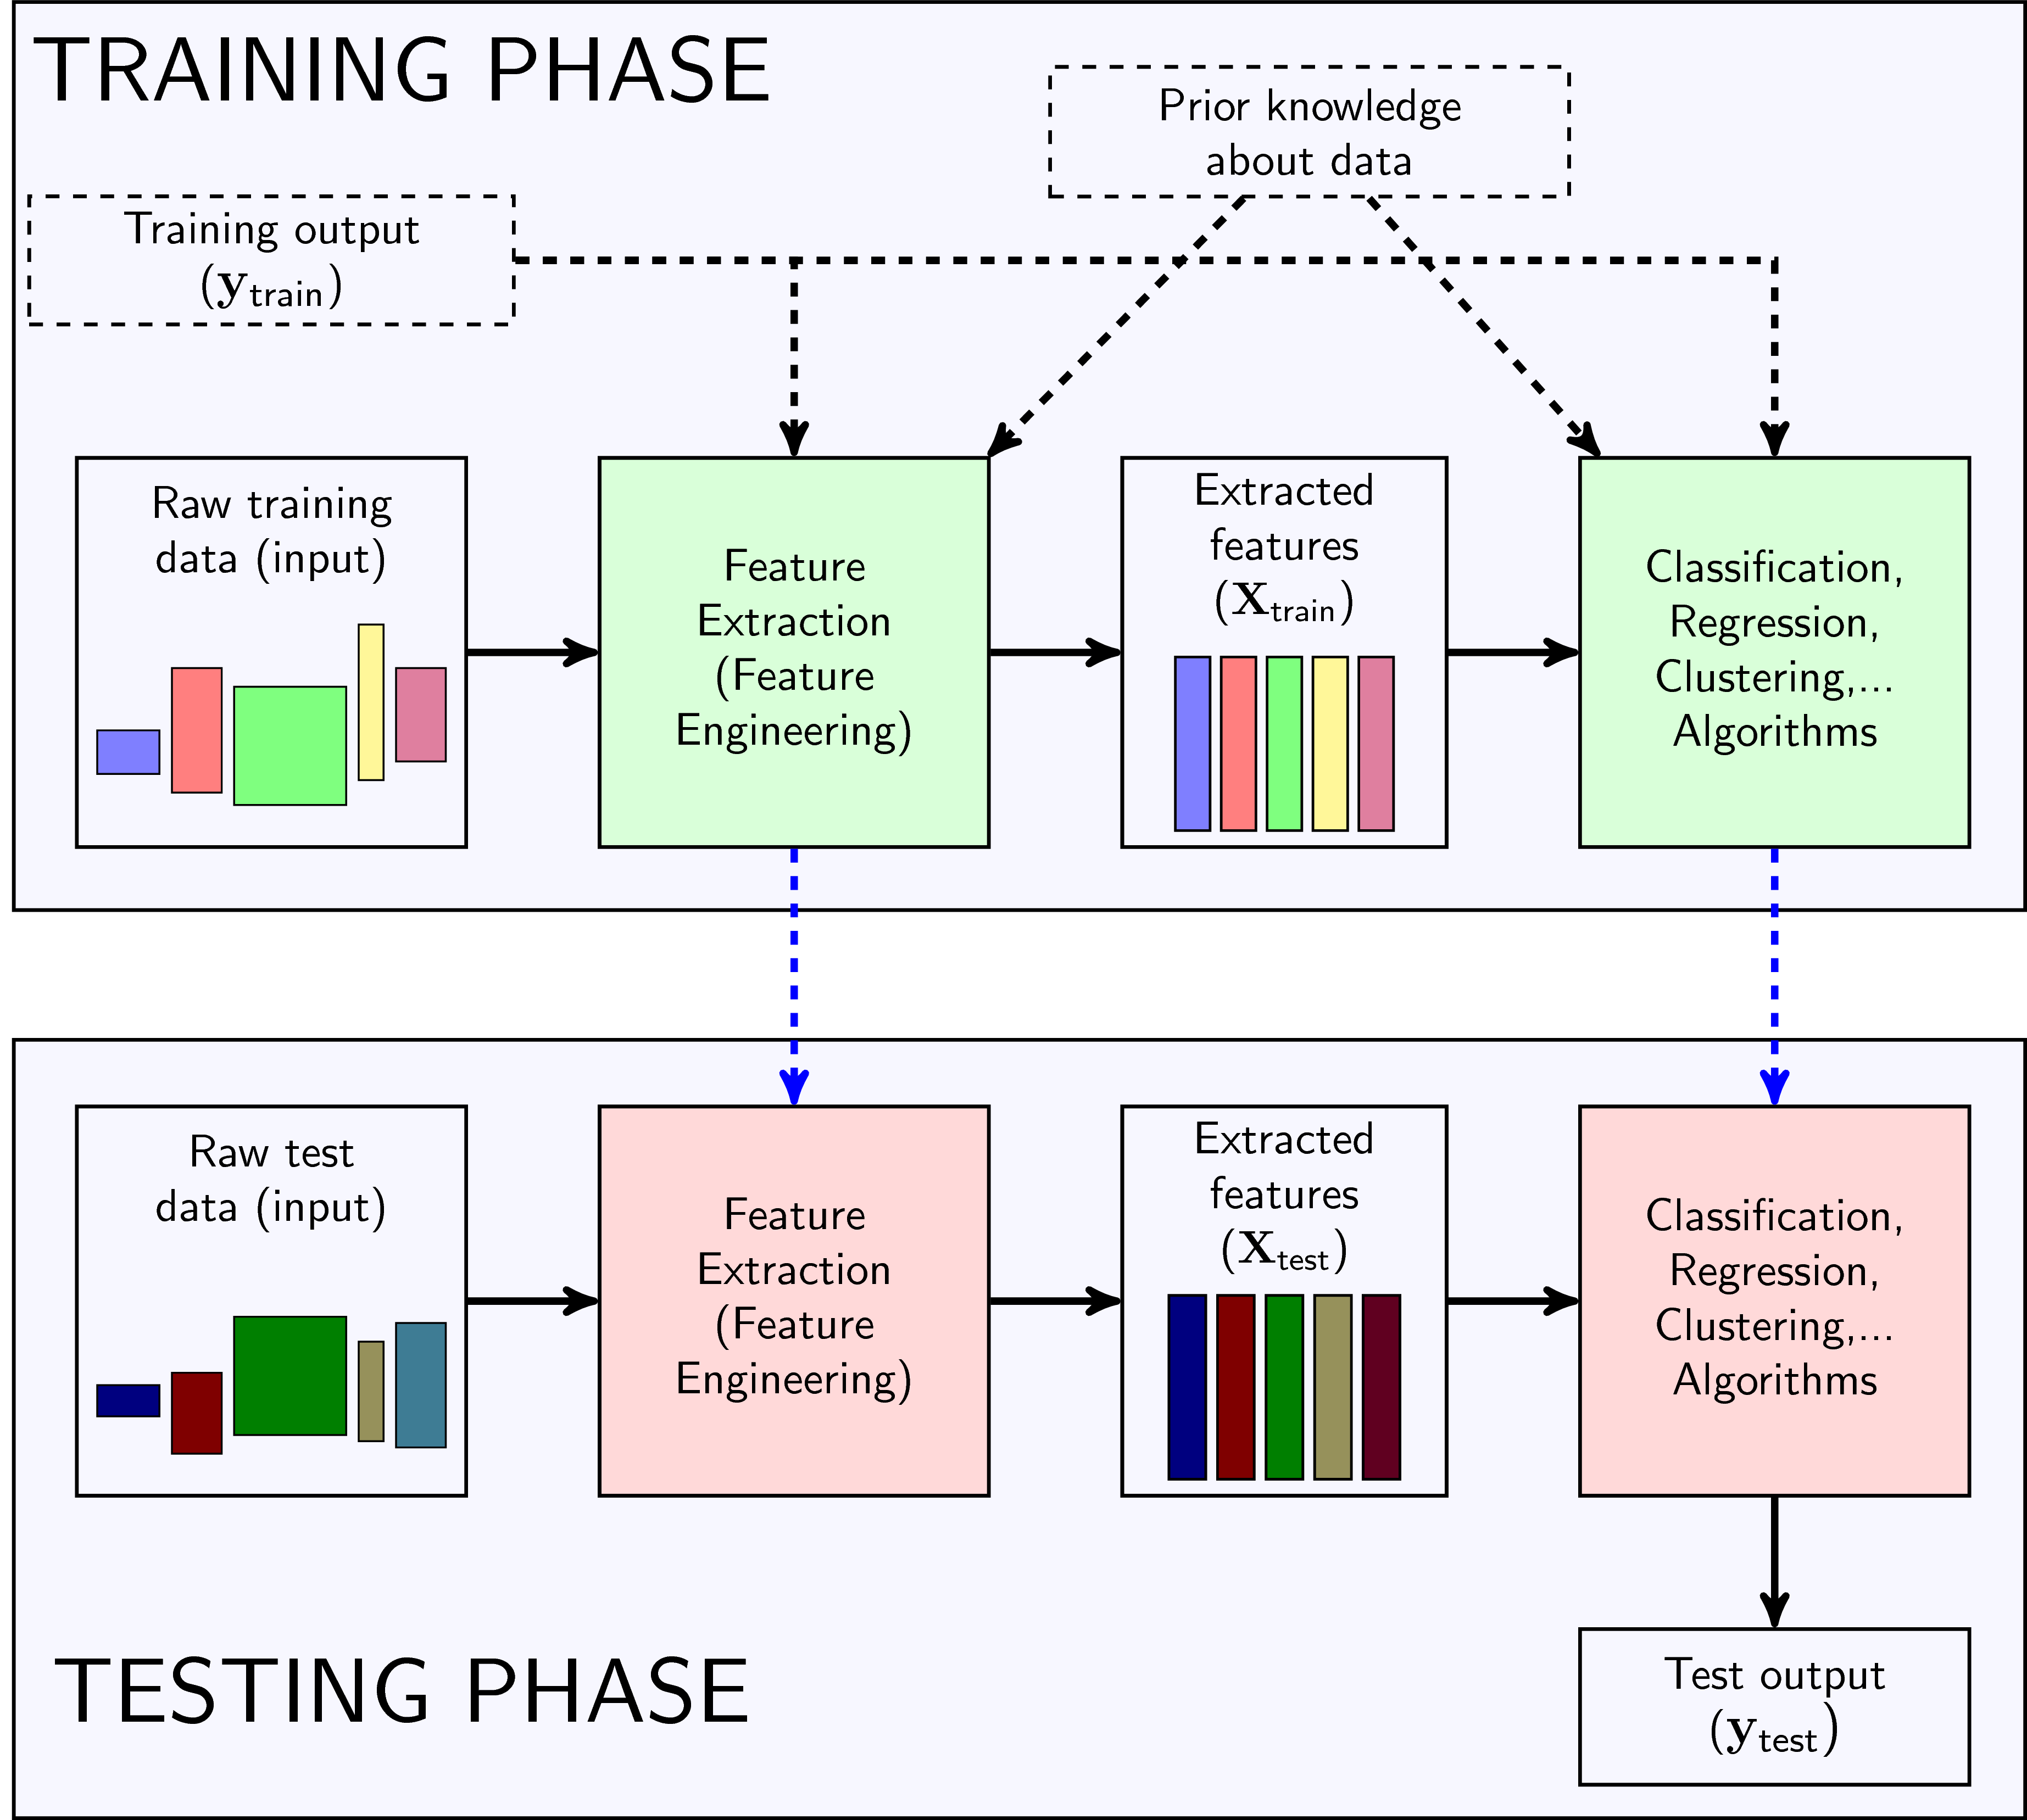

### Suport Vector Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR



In [ ]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_lin = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [ ]:
lw = 2

svrs = [svrkernel_label_rbf,svr_lin,svr_lin]
kernel_label = ['RBF','Linear','Polynomial']
model_color = ['m','c','g']


In [ ]:
print(np.arange(len(X)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
svr_rbf.support_

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 14, 15, 16, 17, 18, 19, 20,
       25, 30, 35], dtype=int32)

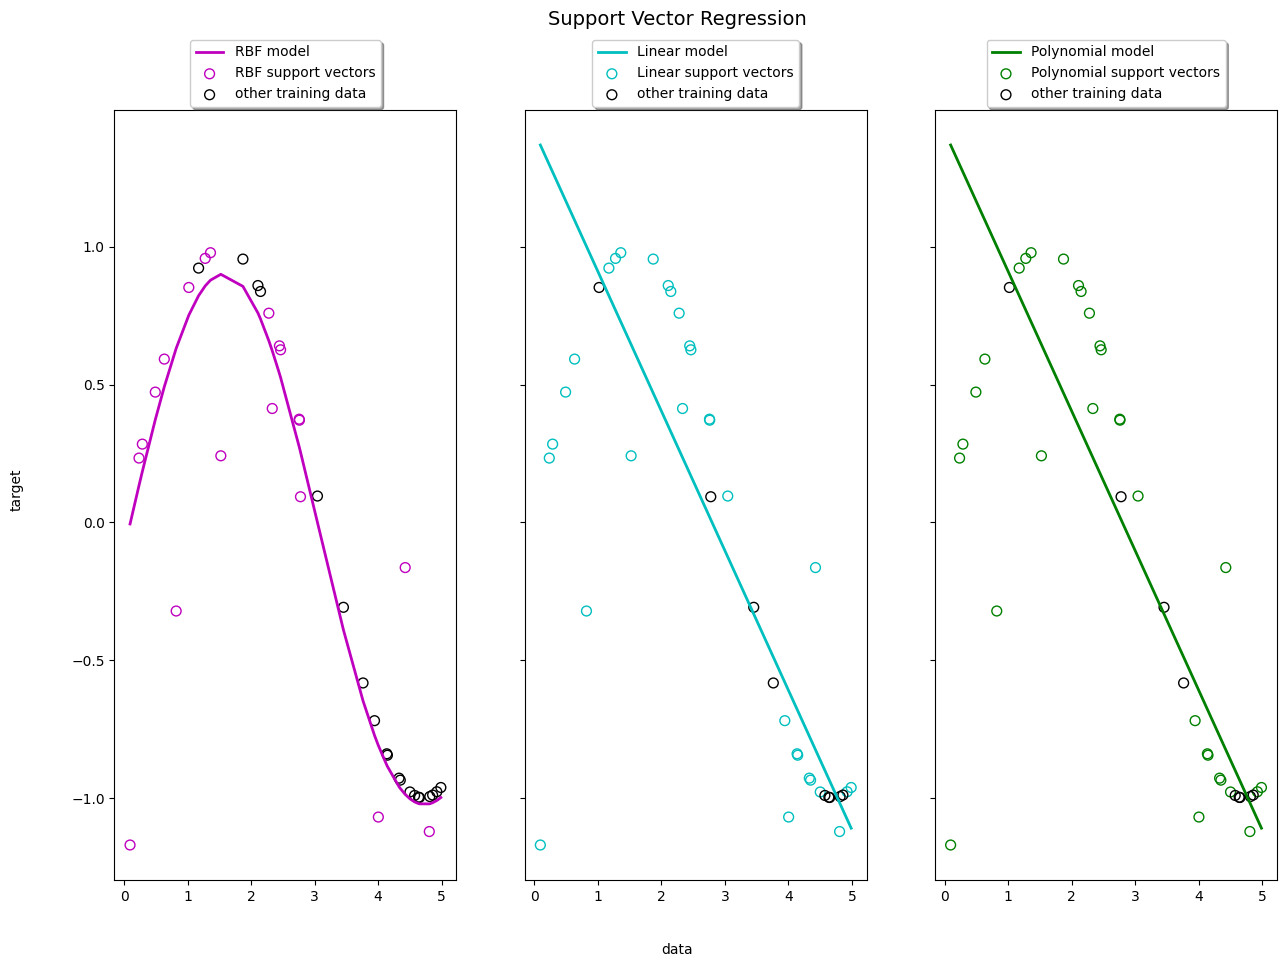

In [ ]:
fig, axes =  plt.subplots(nrows = 1, ncols = 3, figsize = (15,10),sharey = True)

for ix, svr in enumerate(svrs):
  axes[ix].plot(
      X, svr.fit(X,y).predict(X), color = model_color[ix],
      lw = lw,
      label = "{} model".format(kernel_label[ix])
  )
  axes[ix].scatter(
      X[svr.support_],
      y[svr.support_],
      facecolor="none",
      edgecolor=model_color[ix],
      s=50,
      label="{} support vectors".format(kernel_label[ix]),
  )
  axes[ix].scatter(
      X[np.setdiff1d(np.arange(len(X)), svr.support_)],
      y[np.setdiff1d(np.arange(len(X)), svr.support_)],
      facecolor="none",
      edgecolor="k",
      s=50,
      label="other training data",
  )
  axes[ix].legend(
      loc="upper center",
      bbox_to_anchor=(0.5, 1.1),
      ncol=1,
      fancybox=True,
      shadow=True,
  )


fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### SVM : Classification from scikit learn

applications : https://medium.com/@mun.articles/svms-in-practice-applications-and-use-cases-for-machine-learnings-most-effective-model-2ae25f4207ef

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


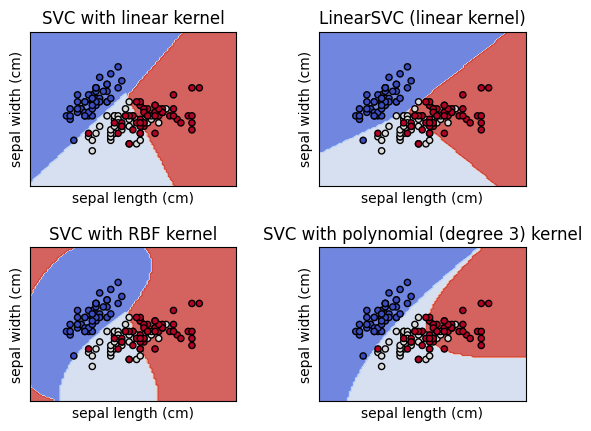

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### SGD Stochastic Gradient Descent

SGD tức là Các model (SVM) sử dụng việc tối ưu bằng phương pháp SGD

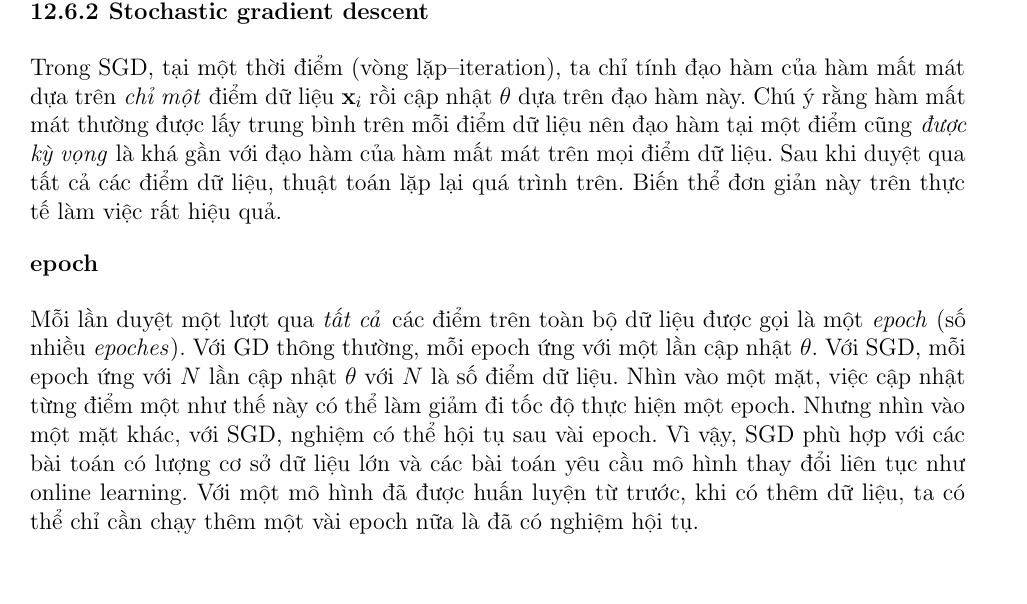

#### Classification

In [ ]:
# SVM using SGD
# clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)


#### Regression

loss="squared_error": Ordinary least squares,

loss="huber": Huber loss for robust regression,

loss="epsilon_insensitive": linear Support Vector Regression.

penalty="l2": L2 norm penalty on coef_.

penalty="l1": L1 norm penalty on coef_.

penalty="elasticnet": Convex combination of L2 and L1; (1 - l1_ratio) * L2 + l1_ratio * L1.

https://scikit-learn.org/stable/modules/sgd.html#classification

### Compare SVM no SGD with SVM SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()

In [ ]:
X = iris.data[:,:2]
Y = iris.target

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
svc = GridSearchCV(
      svm.SVC(kernel="linear"),
      param_grid = {"C": [1e0, 1e1, 1e2, 1e3]}
)

sgd = GridSearchCV(
    SGDClassifier(loss = 'hinge',alpha = 0.1,penalty='l2',max_iter=1000),
    param_grid = {"alpha": [1e0, 0.1, 1e-2, 1e-3],"penalty":["l2","l1","elasticnet"]}
)


In [ ]:
svc.fit(X,Y)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0]})

In [ ]:
print(f"Best SVR with params: {svc.best_params_} and R2 score: {svc.best_score_:.3f}")


Best SVR with params: {'C': 10.0} and R2 score: 0.813


In [ ]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X_norm = (X - mean) / std
sgd.fit(X_norm,Y)
print(f"Best SGD with SVM with params: {sgd.best_params_} and R2 score: {sgd.best_score_:.3f}")


Best SGD with SVM with params: {'alpha': 0.001, 'penalty': 'elasticnet'} and R2 score: 0.820


In [ ]:
models = (svc, sgd)

titles = ("SVC with linear","SVC with sgd")


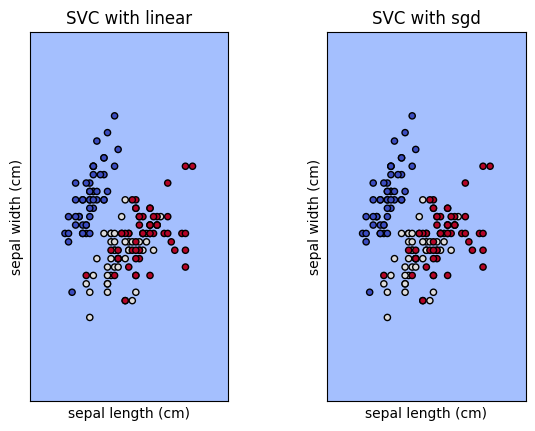

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, sub = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.5, hspace = 0.5)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Nearest Neighbors

SƠ LƯỢC SÁCH ML CƠ BẢN ANH TIỆP
CODE VÀ CÁC BIẾN THỂ : https://scikit-learn.org/dev/modules/neighbors.html

### Gaussain Process

Hiểu sâu về : [link text](https://d2l.ai/chapter_gaussian-processes/gp-priors.html#the-radial-basis-function-rbf-kernel)

Code và ứng dụng : https://scikit-learn.org/dev/modules/gaussian_process.html#

Gaussian Processes (GP) là một phương pháp học tập có giám sát không tham số được sử dụng để giải quyết các bài toán hồi quy và phân loại xác suất.

đọc thêm sách về Gaussain: https://gaussianprocess.org/gpml/chapters/RW.pdf

Hồi quy:

GPs được sử dụng rộng rãi trong các bài toán hồi quy, nơi chúng cung cấp không chỉ dự đoán mà còn các khoảng tin cậy, rất có giá trị để hiểu độ không chắc chắn của mô hình.

dưới đây là ví dụ minh hoa về điều này

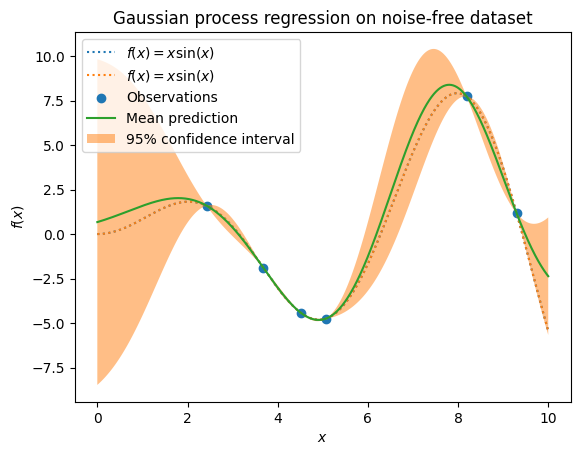

In [ ]:
import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")


In [ ]:
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

Chúng tôi tạo ra một mô hình quy trình Gaussian tương tự. Ngoài hạt nhân, điều này thời gian, chúng tôi chỉ định tham số có thể được hiểu là phương sai của tiếng ồn Gaussian.alpha

In [ ]:
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

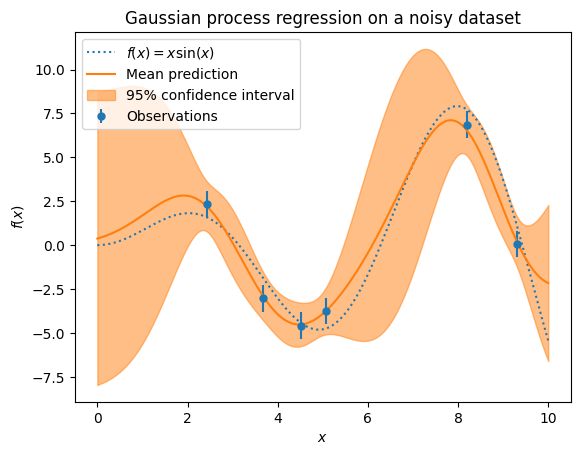

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

Gaussian Processes là một công cụ mạnh mẽ cho hồi quy, đặc biệt là khi dữ liệu có nhiễu. Mô hình không chỉ dự đoán giá trị mà còn cung cấp thông tin về độ không chắc chắn, giúp đưa ra các quyết định dựa trên các dự đoán có độ tin cậy khác nhau.

Độ không chắc chắn dự đoán gần các mẫu đào tạo lớn hơn vì chúng tôi mô hình hóa rõ ràng tiếng ồn mục tiêu mức nhất định độc lập với đầu vào biến số.

chương 3 https://gaussianprocess.org/gpml/chapters/RW.pdf

Bảng tóm tắt : [link text](https://www.overleaf.com/project/66b3b44fa852228cb98315ed)

              [link text](https://www.overleaf.com/project/66b3b797e7012f2c26bc4784)


# Classification

##### Thuật toán PLA also called Perceptron

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]
[7, 10, 0, 18, 3, 6, 14, 9, 7, 17, 0, 19, 3, 2, 12, 6, 11, 7]


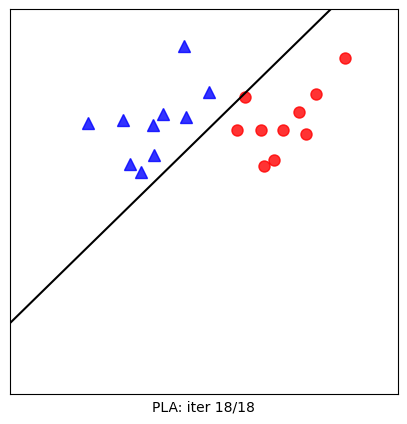

In [ ]:
# generate data
# list of points
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

print(y)

def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):

    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            print(h(w[-1], xi)[0])
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi

                w.append(w_new)

        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(m)
# print(w)
# print(len(w))

def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')


## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()

viz_alg_1d_2(w)

sortmax :
https://machinelearningcoban.com/2017/02/17/softmax/#-softmax-function

SVM (support vector machines)

function hingloss
image.png

function hingloss in svm

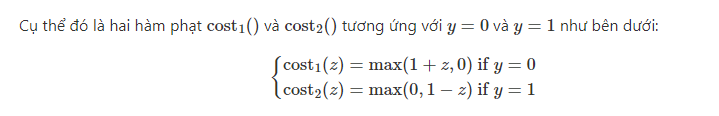

2 function cost of svm created from function hingloss

compare sigmoid and function hingloss

following code

---



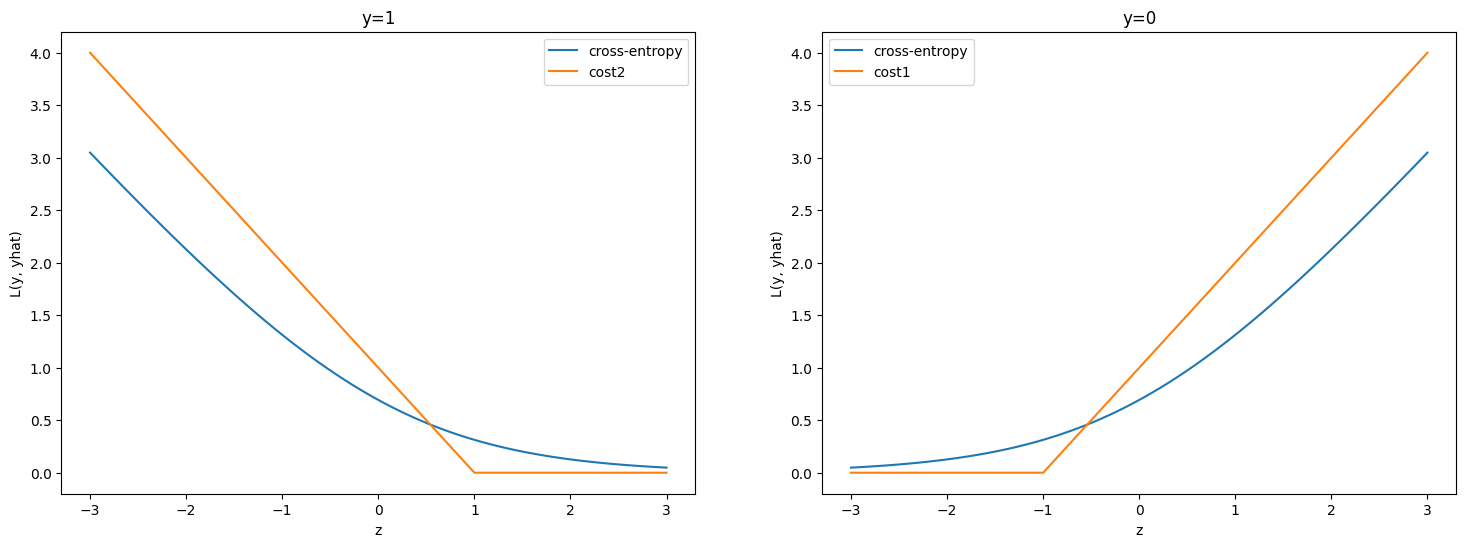

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize = (18,6))

z = np.linspace(-3,3,100)

def sigmoid(z):
  return 1/(1 + np.exp(-z))

ax[0].plot(z, -np.log(sigmoid(z)), label='cross-entropy')
ax[0].plot(z, np.maximum(0,1-z), label='cost2')
ax[0].set_xlabel('z')
ax[0].set_ylabel('L(y, yhat)')
ax[0].legend()
ax[0].set_title('y=1')

ax[1].plot(z, -np.log(1 - sigmoid(z)), label='cross-entropy')
ax[1].plot(z, np.maximum(1 + z, 0), label='cost1')
ax[1].set_xlabel('z')
ax[1].set_ylabel('L(y, yhat)')
ax[1].legend()
ax[1].set_title('y=0')

plt.show()

làm quen với hàm mất mát của logistic regression
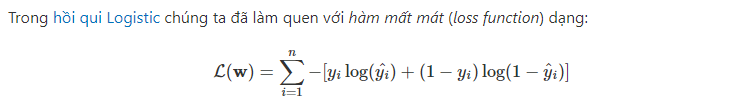

với hàm mất mát của svm cũng tương tự như nó

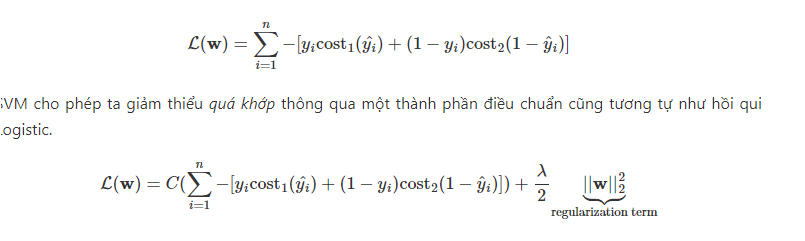

với công thức (1) là công thức của svm cơ bản

công thức (2) là công thức svm với regularization để hạn chế hiện tượng overfiting khi training


sự đặc biệt của svm là các đương phân tuyến ( linear seperable ) và chúng ta có 2 khái niệm mới đó là đường biên và lề



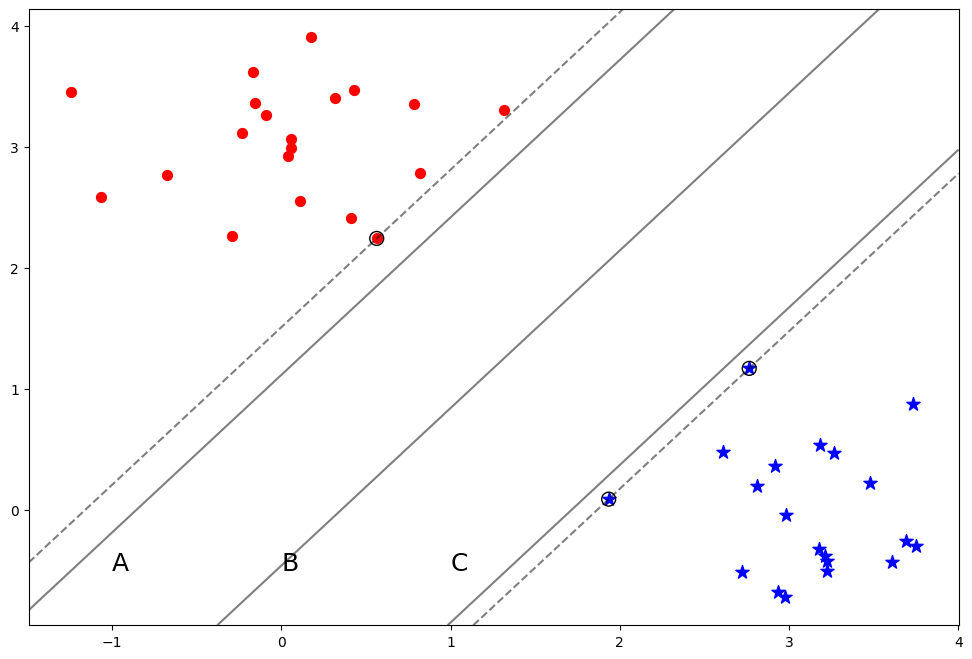

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=[(0, 3), (3, 0)], cluster_std=[0.5, 0.5], random_state=6)
idx_cls_0 = np.where(y == 0)
idx_cls_1 = np.where(y == 1)
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.figure(figsize = (12, 8))

plt.scatter(X[idx_cls_0, 0], X[idx_cls_0, 1], c='red', marker='o', s=50)
plt.scatter(X[idx_cls_1, 0], X[idx_cls_1, 1], c='blue', marker='*', s=100)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
B = clf.decision_function(xy).reshape(XX.shape)
A = B-0.9
C = B+0.8
# plot decision boundary and margins
ax.contour(XX, YY, B,  colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.contour(XX, YY, A, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

ax.contour(XX, YY, C, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           marker='o',linewidth=1, facecolors='none', edgecolors='k')

ax.text(0, -0.5, 'B', fontsize=18)
ax.text(-1, -0.5, 'A', fontsize=18)
ax.text(1, -0.5, 'C', fontsize=18)
plt.show()

code trên là minh họa đường biên và lề 3 đường thẳng A B C được gọi là đường biên

độ rộng đường biên được gọi là lề (margin)

Ngoài ra tập hợp những điểm nằm sát đường biên nhất thì được gọi là tập hỗ trợ. Những điểm này sẽ hỗ trợ tìm ra đường biên vì những đường thẳng nét đứt đi qua chúng song song với đường biên.


Trong không gian hai chiều thì đường biên là một đường thẳng. Trong không gian 3 chiều chúng sẽ là một mặt phẳng (plane). Trong không gian nhiều hơn 3 chiều chúng ta gọi đường biên phân chia là siêu phẳng (hyperplane).


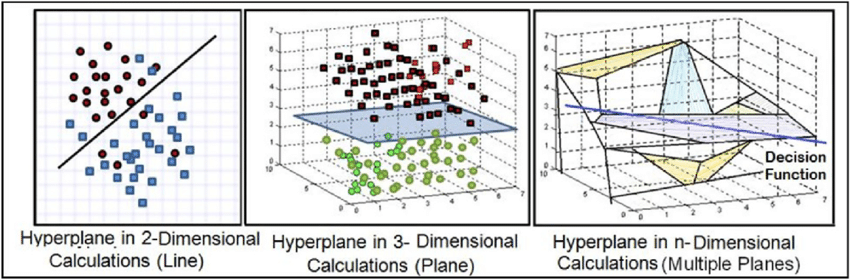

SVM cứng và điểm hạn chế của nó

khi trường hợp dễ bị overfitting

<ipython-input-4-2d80085f374b>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('RdBu'))
<ipython-input-4-2d80085f374b>:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
<ipython-input-4-2d80085f374b>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('RdBu'))
<ipython-input-4-2d80085f374b>:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,


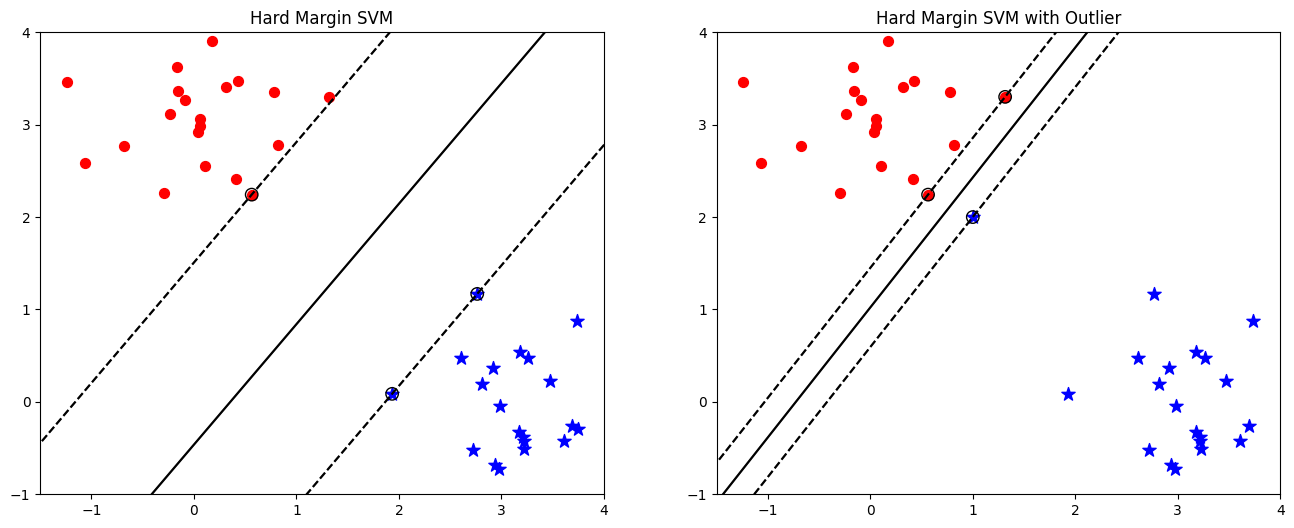

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=[(0, 3), (3, 0)], cluster_std=[0.5, 0.5], random_state=6)
idx_cls_0 = np.where(y == 0)
idx_cls_1 = np.where(y == 1)
id_max = np.argmax(X, axis=0)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# fit the model
for i in range(2):
    # Adjust outlier
    if i == 1:
      X[id_max[0]] = [1, 2]

    clf = svm.SVC(kernel='linear', C=100)
    clf.fit(X, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    # plot the line, the points, and the nearest vectors to the plane
    ax[i].plot(xx, yy, 'k-')
    ax[i].plot(xx, yy_down, 'k--')
    ax[i].plot(xx, yy_up, 'k--')

    ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k',
                cmap=cm.get_cmap('RdBu'))


    ax[i].scatter(X[idx_cls_0, 0], X[idx_cls_0, 1], c='red', marker='o', s=50)
    ax[i].scatter(X[idx_cls_1, 0], X[idx_cls_1, 1], c='blue', marker='*', s=100)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    x_min = -1.5
    x_max = 4
    y_min = -1
    y_max = 4

    # Put the result into a contour plot
    ax[i].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

    ax[i].set_xlim(x_min, x_max)
    ax[i].set_ylim(y_min, y_max)
    if i == 0:
      ax[i].set_title('Hard Margin SVM')
    else:
      ax[i].set_title('Hard Margin SVM with Outlier')

plt.show()

svm  soft margin có thể khắc phục được svm hard margin

<ipython-input-5-700f85761016>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('RdBu'))
<ipython-input-5-700f85761016>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
<ipython-input-5-700f85761016>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('RdBu'))
<ipython-input-5-700f85761016>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,


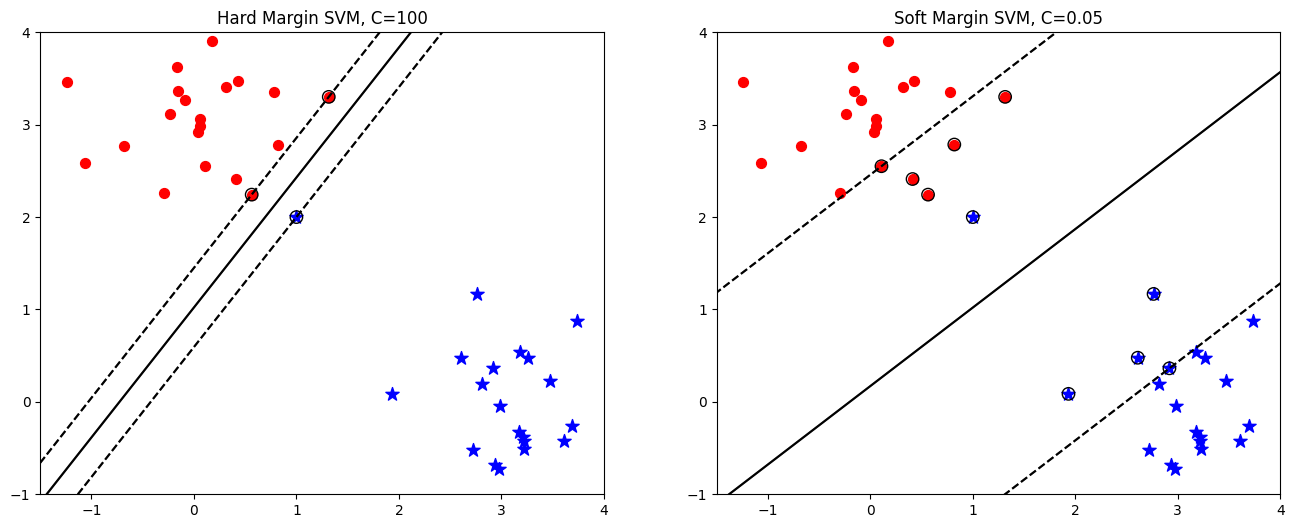

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# fit the modelf
for i, (name, penalty) in enumerate([('hard margin', 100), ('soft margin', 0.05)]):
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    ax[i].plot(xx, yy, 'k-')
    ax[i].plot(xx, yy_down, 'k--')
    ax[i].plot(xx, yy_up, 'k--')

    ax[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k',
                cmap=cm.get_cmap('RdBu'))


    ax[i].scatter(X[idx_cls_0, 0], X[idx_cls_0, 1], c='red', marker='o', s=50)
    ax[i].scatter(X[idx_cls_1, 0], X[idx_cls_1, 1], c='blue', marker='*', s=100)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    x_min = -1.5
    x_max = 4
    y_min = -1
    y_max = 4

    # Put the result into a contour plot
    ax[i].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

    ax[i].set_xlim(x_min, x_max)
    ax[i].set_ylim(y_min, y_max)
    if i == 0:
      ax[i].set_title('Hard Margin SVM, C={}'.format(penalty))
    else:
      ax[i].set_title('Soft Margin SVM, C={}'.format(penalty))

plt.show()

scource link : https://phamdinhkhanh.github.io/deepai-book/ch_ml/SVM.html#so-sanh-giua-le-cung-hard-margin-va-le-mem-soft-margin

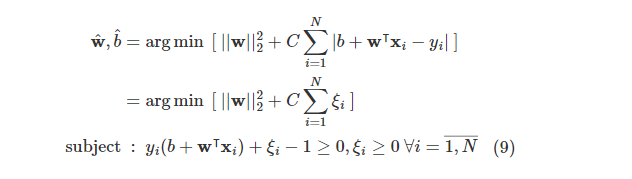

C lớn bài toán thu được phân loại đường biên cứng ( Hard margin SVM)


cụ thể C >> 50


C nhỏ bài toán thu được phân loại đường biên mềm ( Soft margin SVM)


cụ thể  C << 0.05

kỹ thuật Polynormial Features để bắt kịp các mối quan hệ phi tuyến giữa các đặc trưng trong bộ dữ liệu

source link : https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

code example of Polynormial Features

https://www.javatpoint.com/machine-learning-polynomial-regression

  kỹ thuật Gaussian RBF   


  link source : https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

  https://medium.com/@suvigya2001/the-gaussian-rbf-kernel-in-non-linear-svm-2fb1c822aae0

https://phamdinhkhanh.github.io/deepai-book/ch_ml/SVM.html#tuning-sieu-tham-so-cho-mot-kernel

---



InvalidParameterError: The 'dual' parameter of LinearSVC must be an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int'. Got 'auto' instead.

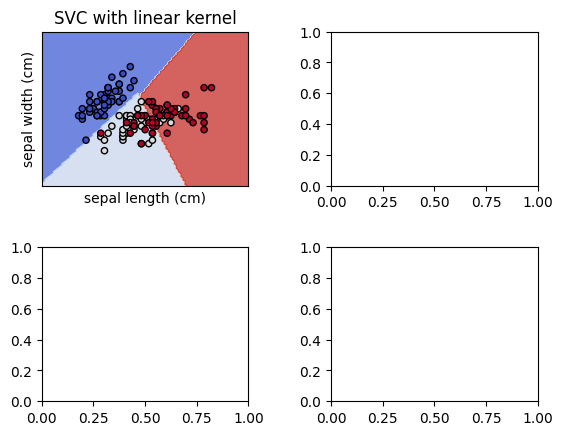

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

##### *Build* Algorithms Softmax

In [ ]:
import numpy as np

np.random.seed(1)
N = 2
d = 2
C = 3

X = np.random.randn(d,N)
y = np.random.randint(0,3,(N,))


In [ ]:
from scipy import sparse
def convert_labels(y, C = C):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

Y = convert_labels(y, C)
print(y)
print(Y)

[2 1]
[[0 0]
 [0 1]
 [1 0]]


In [ ]:
def softmax(Z):
  e_Z = np.exp(Z)
  A = e_Z/ e_Z.sum(axis = 0)
  return A

def softmax_stable(Z):
  e_Z = np.exp(Z - np.max(Z,axis = 0, keepdims = True))
  A = e_Z/ e_Z.sum(axis = 0)
  return A

def cost(X,Y, W):
  A = softmax(W.T.dot(X))
  return -np.sum(Y*np.log(A))

W_init = np.random.randn(d,C)

def grad(X,Y, W):
  A = softmax((W.T.dot(X)))
  E = A - Y
  return X.dot(E.T)

def numerical_grad(X,Y, W, cost):
  eps = 1e-6
  g = np.zeros_like(W)
  for i in range(W.shape[0]):
    for j in range(W.shape[1]):
      W_p = W.copy()
      W_n = W.copy()
      W_p += eps
      W_n -= eps
      g[i,j] =(cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
  return g

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))

2.74727837634489


In [ ]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
print(W[-1])

[[-0.2318988  -3.43261135  3.66801717]
 [ 1.50944405 -3.02319804 -0.24854017]]


In [ ]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [ ]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0).T # each column is a datapoint
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

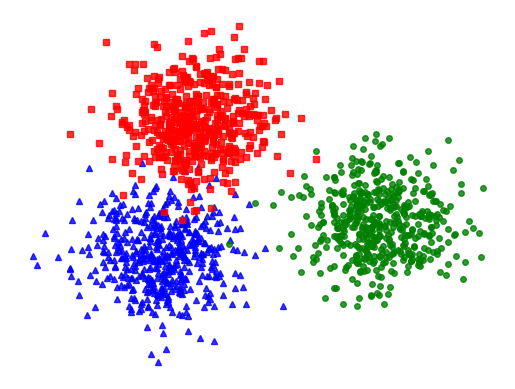

In [ ]:
import matplotlib.pyplot as plt
def display(X, label):
#     K = np.amax(label) + 1
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]

    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)

#     plt.axis('equal')
    plt.axis('off')
    plt.plot()
    plt.show()

display(X[1:, :], original_label)

[[ 8.19303453 -3.67776245 -4.2765956 ]
 [-0.94525191  1.64343991 -0.81261408]
 [-2.40407203 -2.1826601   0.68723471]]
(1, 270400)
(3, 270400)


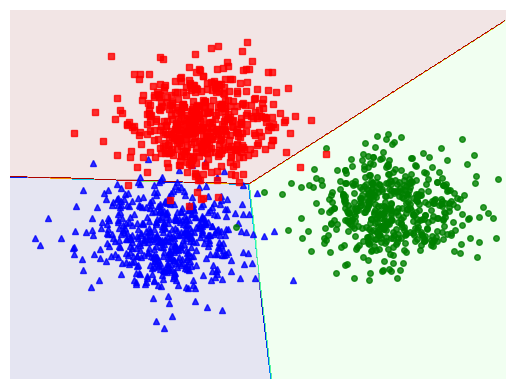

<Figure size 640x480 with 0 Axes>

In [ ]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

#Visualize
# x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
# x_min, x_max = -4, 14
# y_min, y_max = -4, 14

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)


print(XX.shape)

Z = pred(W[-1], XX)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure(1
# plt.pcolormesh(xx, yy, Z, cmap='jet', alpha = .35)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()

#### Build Model Multi class SVM

Tính và đạo hàm bằng Navie ( cách đơn giản nhất)

In [ ]:
import numpy as np
from random import shuffle

# naive way to calculate loss and grad
def svm_loss_naive(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape

    ## naive loss and grad
    loss = 0
    dW = np.zeros_like(W)
    for n in range(N):
        xn = X[:, n]
        score = W.T.dot(xn)
        for j in range(C):
            if j == y[n]:
                continue
            margin = 1 - score[y[n]] + score[j]
            if margin > 0:
                loss += margin
                dW[:, j] += xn
                dW[:, y[n]] -= xn

    loss /= N
    loss += 0.5*reg*np.sum(W * W) # regularization

    dW /= N
    dW += reg*W # gradient off regularization
    return loss, dW

# random, small data
N, C, d = 10, 3, 5
reg = .1
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

# sanity check
print ('loss without regularization:', svm_loss_naive(W, X, y, 0)[0])
print ('loss with regularization:',svm_loss_naive(W, X, y, .1)[0])

loss without regularization: 3.4052812524451985
loss with regularization: 3.9197934800524936


In [ ]:
f = lambda W: svm_loss_naive(W, X, y, .1)[0]

# for checking if calculated grad is correct
def numerical_grad_general(W, f):
    eps = 1e-6
    g = np.zeros_like(W)
    # flatening variable -> 1d. Then we need
    # only one for loop
    W_flattened = W.flatten()
    g_flattened = np.zeros_like(W_flattened)

    for i in range(W.size):
        W_p = W_flattened.copy()
        W_n = W_flattened.copy()
        W_p[i] += eps
        W_n[i] -= eps

        # back to shape of W
        W_p = W_p.reshape(W.shape)
        W_n = W_n.reshape(W.shape)
        g_flattened[i] = (f(W_p) - f(W_n))/(2*eps)

    # convert back to original shape
    return g_flattened.reshape(W.shape)

# compare two ways of computing gradient
g1 = svm_loss_naive(W, X, y, .1)[1]
g2 = numerical_grad_general(W, f)
print ('gradient difference: %f',np.linalg.norm(g1 - g2) )
# this should be very small

gradient difference: %f 1.1408444860774058e-09


Tính và đạo hàm bằng Vectorized

In [ ]:
def svm_loss_vectorized(W, X, y, reg):
  d, C = W.shape
  _, N = X.shape
  loss = 0
  dW = np.zeros_like(W)

  Z = W.T.dot(X)
  correct_class_score = np.choose(y,Z).reshape(N,1).T
  margins = np.maximum(0,Z - correct_class_score + 1)
  margins[y, np.arange(margins.shape[1])] = 0
  loss = np.sum(margins,axis = (0,1))
  loss /= N
  loss += 0.5*reg*np.sum(W*W)

  F = (margins > 0).astype(int)
  F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
  dW = X.dot(F.T)/N + reg*W
  return loss,dW

In [ ]:
N, C, d = 49000, 10, 3073
reg = .1
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

import time
t1 = time.time()
l1, dW1 = svm_loss_naive(W, X, y, reg)
t2 = time.time()
print('Naive     : run time:', t2 - t1, '(s)')

t1 = time.time()
l2, dW2 = svm_loss_vectorized(W, X, y, reg)
t2 = time.time()
print('Vectorized: run time:', t2 - t1, '(s)')
print('loss difference:', np.linalg.norm(l1 - l2))
print('gradient difference:', np.linalg.norm(dW1 - dW2))

Naive     : run time: 13.030900239944458 (s)
Vectorized: run time: 1.253434658050537 (s)
loss difference: 6.366462912410498e-12
gradient difference: 2.742931985575854e-14


GD WIth MULti class SVM

In [ ]:
# Mini-batch gradient descent
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
        batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]

        loss_history[it], dW = \
            svm_loss_vectorized(W, X_batch, y_batch, reg)

        W -= lr*dW
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' \
                ,(it, num_iters, loss_history[it]))

    return W, loss_history

N, C, d = 49000, 10, 3073
reg = .1
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

W, loss_history = multiclass_svm_GD(X, y, W, reg)

it %d/%d, loss = %f (1, 1000, 1824.7264449747245)
it %d/%d, loss = %f (101, 1000, 247.30882687609642)
it %d/%d, loss = %f (201, 1000, 59.18566280533593)
it %d/%d, loss = %f (301, 1000, 37.31992630111595)
it %d/%d, loss = %f (401, 1000, 40.200623778652755)
it %d/%d, loss = %f (501, 1000, 48.25563078860835)
it %d/%d, loss = %f (601, 1000, 45.94286602844392)
it %d/%d, loss = %f (701, 1000, 41.00454757254772)
it %d/%d, loss = %f (801, 1000, 39.0227213359735)
it %d/%d, loss = %f (901, 1000, 42.608093636327084)


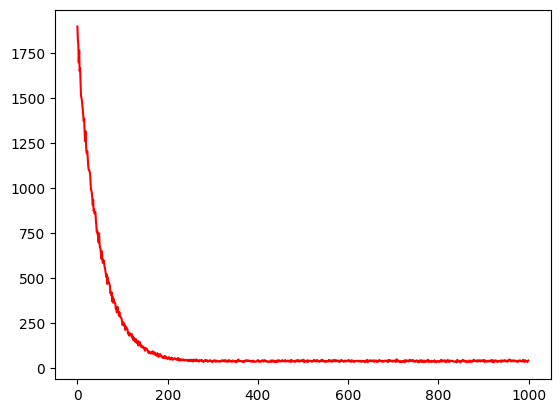

In [ ]:
import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history,color = 'red')
plt.show()

##### Test vantage of multi class svm

In [ ]:
pip install cifar10

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
from statistics import mean
from joblib import dump, load
from tensorflow import keras
from skimage.feature import hog

from skimage import data, exposure
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
assert y_train.shape == (50000,)
assert y_test.shape == (10000,)

170498071/170498071 [==============================] - 4s 0us/step


NameError: name 'X_train' is not defined

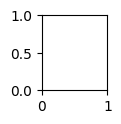

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

#### SGD classification


Plot the maximum margin separating hyperplane within a two-class separable dataset using a linear Support Vector Machines classifier trained using SGD.

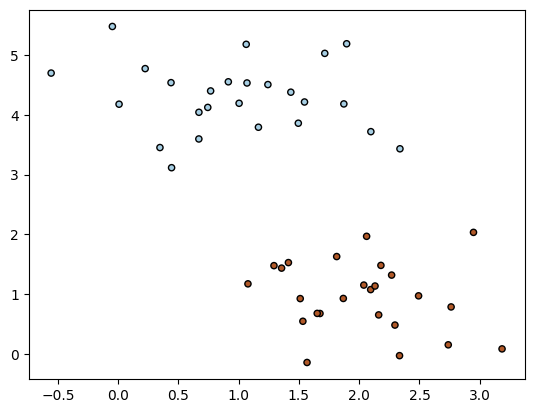

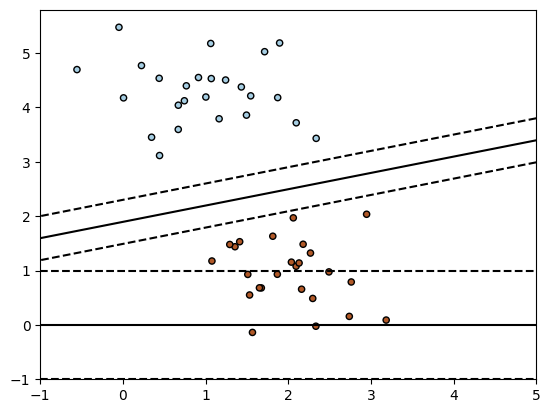

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier

X,Y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
# loss hinge use soft margin linear Support Vector Machine
clf = SGDClassifier(loss = 'hinge',alpha = 0.01, max_iter = 200)
clf.fit(X,Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)
plt.show()
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)
X1,X2 = np.meshgrid(xx,yy)
Z = np.empty(X1.shape)

for (i,j), val in np.ndenumerate(X1):
  x1 = val
  x2 = X2[i,j]
  p = clf.decision_function([[x1,x2]])
  Z[i,j] = p[0]

levels = [-1.0, 0.0 , 1.0]
linestyles = ['dashed','solid','dashed']
colors = 'k'
# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

# plt.scatter(X[])
plt.axis("tight")
plt.show()

AI Generated Text Detection by SGD classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier



In [ ]:
pip install opendatasets

In [ ]:

import opendatasets as od


od.download(
    "https://www.kaggle.com/datasets/alejopaullier/daigt-external-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phctuynl
Your Kaggle Key: ··········


100%|██████████| 2.87M/2.87M [00:00<00:00, 3.27MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv('daigt-external-dataset/daigt-external-dataset.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'daigt-external-dataset/daigt-external-dataset.csv'

In [ ]:
import pandas as pd
data = pd.read_csv('data/daigt-external-dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/daigt-external-dataset.csv'

In [ ]:
import pandas as pd
data = pd.read_csv('data/daigt-external-dataset.csv')

#### Naive Bayes Classifier

 ##### Tìm hiểu thuật toán :

https://www.youtube.com/watch?app=desktop&v=O2L2Uv9pdDA

##### Tính toán thuật toán

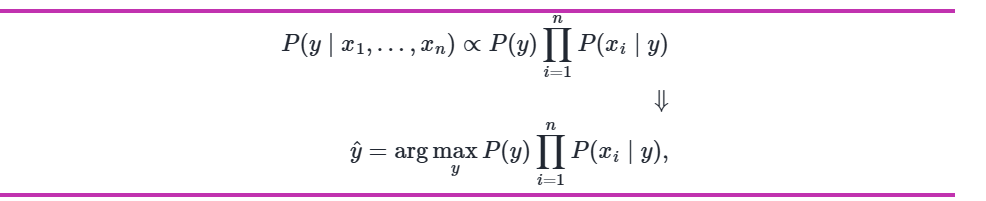

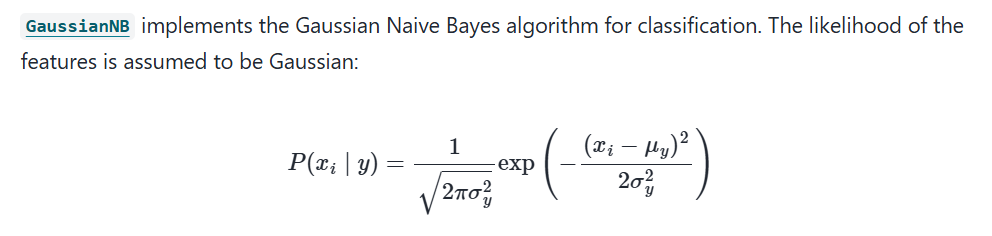

https://towardsdatascience.com/introduction-to-naive-bayes-classification-4cffabb1ae54

##### Ứng dụng

Download Kaggle Data to Google Drive & Colab



Application Naive Bayes for classifier email spam or ham

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle


In [ ]:
%cd /content/drive/MyDrive/Data
!echo '{"username":"phctuynl","key":"c2c149ef24b6e82279f8bcd99519ffd7"}' > ~/.kaggle/kaggle.json
!kaggle datasets download -d shantanudhakadd/email-spam-detection-dataset-classification

/content/drive/MyDrive/Data
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 18.1MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Data/email-spam-detection-dataset-classification.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [ ]:
zip_ref

<zipfile.ZipFile [closed]>

##### Introduction of Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/targetdir/spam.csv',encoding='latin-1')

In [ ]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
col = df.columns

In [ ]:
col

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
col[-3:]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df = df.drop(df.columns[-3:],axis = 1)

In [ ]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [ ]:
df = df.rename(columns = {'v1':'Category', 'v2': 'Text'})

In [ ]:
df.head(2)

Category                                               Text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...

##### Exploratory Data Analysis

In [ ]:
print('Total number of rows in data : ', len(df))

Total number of rows in data :  5572


In [ ]:
# Distribution of Ham or Spam in Data

print('Email distribution (%)', '\n' ,round(df.Category.value_counts(normalize=True),3)*100)

Email distribution (%) 
 Category
ham     86.6
spam    13.4
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-69-b37c9ffeb536>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, y = 'Category', palette = "Set2")


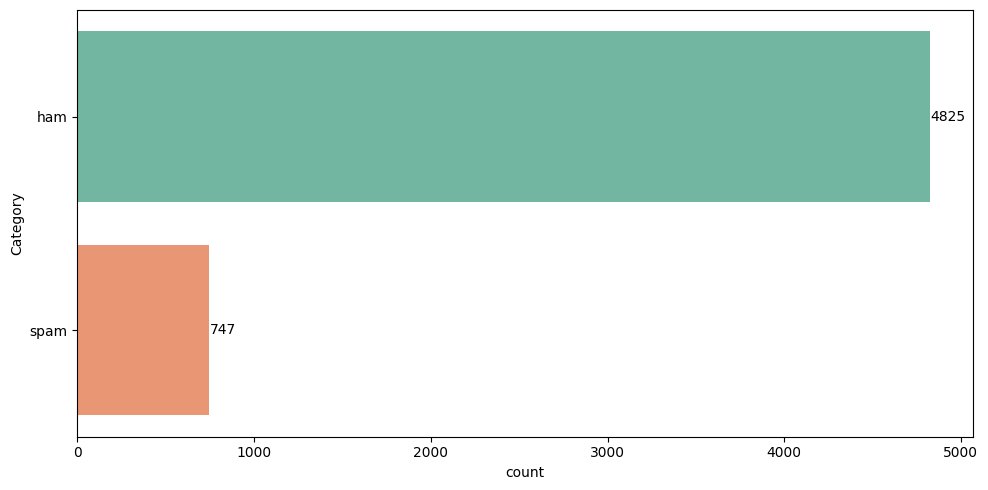

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data = df, y = 'Category', palette = "Set2")
for container in ax.containers:
   ax.bar_label(container)
plt.tight_layout()

In [ ]:
df.describe()

Category                    Text
count      5572                    5572
unique        2                    5169
top         ham  Sorry, I'll call later
freq       4825                      30

Create new feature

In [ ]:
df['length'] = df['Text'].apply(len)
display(df.head())

Category                                               Text  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61

In [ ]:
pip install plotly.express

In [ ]:
import plotly.express as px
fig = px.histogram(df, x='length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [ ]:
import plotly.express as px
fig = px.histogram(df, x='length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [ ]:
import plotly.express as px
fig = px.histogram(df[df['Category'] == 'ham'], x='length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [ ]:
import plotly.express as px
fig = px.histogram(df[df['Category'] == 'spam'], x='length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [ ]:
# encoding one hot

df.loc[:,'Category'] = df.Category.map({'ham' : 0, 'spam' : 1})
df['Category'] = df['Category'].astype(int)
df.head()

Category                                               Text  length
0         0  Go until jurong point, crazy.. Available only ...     111
1         0                      Ok lar... Joking wif u oni...      29
2         1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3         0  U dun say so early hor... U c already then say...      49
4         0  Nah I don't think he goes to usf, he lives aro...      61

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Text      5572 non-null   object
 2   length    5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


##### Use kỹ thuật Bag of Words

###### Instruction Bag of Words

https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/

Step #1 : We will first preprocess the data, in order to:



In [ ]:
import nltk
import re
import numpy as np

# execute the text here as :
text = """ Beans. I was trying to explain to somebody as we were flying in, that’s corn. That’s beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and we’re lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven’t seen in a long time, and somehow he has not aged and I have. And it’s great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn’t speak at the commencement.  """
import nltk
nltk.download('punkt')
dataset = nltk.sent_tokenize(text)

for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset

[' beans ',
 'i was trying to explain to somebody as we were flying in that s corn ',
 'that s beans ',
 'and they were very impressed at my agricultural knowledge ',
 'please give it up for amaury once again for that outstanding introduction ',
 'i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here ',
 'i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have ',
 'and it s great to see you governor ',
 'i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today ',
 'and i am deeply honored at the paul douglas award that is being given to me ',
 'he is somebody who set the path for so much outstanding public service here in illinois ',
 'now i want to start by addressing the elephant in the room ',
 'i know people are still wond

Step #2 : Obtaining most frequent words in our text.

In [ ]:
# Creating the Bag of Words model
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
nltk.word_tokenize(data)

['i',
 'know',
 'people',
 'are',
 'still',
 'wondering',
 'why',
 'i',
 'didn',
 't',
 'speak',
 'at',
 'the',
 'commencement']

In [ ]:
word2count

{'beans': 2,
 'i': 12,
 'was': 1,
 'trying': 1,
 'to': 8,
 'explain': 1,
 'somebody': 3,
 'as': 1,
 'we': 2,
 'were': 2,
 'flying': 1,
 'in': 5,
 'that': 4,
 's': 3,
 'corn': 1,
 'and': 7,
 'they': 1,
 'very': 1,
 'impressed': 1,
 'at': 4,
 'my': 1,
 'agricultural': 1,
 'knowledge': 1,
 'please': 1,
 'give': 1,
 'it': 3,
 'up': 1,
 'for': 5,
 'amaury': 1,
 'once': 1,
 'again': 1,
 'outstanding': 2,
 'introduction': 1,
 'have': 3,
 'a': 2,
 'bunch': 1,
 'of': 3,
 'good': 1,
 'friends': 1,
 'here': 5,
 'today': 2,
 'including': 1,
 'who': 4,
 'served': 1,
 'with': 1,
 'is': 4,
 'one': 1,
 'the': 9,
 'finest': 1,
 'senators': 1,
 'country': 1,
 're': 1,
 'lucky': 1,
 'him': 1,
 'your': 1,
 'senator': 1,
 'dick': 1,
 'durbin': 1,
 'also': 1,
 'noticed': 1,
 'by': 2,
 'way': 1,
 'former': 1,
 'governor': 2,
 'edgar': 1,
 'haven': 1,
 't': 2,
 'seen': 1,
 'long': 1,
 'time': 1,
 'somehow': 1,
 'he': 2,
 'has': 1,
 'not': 1,
 'aged': 1,
 'great': 1,
 'see': 1,
 'you': 1,
 'want': 2,
 'thank':

In [ ]:
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

Step #3 : Building the Bag of Words model


In [ ]:
X = []
for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

In [ ]:
X.shape

(13, 100)

###### Application

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(3900, 8672)

'X-Test :'

(1672, 8672)

'Y-Train :'

(3900,)

'X-Test :'

(1672,)

In [ ]:
for i in text[:5]:
  print(i)

  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1
  (0, 5504)	1
  (0, 4512)	1
  (0, 4318)	1
  (0, 8392)	1
  (0, 5533)	1
  (0, 4087)	1
  (0, 3358)	1
  (0, 2949)	2
  (0, 8447)	1
  (0, 2165)	1
  (0, 7756)	3
  (0, 8405)	1
  (0, 3087)	2
  (0, 2386)	1
  (0, 3207)	1
  (0, 7743)	1
  (0, 411)	1
  (0, 4930)	1
  (0, 402)	1
  (0, 7595)	1
  (0, 784)	1
  (0, 6297)	1
  (0, 6190)	1
  (0, 7230)	1
  (0, 7933)	1
  (0, 6242)	1
  (0, 1156)	1
  (0, 77)	1
  (0, 2802)	1
  (0, 6633)	2
  (0, 7024)	1
  (0, 2823)	1
  (0, 3927)	1
  (0, 1042)	1
  (0, 7640)	1
  (0, 7756)	1
  (0, 5238)	1
  (0, 2712)	1
  (0, 7660)	1
  (0, 3781)	2
  (0, 3558)	1
  (0, 8075)	1
  (0, 4665)	1
  (0, 1207)	1
  (0, 3831)	1
  (0, 7680)	1


##### Training model Naive Bayses Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
# Pipe
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

x_train, x_test, y_train, y_test = train_test_split(df['Text'], df['Category'], test_size=0.30, random_state=100)

param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'classifier__alpha': [0.01, 0.1, 1.0, 10.0]  # Smoothing parameter for MultinomialNB
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)  # Train the model


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 1.0, 10.0],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

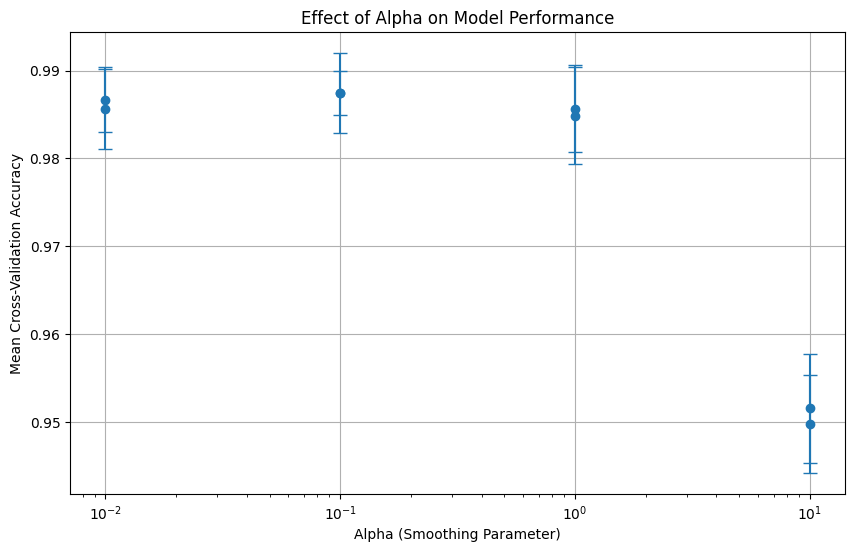

In [ ]:
import matplotlib.pyplot as plt

# Get the results from the GridSearchCV
results = grid_search.cv_results_

# Example for plotting the effect of the alpha parameter on model performance
alphas = [params['classifier__alpha'] for params in results['params']]
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

# Plotting the mean cross-validation accuracy with error bars representing standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(alphas, mean_scores, yerr=std_scores, fmt='o', capsize=5)
plt.xscale('log')
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Effect of Alpha on Model Performance')
plt.grid(True)
plt.show()


In [ ]:
print(grid_search.best_estimator_)
print('Best core: ', grid_search.best_score_)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB(alpha=0.1))])
Best core:  0.9874358974358974


In [ ]:
emails=[
   " When we launched ProjectPro, we had 1 purpose - to give you actionable, end-to-end projects in data science and big data.  Since then, we have done a few things right and made many many mistakes. Our core group of users have been forgiving of our mistakes and silently cheering us.  Click here to read customer feedback and profiles of our users.If you have a similar story and would like to share it, please reply to this mail.  "
]

y = grid_search.predict(emails)
print(y)

NameError: name 'X_test' is not defined

In [ ]:

prediction = grid_search.predict(x_test)
end_time = time.time()
print(f'Time taken: {end_time - start_time} seconds')
print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Time taken: 2130.8156332969666 seconds
Multinomial NB
Accuracy score: 0.986244019138756
Precision score: 0.9523809523809523
Recall score: 0.9389671361502347
F1 score: 0.9456264775413711


[0 0 0 ... 0 0 0]


######Used Neural networl

In [ ]:


import time


In [ ]:
# Calculate and print classification metrics
start_time = time.time()

from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
end_time = time.time()
print(f'Time taken: {end_time - start_time} seconds')
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))

Time taken: 29.63516616821289 seconds
MLP Classifier
Accuracy score: 0.98
Precision score: 0.97
Recall score: 0.90
F1 score: 0.93


######  Multinomial Naive Bayes


In [ ]:
%%time
start_time = time.time()

# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)
end_time = time.time()
print(f'Time taken: {end_time - start_time} seconds')
print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Time taken: 0.04015827178955078 seconds
Multinomial NB
Accuracy score: 0.9814593301435407
Precision score: 0.9174311926605505
Recall score: 0.9389671361502347
F1 score: 0.9280742459396751
CPU times: user 43.7 ms, sys: 1.35 ms, total: 45.1 ms
Wall time: 123 ms


###### Bernoulli Naive Bayes

In [ ]:

# Bernoulli Naive Bayes model
start_time = time.time()
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
end_time = time.time()
print(f'Time taken: {end_time - start_time} seconds')

print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Time taken: 0.03628039360046387 seconds
Bernoulli NB
Accuracy score: 0.9838516746411483
Precision score: 1.0
Recall score: 0.8732394366197183
F1 score: 0.9323308270676691


###### Confusion Matrix

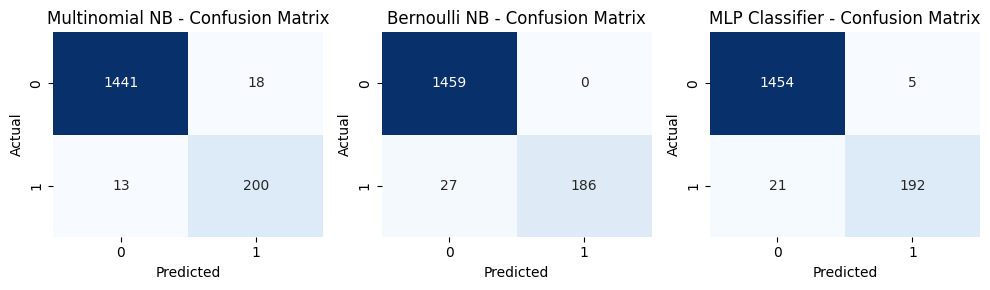

In [ ]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

###### Metric Comparison Heatmap

In [ ]:

metric_data = []
for model_name, model in models:
    start_time = time.time()
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    end_time = time.time()
    t = end_time - start_time
    metric_data.append([accuracy, precision, recall, f1,t])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score",'Time']
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

AttributeError: 'float' object has no attribute 'time'

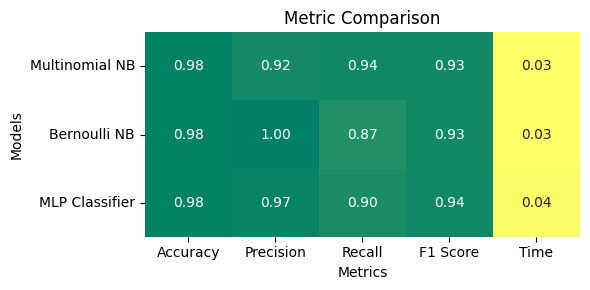

In [ ]:
import time
metric_data = []
for model_name, model in models:
    start_time = time.time()
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    end_time = float(time.time())
    t = end_time - start_time
    metric_data.append([accuracy, precision, recall, f1,t])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score",'Time']
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

In [ ]:
df

Category                                               Text  length
0            0  Go until jurong point, crazy.. Available only ...     111
1            0                      Ok lar... Joking wif u oni...      29
2            1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3            0  U dun say so early hor... U c already then say...      49
4            0  Nah I don't think he goes to usf, he lives aro...      61
...        ...                                                ...     ...
5567         1  This is the 2nd time we have tried 2 contact u...     161
5568         0              Will Ì_ b going to esplanade fr home?      37
5569         0  Pity, * was in mood for that. So...any other s...      57
5570         0  The guy did some bitching but I acted like i'd...     125
5571         0                         Rofl. Its true to its name      26

[5572 rows x 3 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Text,df.Category,test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

clf.predict(emails)

clf.score(X_test,y_test)

0.9849246231155779

##### Bổ trợ 2 thuật toán Multinomail Naive Bayse and Bernouli Naive Bayses


soure : https://machinelearningcoban.com/2017/08/08/nbc/

## Algorithms Decision Tree and Variant

### Decision Tree

Instruction do Decision Tree : https://machinelearningcoban.com/2018/01/14/id3/

https://phamdinhkhanh.github.io/deepai-book/ch_ml/DecisionTree.html#thuat-toan-id3-va-cart

https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c

https://hunch.net/~coms-4771/quinlan.pdf

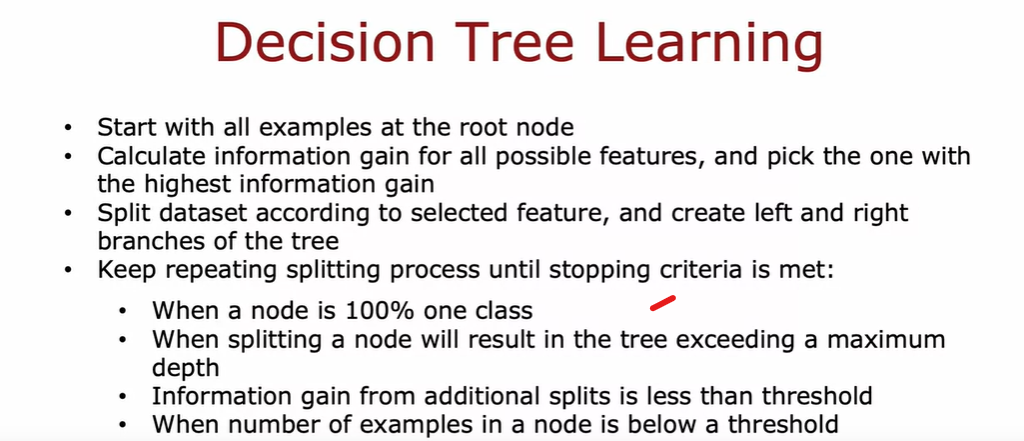

Trong RandomForestClassifier của scikit-learn, tham số điều khiển việc chọn sampling with replacement là bootstrap.

bootstrap=True: Mặc định, giá trị này là True, nghĩa là mẫu bootstrap (sampling with replacement) sẽ được sử dụng. Các mẫu dữ liệu sẽ được chọn với việc hoàn lại, có nghĩa là một điểm dữ liệu có thể xuất hiện nhiều lần trong tập huấn luyện của một cây.

bootstrap=False: Nếu bạn đặt giá trị này thành False, mô hình sẽ không sử dụng lấy mẫu có hoàn lại, nghĩa là mỗi điểm dữ liệu chỉ được chọn một lần cho mỗi cây trong rừng.

Vì vậy, tham số bootstrap là hệ số kiểm soát việc lấy mẫu có hoàn lại trong RandomForestClassifier

#### Random Decision Tree

trên dữ liệu bảng, còn được gọi là dữ liệu có cấu trúc. Điều này có nghĩa là nếu tập dữ liệu của bạn giống như một bảng lớn, thì cây quyết định sẽ là một lựa chọn đáng xem xét. Ví dụ, trong ứng dụng dự đoán giá nhà, chúng ta có một tập dữ liệu với các đặc trưng tương ứng với kích thước của ngôi nhà, số phòng ngủ, số tầng, và tuổi của ngôi nhà. Các vấn đề như vậy là những vấn đề mà cây quyết định có thể làm tốt. Tuy nhiên, cây quyết định không được khuyến nghị sử dụng trên dữ liệu không có cấu trúc như hình ảnh, video, âm thanh và văn bản. Mạng neural, như chúng ta sẽ thấy trong một giây, thường hoạt động tốt hơn cho các nhiệm vụ dữ liệu không có cấu trúc.

Một ưu điểm lớn của cây quyết định và cây quyết định kết hợp là chúng có thể được huấn luyện rất nhanh. Điều này cho phép bạn nhanh chóng cải thiện hiệu suất của thuật toán học máy của mình. Ngoài ra, cây quyết định nhỏ có thể được hiểu bởi con người. Nếu bạn đang huấn luyện chỉ một cây quyết định đơn lẻ và cây quyết định đó chỉ có vài chục nút, bạn có thể in ra cây quyết định đó để hiểu cách nó đưa ra quyết định. Tuy nhiên, khi xây dựng một tập hợp gồm 100 cây và mỗi cây có hàng trăm nút, việc nhìn vào tập hợp đó để hiểu nó đang làm gì trở nên khó khăn hơn và có thể cần sử dụng các kỹ thuật trực quan hóa riêng biệt.

Nếu bạn đã quyết định sử dụng cây quyết định hoặc cây quyết định kết hợp, tôi khuyên bạn nên sử dụng XGBoost cho hầu hết các ứng dụng. Một nhược điểm nhỏ của cây quyết định kết hợp là nó tốn kém hơn một cây quyết định đơn lẻ. Tuy nhiên, trừ khi bạn có nguồn tài nguyên tính toán hạn chế, tôi gần như luôn luôn sử dụng cây quyết định kết hợp và sử dụng XGBoost đặc biệt.

Còn về mạng neural, nó hoạt động tốt trên tất cả các loại dữ liệu, bao gồm cả dữ liệu bảng có cấu trúc và dữ liệu không có cấu trúc. Mạng neural cũng có thể làm việc với dữ liệu kết hợp có cả thành phần có cấu trúc và không có cấu trúc. Tuy nhiên, mạng neural có thể chậm hơn cây quyết định. Một mạng neural lớn có thể mất rất nhiều thời gian để huấn luyện. Một số lợi ích khác của mạng neural bao gồm khả năng sử dụng transfer learning và dễ dàng kết hợp nhiều mạng neural trong một hệ thống.

Đó là tóm tắt của video này. Nếu bạn có bất kỳ câu hỏi hoặc cần thêm thông tin, xin vui lòng cho tôi biết.

#### XGBoosting

Goal for Sunday : 11/08/2024

Read this Ensembles content : https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosted-trees

XGBoost là một thuật toán học máy được sử dụng rộng rãi và có nhiều lợi thế, bao gồm:

Hiệu suất cao: XGBoost được thiết kế để chạy nhanh và hiệu quả. Nó có thể xử lý các tập dữ liệu lớn và có thể được sử dụng trong các ứng dụng thời gian thực.

Độ chính xác cao: XGBoost thường cho kết quả dự đoán chính xác và có khả năng xử lý các vấn đề phức tạp.

Tích hợp kiểm soát quá khớp: XGBoost có tính năng tích hợp kiểm soát quá khớp, giúp tránh tình trạng mô hình quá tinh chỉnh với dữ liệu huấn luyện và không thể tổng quát hóa tốt với dữ liệu mới.

Hỗ trợ đa nền tảng: XGBoost có thể được triển khai trên nhiều ngôn ngữ lập trình như Python, R và Java, giúp nó phù hợp với nhiều môi trường phát triển.

Được sử dụng rộng rãi trong cạnh tranh học máy: XGBoost đã được sử dụng thành công trong nhiều cuộc thi học máy và ứng dụng thương mại, đặc biệt là trong các cuộc thi trên Kaggle.

Dễ sử dụng: XGBoost có các thư viện mã nguồn mở và tài liệu phong phú, giúp người dùng dễ dàng triển khai và sử dụng thuật toán này.
Tóm lại, XGBoost là một thuật toán mạnh mẽ và linh hoạt, được sử dụng rộng rãi trong lĩnh vực học máy và có nhiều lợi thế vượt trội.

#### Stacked Generalization

Stacked Generalization, còn được gọi là Stacking, là một kỹ thuật ensemble tiên tiến được sử dụng để kết hợp dự đoán từ nhiều mô hình cơ bản (base models) nhằm tạo ra một mô hình dự đoán mạnh mẽ hơn. Ý tưởng chính của Stacking là thay vì chỉ đơn thuần kết hợp dự đoán của các mô hình cơ bản (như trong voting hay averaging), nó sử dụng một mô hình meta (meta-model) để học cách tốt nhất kết hợp các dự đoán từ các mô hình cơ bản.

Các bước thực hiện Stacked Generalization:
Chia dữ liệu thành hai phần:

Dữ liệu được chia thành hai phần: phần đầu tiên (tập huấn luyện cho các mô hình cơ bản) và phần thứ hai (tập huấn luyện cho mô hình meta).
Huấn luyện các mô hình cơ bản:

Trên tập huấn luyện đầu tiên, nhiều mô hình cơ bản khác nhau được huấn luyện (ví dụ: một mô hình SVM, một mô hình Random Forest, một mô hình KNN, v.v.). Mỗi mô hình cơ bản có thể là bất kỳ mô hình học máy nào.
Tạo tập dữ liệu mới từ các mô hình cơ bản:

Sau khi huấn luyện, các mô hình cơ bản tạo ra dự đoán trên phần dữ liệu thứ hai (tập huấn luyện cho mô hình meta).
Các dự đoán này được sử dụng để tạo ra một tập dữ liệu mới, trong đó mỗi cột đại diện cho dự đoán của một mô hình cơ bản. Ví dụ, nếu có ba mô hình cơ bản, tập dữ liệu mới sẽ có ba cột tương ứng với dự đoán của từng mô hình.
Huấn luyện mô hình meta:

Tập dữ liệu mới này sau đó được sử dụng để huấn luyện một mô hình meta. Mô hình meta này học cách kết hợp các dự đoán từ các mô hình cơ bản sao cho tối ưu nhất.
Mô hình meta có thể là một mô hình đơn giản như hồi quy tuyến tính hoặc một mô hình phức tạp hơn.
Dự đoán với mô hình meta:

Khi có dữ liệu mới cần dự đoán, các mô hình cơ bản trước tiên đưa ra dự đoán, sau đó các dự đoán này được đưa vào mô hình meta để tạo ra dự đoán cuối cùng.
Lợi ích của Stacked Generalization:
Kết hợp các điểm mạnh của nhiều mô hình: Stacking có thể kết hợp các mô hình với những điểm mạnh khác nhau để cải thiện hiệu suất tổng thể.
Giảm khả năng overfitting: Do các mô hình cơ bản được huấn luyện riêng biệt và mô hình meta chỉ học cách kết hợp chúng, Stacking có thể giảm thiểu rủi ro overfitting so với việc sử dụng một mô hình đơn lẻ.
Linh hoạt: Các mô hình cơ bản và mô hình meta có thể là bất kỳ mô hình học máy nào, giúp Stacking trở thành một phương pháp rất linh hoạt.
Ứng dụng thực tiễn:
Stacked Generalization thường được sử dụng trong các cuộc thi học máy và các hệ thống dự đoán phức tạp, nơi việc cải thiện hiệu suất một cách tối đa là cần thiết.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q kaggle
!echo '{"username":"phctuynl","key":"c2c149ef24b6e82279f8bcd99519ffd7"}' > ~/.kaggle/kaggle.json
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset


Mounted at /content/drive
/bin/bash: line 1: /root/.kaggle/kaggle.json: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
%cd /content/drive/MyDrive/Data
!echo '{"username":"phctuynl","key":"c2c149ef24b6e82279f8bcd99519ffd7"}' > ~/.kaggle/kaggle.json
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

/content/drive/MyDrive/Data
heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


##### Load Data

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Data/heart-attack-analysis-prediction-dataset.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/targetdir/heart.csv',encoding='latin-1')


In [ ]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

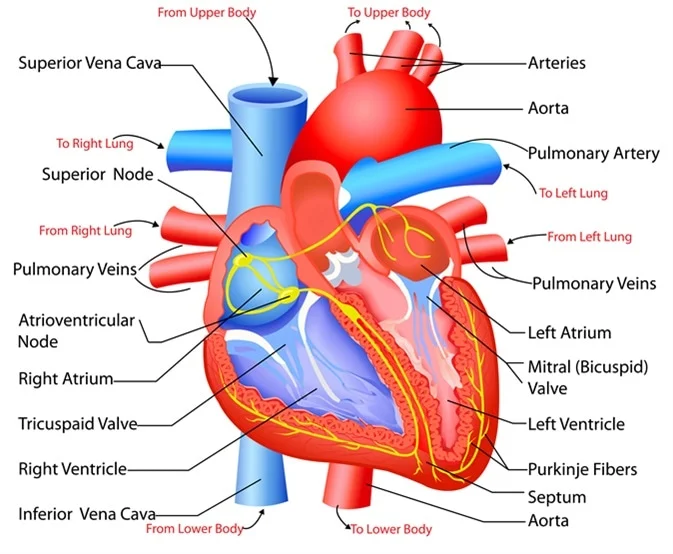

About this dataset

Age : Age of the patient ( tuổi của bệnh nhân )

Sex : Sex of the patient ( giới tính của bệnh nhân )

exang: exercise induced angina (1 = yes; 0 = no) ( tập luyện bị tức ngực)

ca: number of major vessels (0-3) ( cấp độ bệnh )

cp : Chest Pain type ( loại Đau Ngực )

Giá trị 1: đau thắt ngực điển hình Giá trị 2: đau thắt ngực không điển hình Giá trị 3: đau không đau thắt ngực Giá trị 4: không có triệu chứng
Value 1: typical angina  
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg) ( huyết áp khi nghỉ ngơi)

chol : cholestoral in mg/dl fetched via BMI sensor ( cholesterol tính bằng mg/dl được lấy qua cảm biến BMI)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) ( (đường huyết lúc đói > 120 mg/dl))

rest_ecg : resting electrocardiographic results (

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


Rest_ecg : kết quả điện tâm đồ lúc nghỉ Giá trị 0: bình thường Giá trị 1: có bất thường sóng ST-T (sóng T đảo ngược và/hoặc ST chênh lên hoặc chênh xuống > 0,05 mV) Giá trị 2: cho thấy phì đại thất trái có thể xảy ra hoặc xác định theo tiêu chuẩn Estes thalach : nhịp tim tối đa đạt được mục tiêu: 0= ít nguy cơ đau tim hơn 1= nhiều nguy cơ đau tim hơn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split ,RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report  , f1_score , recall_score , precision_score , RocCurveDisplay

In [ ]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

##### Explorary Data Analysis

In [ ]:
col = df.columns

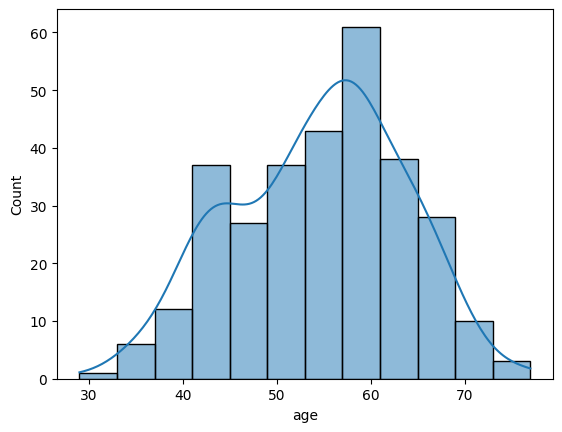

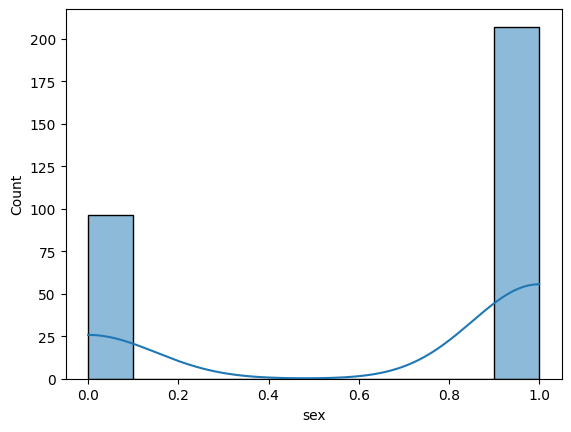

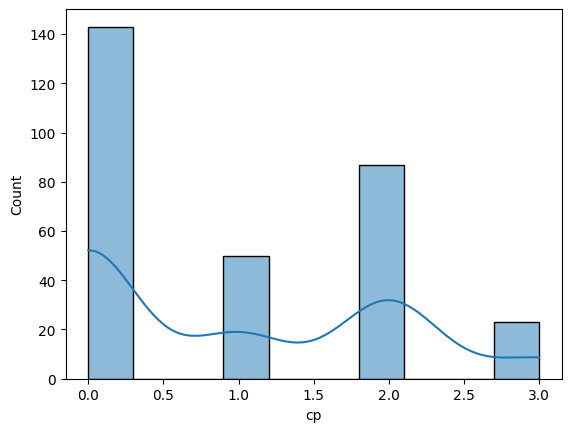

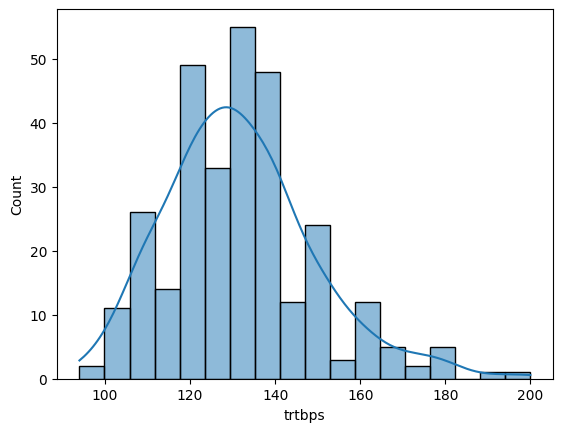

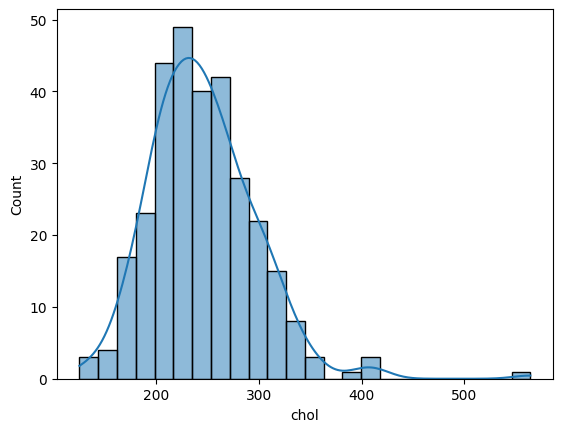

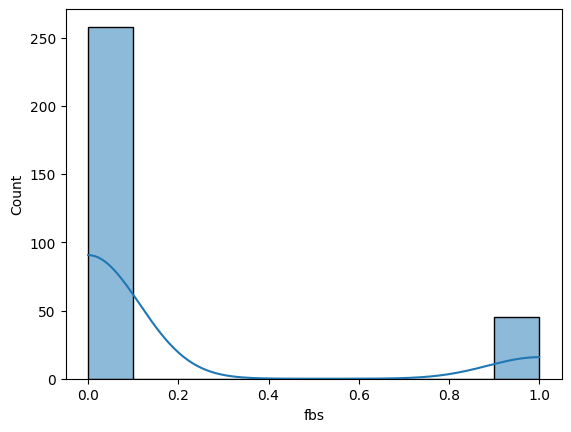

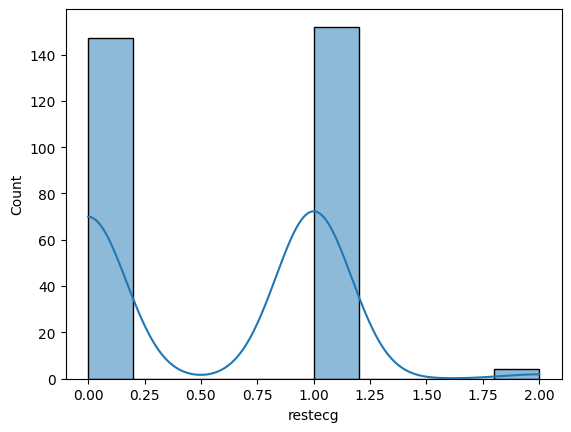

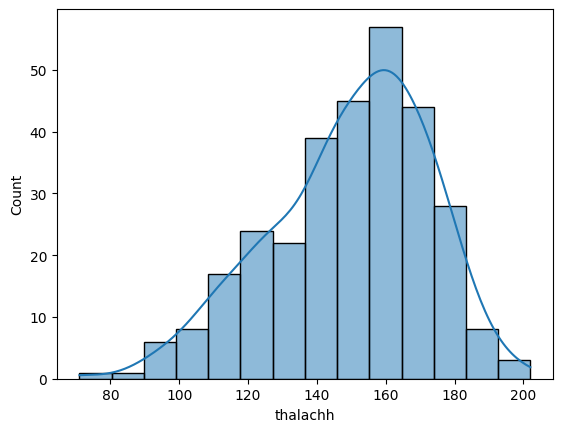

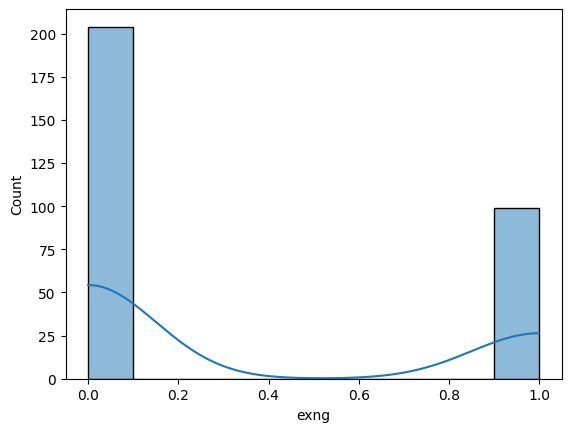

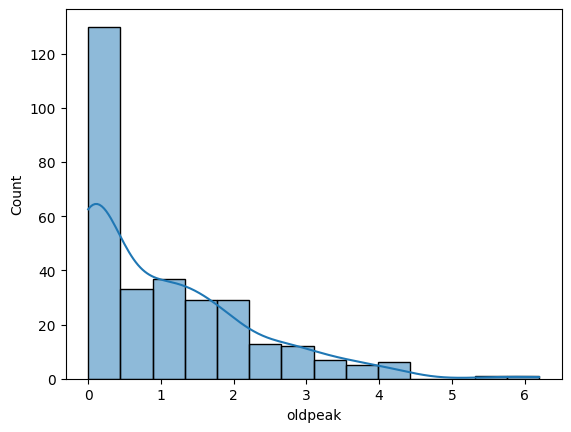

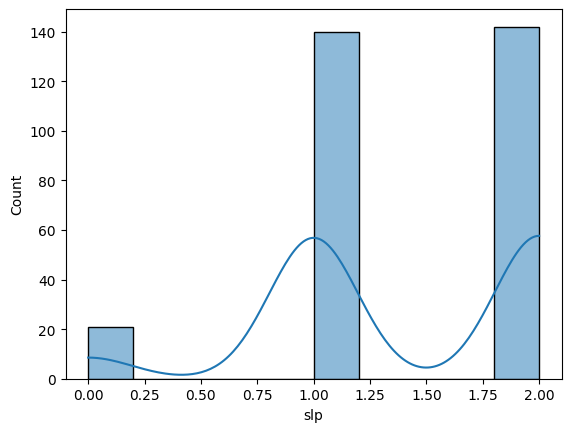

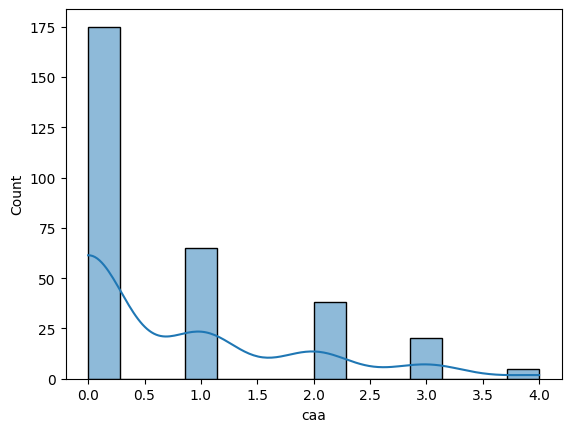

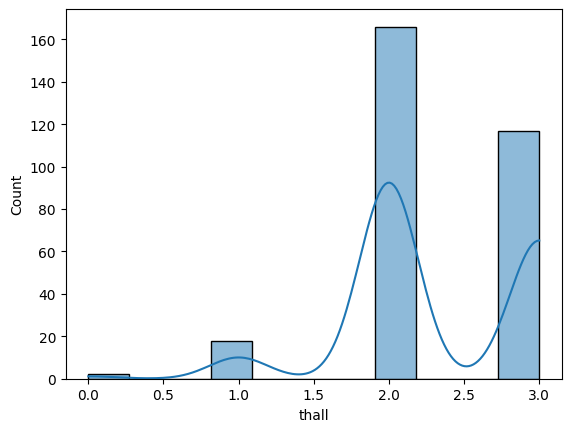

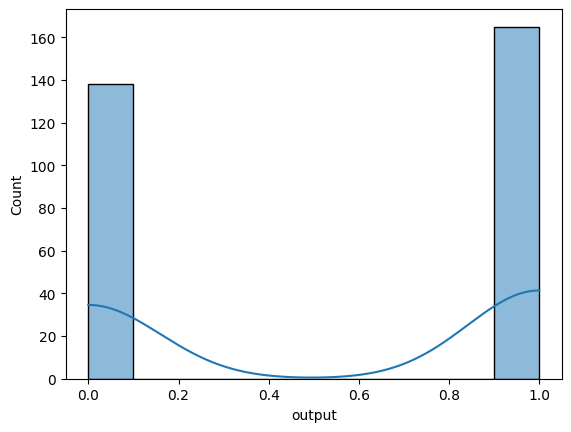

In [ ]:
import seaborn as sns
for i in col:
  plt.figure()
  sns.histplot(data = df, x = i, kde = True)


<Axes: xlabel='age', ylabel='Count'>

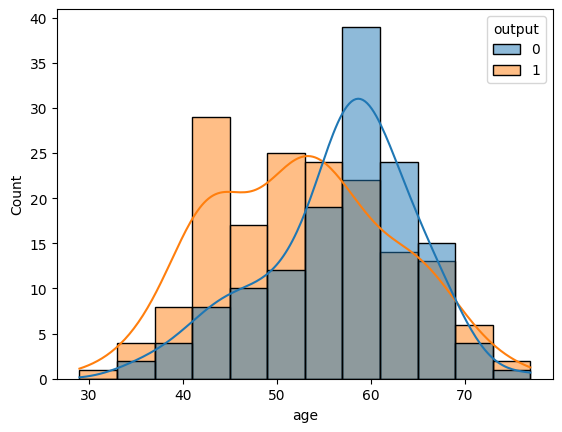

In [ ]:
sns.histplot(data = df, x = "age", kde = True, hue = "output")


Từ đồ thị có thể nhận định được ngườn có độ tười từ 40 đến 70 có nguy cơ bị bệnh cao nhất

<Axes: xlabel='age', ylabel='Count'>

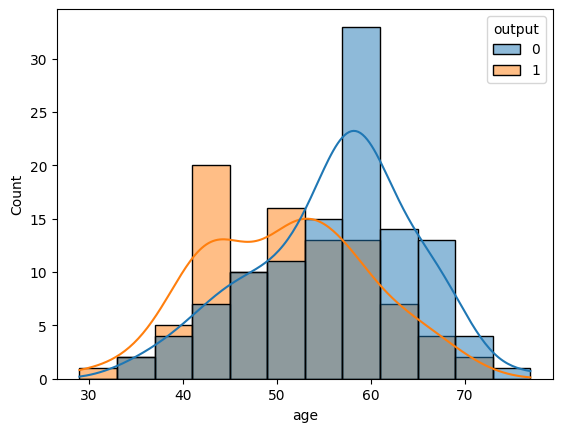

In [ ]:
sns.histplot(data = df[df['sex'] == 1], x = "age", kde = True, hue = 'output')


<Axes: xlabel='age', ylabel='Count'>

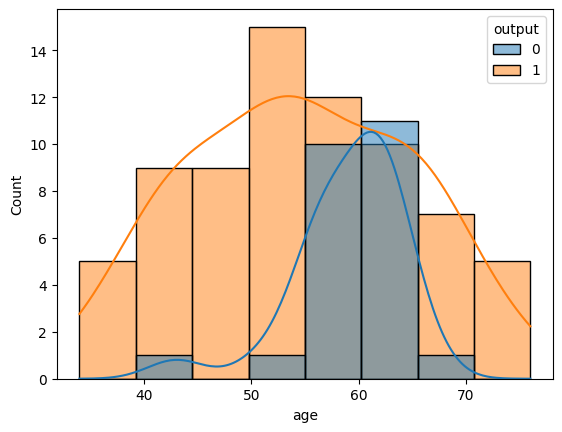

In [ ]:
sns.histplot(data = df[df['sex'] == 0], x = "age", kde = True, hue = 'output')


Từ đồ thì có thể thấy nam giới có tỷ lệ mắc bệnh cao hơn nữ giới ở tất cả các độ tuổi, Có thể do thói quen và lối sóng của nam giới có phần ảnh hưởng đến tỷ lệ này

In [ ]:
percentage = df[df['output'] == 1][df['sex'] == 1].count()/(df[df['output'] == 1].count())
percentage

<ipython-input-47-d7b9e6b3bfdc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percentage = df[df['output'] == 1][df['sex'] == 1].count()/(df[df['output'] == 1].count())


age         0.563636
sex         0.563636
cp          0.563636
trtbps      0.563636
chol        0.563636
fbs         0.563636
restecg     0.563636
thalachh    0.563636
exng        0.563636
oldpeak     0.563636
slp         0.563636
caa         0.563636
thall       0.563636
output      0.563636
dtype: float64

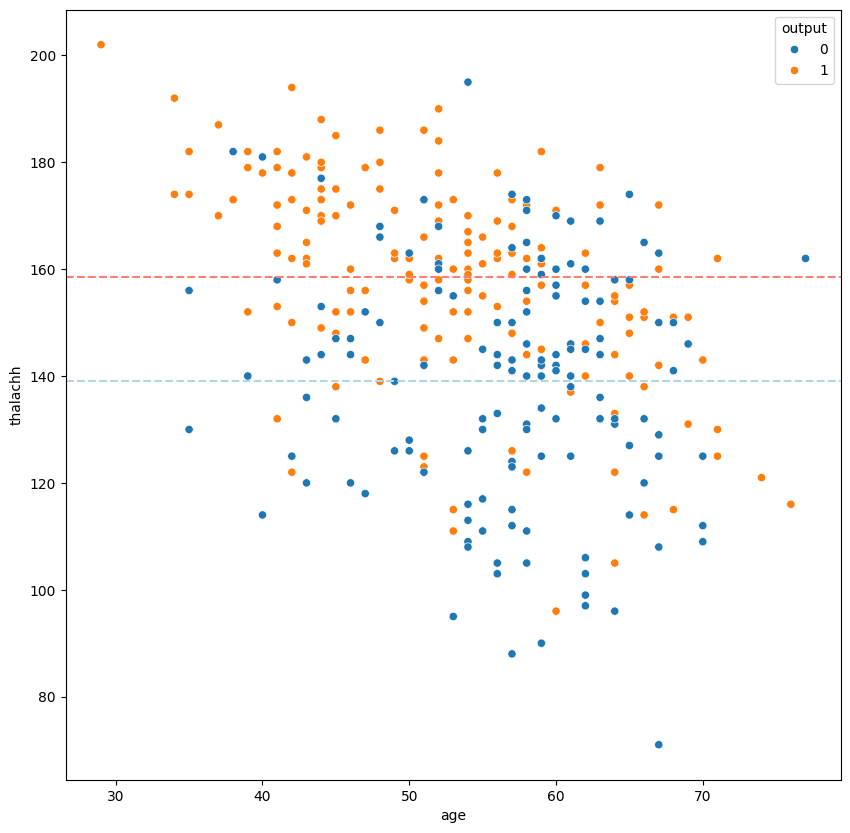

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data =df,x = 'age',y='thalachh',hue = 'output')
plt.axhline(y= df.thalachh[df.output == 0].mean() , color = "lightblue" , ls = "--");
plt.axhline(y= df.thalachh[df.output == 1].mean() , color = "salmon" , ls = "--");

Từ hình trên cho thấy các bệnh nhân mắc bệnh thường có số nhịp tim là lớn 150

<Axes: xlabel='cp', ylabel='Count'>

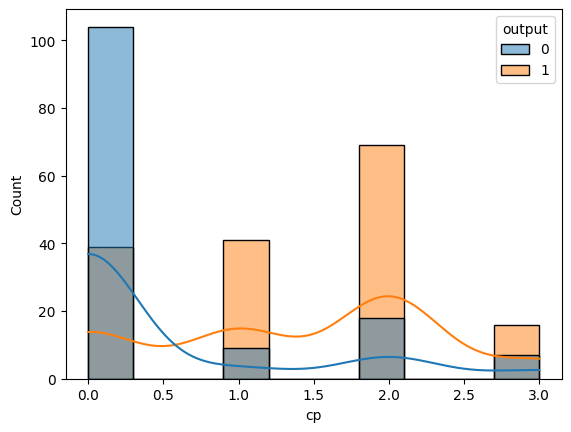

In [ ]:
sns.histplot(data = df, x = "cp", kde = True,hue = 'output')


Collect Feature for Train Model

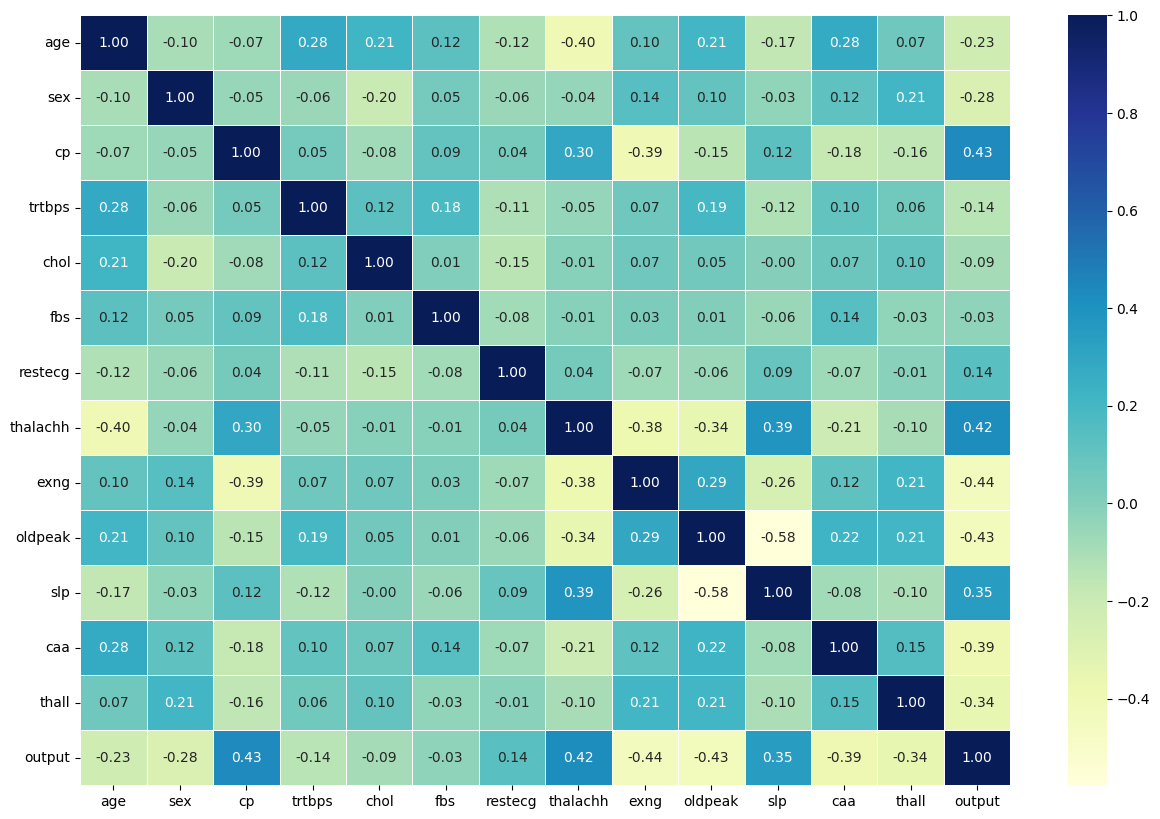

In [ ]:
# used corr Matrix

corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")

##### Building Model

Model Logistic Regression

In [ ]:
x = df.drop(['output','chol','fbs'] , axis = 1)
y = df["output"]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)
len(y_train), len(x_train) , len(y_test) , len(x_test)

(242, 242, 61, 61)

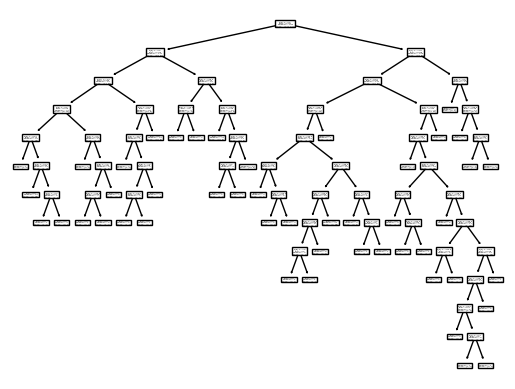

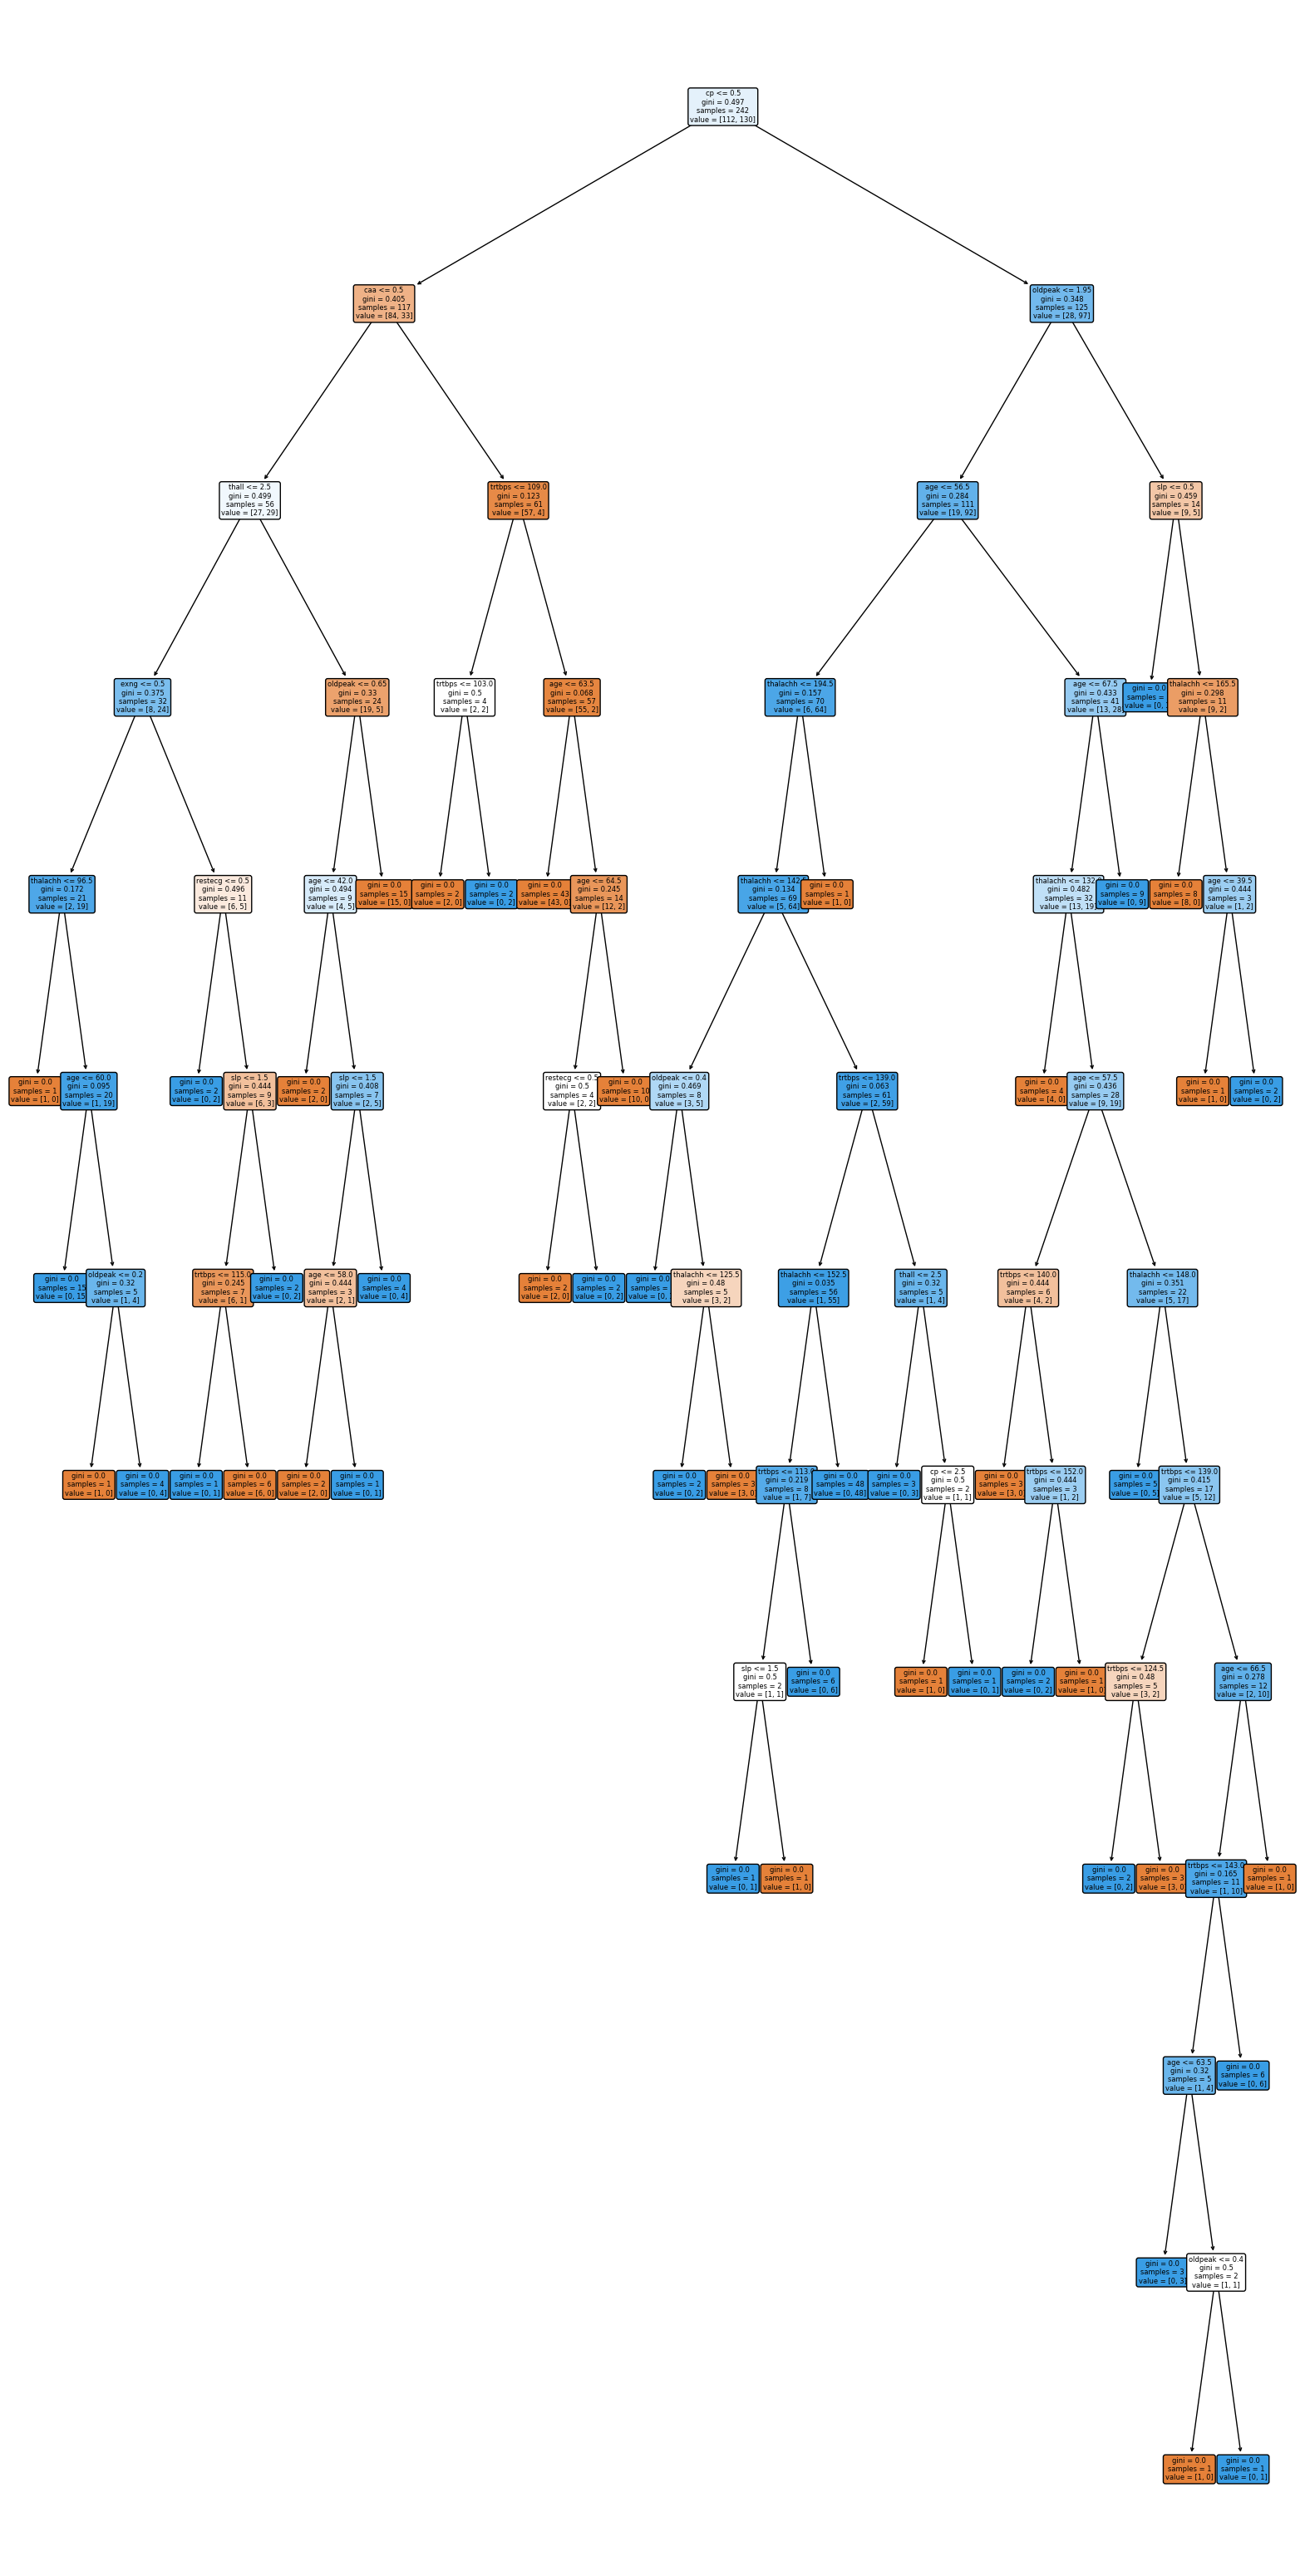

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)

clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

from sklearn import tree
plt.figure(figsize=(20,40))
_ = tree.plot_tree(clf, feature_names = x_train.columns,
             filled=True, fontsize=6, rounded = True)
plt.show()

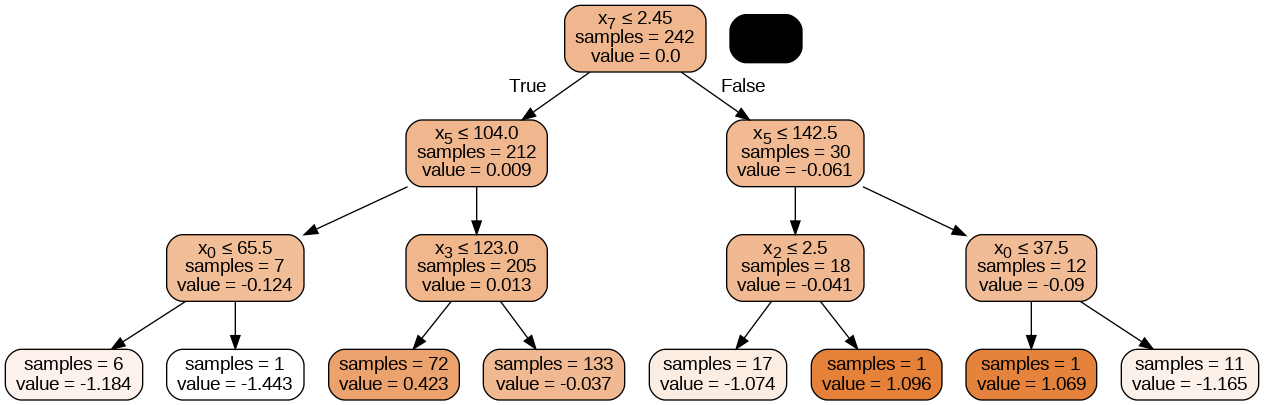

In [ ]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz



clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

sub_tree_42 = clf.estimators_[42, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('./out.png').write_bytes(png)
# Display
Image(png)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


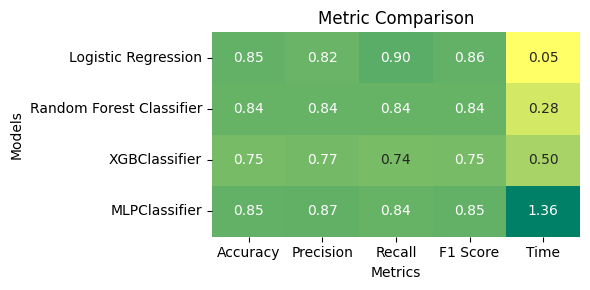

In [ ]:
import seaborn as sns
models = [("Logistic Regression", LogisticRegression()), ("Random Forest Classifier", RandomForestClassifier()),("XGBClassifier", XGBClassifier()),('MLPClassifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000))]

metric_data = []
for model_name, model in models:
    start_time = time.time()
    model =  model.fit(x_train , y_train)
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    end_time = time.time()
    t = end_time - start_time
    metric_data.append([accuracy, precision, recall, f1,t])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score",'Time']
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

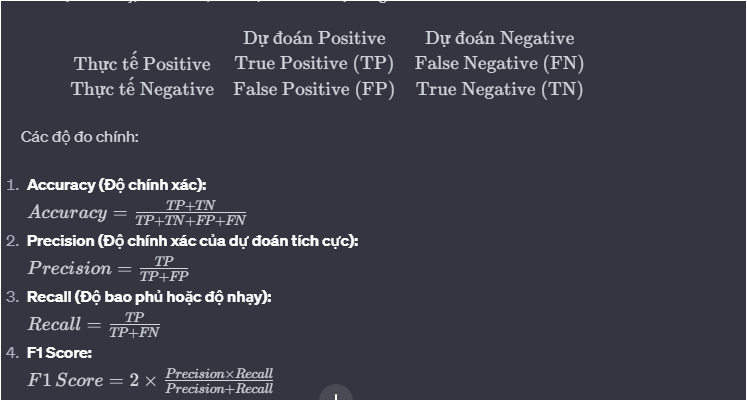

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
    "XGBClassifier" : XGBClassifier()

}

In [ ]:
  def fit_and_score(models , x_train , x_test , y_train , y_test):
    model_scores = {}
    #Looping through the models
    for name , model in models.items():
        model.fit(x_train , y_train) #--> Fitting each model
        #Evaluate
        model_scores[name] = model.score(x_test , y_test) #--> evaluate each model
        print(name)

    return model_scores #---> Returns object of models scores

#---> Trying our function
model_scores = fit_and_score(models , x_train , x_test , y_train , y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy score: 0.82
Precision score: 0.83
Recall score: 0.81
F1 score: 0.82
Random Forest
Accuracy score: 0.82
Precision score: 0.83
Recall score: 0.81
F1 score: 0.82
XGBClassifier
Accuracy score: 0.82
Precision score: 0.83
Recall score: 0.81
F1 score: 0.82


{'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.819672131147541,
 'XGBClassifier': 0.7540983606557377}

In [ ]:
all_the_scores = {
"RandForset": model_scores["Random Forest"] ,
"LogisticReg" :  model_scores["Logistic Regression"],
"XGB" : model_scores["XGBClassifier"]
}

In [ ]:
# from sklearn.metrics import confusion_matrix
# LogisticRegression = LogisticRegression()
# LogisticRegression = LogisticRegression.fit(x_train, y_train)
# RandomForestClassifier = RandomForestClassifier()
# RandomForestClassifier = RandomForestClassifier.fit(x_train, y_train)
# XGBClassifier = XGBClassifier()
# XGBClassifier = XGBClassifier.fit(x_train, y_train)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

randomizerSearch_RandomForest = RandomizedSearchCV(
    RandomForestClassifier() , #--> Our Model
    param_distributions= RandomForest_grid, #--> The grid defined upove
    cv = 10 ,
    n_iter= 10 ,
    verbose=True
                          )

models = [("Logistic Regression", LogisticRegression()), ("Random Forest Classifier", RandomForestClassifier()),("XGBClassifier", XGBClassifier()) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    model =  model.fit(x_train , y_train)
    prediction = model.predict(x_test)

    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

NameError: name 'RandomForest_grid' is not defined

In [ ]:
LogisticRegression_grid  = {"C" : np.logspace(-1 , 10 , 10) ,
                "solver" : ["liblinear", "lbfgs" , "newton-cg"  ]
                }

RandomForest_grid = {"n_estimators" : np.arange(10 , 1000 , 60) ,
           "max_depth" : [None , 3, 5 ,10],
           "min_samples_split" : np.arange(2, 20 , 2),
           "min_samples_leaf" :np.arange(1 , 20 , 2)
            }
#Tune Logistic Regression

RS_LogisticRegression = RandomizedSearchCV(
                                LogisticRegression() ,#--> Our Model
                                param_distributions= LogisticRegression_grid , #--> The grid defined upove
                                cv = 10 ,
                                n_iter= 30 ,
                                verbose=True,)

randomizerSearch_RandomForest = RandomizedSearchCV(
    RandomForestClassifier() , #--> Our Model
    param_distributions= RandomForest_grid, #--> The grid defined upove
    cv = 10 ,
    n_iter= 10 ,
    verbose=True
                          )

In [ ]:
models = [("Logistic Regression", LogisticRegression()), ("Random Forest Classifier", RandomForestClassifier()),("XGBClassifier", XGBClassifier()),('Logistic Regression_CV' ,RS_LogisticRegression), ('Random Forest Classifie_CV' ,randomizerSearch_RandomForest)]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fitting 10 folds for each of 10 candidates, totalling 100 fits


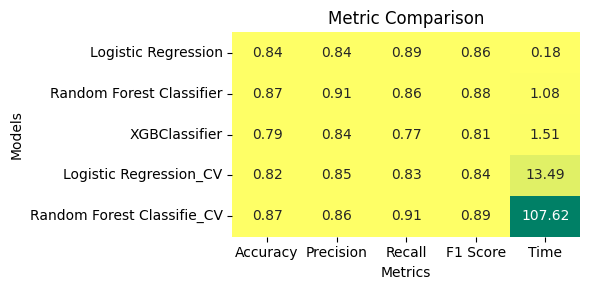

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metric_data = []
for model_name, model in models:
    start_time = time.time()
    model =  model.fit(x_train , y_train)
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    end_time = time.time()
    t = end_time - start_time
    metric_data.append([accuracy, precision, recall, f1,t])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score",'Time']
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

## Time series Analysis

https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide/notebook#3.-Feature-engineering-%F0%9F%94%A7

## Tensorflow with Keras

https://machinelearningcoban.com/2018/07/06/deeplearning/